In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ParameterGrid
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt 

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#yf.download('0P0001L8LN.F').Close.plot()

In [ ]:
import json

def count_lines_of_code(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)
    
    code_lines = 0
    
    for cell in notebook['cells']:
        if cell['cell_type'] == 'code':

            code_lines += len(cell['source'])
    
    return code_lines

# Example usage:
notebook_path = 'Pandas and regression.ipynb'  # Replace with your .ipynb file path
lines_of_code = count_lines_of_code(notebook_path)
print(f"The number of lines of code in the notebook is: {lines_of_code}")

In [ ]:
yf.download('GC=F', interval='1d').Close.pct_change().std()

In [ ]:
import quandl
quandl.ApiConfig.api_key='bjBvtGgs3NUrpn9Pa7y4'
qdl=quandl.get("WIKI/AAPL")
qdl

In [ ]:
os.getcwd()

# Pandas

In [ ]:
bins = np.array([0,.25,.5,.75,1])
bins[pd.cut(np.array([0.001, 0.4, .5, .7, .85]), bins, labels=False)]

In [ ]:
s = pd.Series(np.array([2, 6, 4, 8, 10]),
                  index=['a', 'b', 'c', 'd', 'e'])
pd.cut(s, 3, labels=['bad','medium','good'])

In [ ]:
import numpy as np

# Données
x = np.array([1, 2, 3, 4, 5])
y = np.array([8, 11, 19, 25, 26])

# Paramètres initiaux
theta0 = 0  # Intercept
theta1 = 0  # Coefficient de pente
alpha = 0.01  # Taux d'apprentissage
epochs = 100000  # Nombre d'itérations

# Descente de gradient
for epoch in range(epochs):
    # Calcul de la prédiction
    y_pred = theta0 + theta1 * x

    # Calcul des dérivées partielles (gradients)
    d_theta0 = (1/len(x)) * np.sum(y_pred - y)
    d_theta1 = (1/len(x)) * np.sum((y_pred - y) * x)

    # Mise à jour des paramètres
    theta0 = theta0 - alpha * d_theta0
    theta1 = theta1 - alpha * d_theta1

# Affichage des paramètres appris
print("Intercept (theta0):", theta0)
print("Coefficient de pente (theta1):", theta1)


In [ ]:
x=np.array([187,185,336,150,199,216])
y=np.array([200,200,170,180,180,170])
pdd=pd.DataFrame([x,y]).T
pdd['dif']=pdd[0]-pdd[1]
pd.cut(pdd['dif'],2)
pdd

In [ ]:
import sklearn.preprocessing
sklearn.preprocessing.normalize(np.array(pdd['dif']).reshape(-1,1), axis=0)

In [ ]:
intervalles = [-float('inf'), pdd['dif'].min(), 0, pdd['dif'].max(), float('inf')]
labels = [-1, -0.5, 0.5, 1]

pdd['dif_normalized_cut'] = pd.cut(pdd['dif'], bins=intervalles, labels=labels)

min_dif = pdd['dif'].min()
max_dif = pdd['dif'].max()
pdd['dif_normalized'] = 2 * (pdd['dif'] - min_dif) / (max_dif - min_dif) - 1
pdd

In [ ]:
pd.qcut(pdd['dif_normalized'], q=4)

In [ ]:
ak=[[2,3,2],[8,8,3]]
res=[]
for a in ak:
    res.extend(a)
pd.Series(list(set(res))).sort_values()

In [ ]:
# initializing bad_chars_list
bad_chars = [';', ':', '!', "*", " "]
 
# initializing test string
test_string = "Ge;ek * s:fo ! r;Ge * e*k:s !"
 
# printing original string
print("Original String : " + test_string)
 
# using join() + generator to
# remove bad_chars
test_string = ''.join(i for i in test_string if not i in bad_chars)
test_string

In [ ]:
[idx for idx in range(len(test_string)) if test_string[idx].isupper()]

In [ ]:
sns.color_palette('hls', n_colors = 30)

# asset cov corr etc

In [ ]:
a = yf.download(['AAPL','MSFT','NVDA','^SPX'], interval='1mo').Close.pct_change().dropna()
a

In [ ]:
s = a.std()
s

In [ ]:
a.cov()

In [ ]:
a.corr()

In [ ]:
# find cov
np.diag(s) @ a.corr() @ np.diag(s)

In [ ]:
# find corr
np.linalg.inv(np.diag(s)) @ a.cov() @ np.linalg.inv(np.diag(s))

In [ ]:
dt = yf.download(['BAC', 'GC=F']).Close.dropna().pct_change()
dt

In [ ]:
stds_ = dt.std()

In [ ]:
dt.corr()

In [ ]:
# if eqw:
w = np.array([.5,.5])
portfolio_var = w @ dt.cov() @ w
portfolio_var

In [ ]:
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

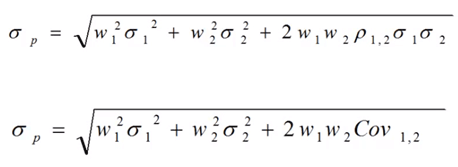

In [ ]:
# if we know that:
# we can retrieve corr:

( portfolio_std ** 2 - ( 0.5 ** 2 * stds_[0] ** 2  +  0.5 ** 2 * stds_[1] ** 2 ) ) / ( 2 * 0.5 * stds_[0] * 0.5 * stds_[1])

# Limit order book

In [ ]:
price_bid = ['$11.91', '$12.03', '$12.08', '$12.15']
price_ask = ['$12.18', '$12.19', '$12.22', '$12.30']
q_bid = [5655, 5013, 2224, 620]
q_ask = [1010, 1645, 3500, 6121]

plt.figure(figsize=(10, 6))  
bars1 = plt.bar(price_bid, q_bid, color='g', width=1, align ='center')
bars2 = plt.bar(price_ask, q_ask, color='r', width=1)
plt.axvline(plt.gca().get_xlim()[1] / 2.25, c='b', lw=2)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Prix')
plt.ylabel('Quantités')
plt.title('LOB')
plt.autoscale(axis='x',tight=1)
plt.show() 

In [ ]:
def execute_buy_order(quantity, order_book):
    """
    Exécute un ordre d'achat pour une quantité donnée en utilisant le carnet d'ordres fourni.

    :param quantity: Quantité à acheter.
    :param order_book: Carnet d'ordres avec les prix et les quantités disponibles.
    :return: Détails de l'exécution de l'ordre.
    """
    remaining_quantity = quantity
    execution_details = []

    for price, available_quantity in sorted(order_book.items()):
        if remaining_quantity <= 0:
            break  # La commande est entièrement remplie.

        if available_quantity >= remaining_quantity:
            # L'ordre peut être entièrement rempli à ce niveau de prix.
            execution_details.append((remaining_quantity, price))
            remaining_quantity = 0
        else:
            # Prendre tout ce qui est disponible à ce niveau de prix et continuer.
            execution_details.append((available_quantity, price))
            remaining_quantity -= available_quantity

    if remaining_quantity > 0:
        print(f"Il reste {remaining_quantity} non exécuté car il n'y a pas assez de liquidité.")

    return execution_details

# Exemple d'utilisation:
order_book_bid = {price: quantity for price, quantity in zip(price_bid, q_bid)}
order_book_ask = {price: quantity for price, quantity in zip(price_ask, q_ask)}

quantity_to_buy = 3412
purchase = execute_buy_order(quantity_to_buy, order_book_ask)
print(purchase)

In [ ]:
test = {
    12.18: 1010,
    12.19: 1645,
    12.22: 3500,
    12.30: 6121}

needed = 1500
execution = {}
for p, q in test.items():
    buyable = q - max((q - needed),0)
    execution[p] = buyable
    needed -= buyable
execution

# sum vs integral

In [ ]:
import numpy as np

prices = price_function(np.arange(1, 6))
plt.plot(np.arange(1, 6), prices)
average = sum(prices) / len(prices)

print("Moyenne des prix (méthode de la somme) :", average)

In [ ]:
from scipy.integrate import quad

# Définition de la fonction continue représentant les prix
def price_function(x):
    # Exemple d'une fonction linéaire simple
    return 2*x + 1

plt.plot(np.arange(1, 6), price_function(np.arange(1, 6)))
# Calcul de l'intégrale de la fonction sur l'intervalle de 0 à 5
integral, _ = quad(price_function, 1, 6)

# Calcul de la moyenne en utilisant l'intégrale
average_continuous = integral / 5  # Longueur de l'intervalle

print("Moyenne des prix (méthode de l'intégrale) :", average_continuous)

# Jaccard similarity similarité

In [ ]:
def jaccard_similarity(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union

# Exemple
A = {1, 2, 3, 4}
B = {3, 4, 5, 6}

similarity = jaccard_similarity(A, B)
print(f"La similarité de Jaccard entre A et B est: {similarity:.3f}")
print(f"La distance de Jaccard entre A et B est: {1-similarity:.3f}")

In [ ]:
import numpy as np

def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y) #union but exclude 0
    similarity = intersection.sum() / float(union.sum())
    return similarity

# Define some binary vectors
x = [0,1,0,0,0,1,0,0,1]
y = [0,0,1,0,0,0,0,0,1]
z = [1,1,0,0,0,1,0,0,0]

# Find similarity among the vectors
simxy = jaccard_binary(x,y)
simxz = jaccard_binary(x,z)
simyz = jaccard_binary(y,z)

print(' Similarity between x and y is', simxy, '\n Similarity between x and z is ', simxz, '\n Similarity between x and z is ', simyz)

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[0, 1, 1],
                   [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                   [1, 0, 0]])

print(jaccard_score(y_true[0], y_pred[0]))
jaccard_score(x,y)

In [ ]:
aapl = yf.download('AAPL').Close.pct_change()['2010':]
msft = yf.download('MSFT').Close.pct_change()['2010':]

In [ ]:
scores = np.zeros(300)
for n_bin in range(1,300):

    r1, bins = pd.cut(aapl, n_bin, retbins=True)
    lab = pd.Series(bins).rolling(2).mean().dropna().values

    returns_aapl = pd.cut(aapl, bins, labels=lab, retbins=False)
    returns_msft = pd.cut(msft, bins, labels=lab, retbins=False)

    returns = pd.concat((returns_aapl.rename('aapl'), returns_msft.rename('msft')), axis=1).dropna().astype('float16')

    scores[n_bin-1] = ((returns['aapl'] == returns['msft']).sum() / len(returns))

In [ ]:
plt.figure(figsize=(16,5.5))
plt.plot(range(1,len(scores)), scores[:-1])
plt.title('Jaccard score');

# Class

In [ ]:
class Person:
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

    def printname(self):
        print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:

x = Person("John", "Doe")
x.printname()

In [ ]:
class Student(Person):
    pass
Student('Jonny','Doe').printname()

In [ ]:
class Student(Person):
    def __init__(self, fname, lname, year):
        super().__init__(fname, lname)
        self.graduationyear = year
    def welcome(self):
        print(f'Welcome {self.firstname}, {self.graduationyear}')

x = Student("Mike", "Olsen", 2019)
x.welcome()

# multivariate multivariée

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les paramètres de la distribution normale multivariée
mean = [70, 170]  # moyenne de poids (en kg) et taille (en cm)
covariance = -0.07
covariance_matrix = [[.025, covariance], [covariance, .076]]  # matrice de covariance

# Générer un échantillon de données de poids et de taille
np.random.seed(0)  # pour la reproductibilité
sample_size = 500
samples = np.random.multivariate_normal(mean, covariance_matrix, size=sample_size, check_valid='ignore')

# Afficher les données générées
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Distribution des poids et des tailles')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.grid(True)
plt.show()

In [ ]:
minimize(lambda x: np.sin(x**2)+(1/np.log(x))+3, x0=3, options={'disp':True})

# wrds

In [ ]:
import wrds

In [ ]:
conn = wrds.Connection()

In [ ]:
conn.list_libraries()

In [ ]:
conn.list_tables(library='crsp')

In [ ]:
crsp = conn.raw_sql("""
                    select a.permno, a.cusip, a.date, a.cfacshr, abs(a.prc) as price, b.shrcd, b.exchcd, a.ret              
                    from crsp.msf as a
                    left join crsp.msenames as b
                    on a.permno=b.permno
                    and b.namedt<=a.date
                    and a.date<=b.nameendt
                    where  a.cusip != ''
                    and a.date>='1985-01-01'
                    and (b.exchcd = '1' or b.exchcd = '2'or b.exchcd ='3')
                    and (b.shrcd = '10' or b.shrcd =  '11')
                """)

crsp.to_csv('data/crsp.csv')

In [ ]:
conn.raw_sql("""select permno, date, prc, ret, shrout 
                        from crsp.msf 
                        where permno = 14593
                        and date>='01/01/2019'""", 
                     date_cols=['date'])

In [ ]:
apple_fund = conn.raw_sql("""select a.gvkey, a.iid, a.datadate, a.tic, a.conm,
                            a.at, b.prccm, b.cshoq 
                            
                            from comp.funda a 
                            inner join comp.secm b 
                            
                            on a.gvkey = b.gvkey
                            and a.iid = b.iid
                            and a.datadate = b.datadate
                        
                            where a.tic = 'AAPL' 
                            and a.datadate>='01/01/2010'
                            and a.datafmt = 'STD' 
                            and a.consol = 'C' 
                            and a.indfmt = 'INDL'
                            """, date_cols=['datadate'])

apple_fund.shape

# fred

In [ ]:
from fredapi import Fred
fred = Fred(api_key='047df97d97a455a7d1df974016865820')
fred.get_series('DJIA', frequency_short='m')

In [ ]:
from fredapi import Fred
fred = Fred(api_key='047df97d97a455a7d1df974016865820')
fred.get_series('SP500')
dttt=fred.get_series_latest_release('GDP')
fred.get_series_first_release('GDP')

In [ ]:
dta=yf.download('AAPL',interval='1mo')
conc=pd.concat([dta['Close'].pct_change().shift(-1).rename('AAPL_Close'),dttt.pct_change().rename('GDP')],axis=1).dropna()
display(conc.corr())
conc

# Tax salary

In [ ]:
salary = 71250
cut=50000
list1 = []

while salary >= 0:
    salary -= cut
    list1.append(max(salary,0))
    
print(list1)

list2=[]
for i, a in enumerate(list1):
    if a >0:
        list2.append(cut)
    else:
        list2.append(list1[i-1])
        
taxes=np.array([.02, .06, .01])

print(list2)

print(list2*taxes[:len(list2)])

In [ ]:
x=np.linspace(-2,5,100)

def func(x):
    return 2*x-5

plt.plot(x, func(x))
plt.axvline(x=x) for x in range(2,5)

In [ ]:
np.linalg.cholesky(np.array([[1,-1,2],[-1,5,-4],[2,-4,6]]))

# data analysis in finance

In [ ]:
df = yf.download(['^SPX','XLF'], start='2005-01-01', end='2007-12-31', interval='1mo')['Adj Close']
df.tail()

In [ ]:
joe_return = df['^SPX'].pct_change() - df['XLF'].pct_change()
(joe_return).cumsum().plot()
plt.title('joe return\'s volatility: {:.2%}'.format(joe_return.std()))

In [ ]:
df2 = yf.download(['C','XLF'], start='2005-01-01', end='2007-12-31', interval='1mo')['Adj Close']
df2.tail()

In [ ]:
np.polyfit(np.array(df2['XLF'].pct_change().dropna()), np.array(df2['C'].pct_change().dropna()), 1)

In [ ]:
jane_returns = (1.37 * df2['XLF'].pct_change() - df2['C'].pct_change()) / 1.37
(jane_returns).cumsum().plot()
plt.title('jane returns\'s volatility: {:.2%}'.format(jane_returns.std()))

In [ ]:
((joe_return + jane_returns)).cumsum().plot()
plt.title('both strats\' vol: {:.2%}'.format((joe_return + jane_returns).std()))

In [ ]:
df=pd.read_excel('/Users/grtk/Desktop/Data analysis in finance/EXERCISES_2024.xls', sheet_name='EX3 (AQR)', index_col=0).dropna()
df.head()

In [ ]:
for ret in ['emn','lse']:
    print(ret)
    display(sm.OLS(df[ret], sm.add_constant(df[['mktrf','smb','hml','rf','umd','rmw']])).fit().summary())

In [ ]:
mkt = yf.download('^SPX').pct_change().Close.reindex(df.index)
overall_corr = df['lse'].corr(mkt)
print('Overall correlation: {:.2%}'.format(overall_corr))
df['lse'].rolling(90).corr(mkt).plot()

## data 2

In [ ]:
pd.read_csv('/Users/grtk/Desktop/Data analysis in finance/data_in_sample.csv', index_col=0)

In [ ]:
dt = pd.read_csv('/Users/grtk/Desktop/Data analysis in finance/data_in_sample.csv', index_col=0, header = [0,1])
dt

# Loi binomiale

In [ ]:
from math import comb as c

In [ ]:
n = 50
k = 48

In [ ]:
def binomial(n,k,p):
    return c(n,k) * p**k * (1-p)**(n-k)

binomial(n,k,.95)

In [ ]:
0.99**100

In [ ]:
probs = np.zeros(51)
for num in range(0,51):
    probs[num] = binomial(n,num,.95)
plt.bar(range(0,51), probs)
plt.xlim(30,51)
plt.xticks(range(30,51,1))
plt.title('$\int^{8}_{3}$');

In [ ]:
plt.hist(np.random.binomial(48, 0.95, 20000), density=True);

# macroeconomics

In [ ]:
BRA = pd.read_excel('/Users/grtk/Desktop/Macroeconomics/BRA.xlsx', index_col=0).T
BRA.index = pd.to_datetime(BRA.index.str.replace('M','-'))
US = pd.read_excel('/Users/grtk/Desktop/Macroeconomics/US.xlsx', index_col=0).T
US.index = pd.to_datetime(US.index.str.replace('M','-'))

In [ ]:
exchange_rate = BRA.iloc[:,3:4]
cpi_BRA = BRA.iloc[:,5:6]
cpi_US = US.iloc[:,7:8]

s = (cpi_US / cpi_BRA)

reer = exchange_rate.mul(s['Real Effective Exchange Rate, based on Consumer Price Index'], axis=0).dropna()

In [ ]:
fig = plt.figure(figsize=(16,5))
plt.plot(reer, label='Real Exchange Rate', lw=2, c='blue')
#plt.plot(reer.rolling(24).mean(),ls='--', lw=.8, c='red')
plt.title('US - Brazil | Real Exchange Rate')
plt.autoscale(tight=True)
plt.legend()
plt.show()

# pytorch vs scipy

In [ ]:
from scipy.optimize import minimize

def objective(x):
    return x**2 + 2

# Contrainte : x > 3
constraint = {'type': 'ineq', 'fun': lambda x: x - 3}

# Valeur initiale
x0 = [3.1]

result = minimize(objective, x0, constraints=constraint)
print("Avec Scipy:")
print("Minimum trouvé:", result.fun)
print("Valeur de x:", result.x)


In [ ]:
import torch
from torch.autograd import Variable

def objective_torch(x):
    return x**2 + 2

# Contrainte : x > 3
constraint_torch = lambda x: x - 3

# Valeur initiale
x0_torch = Variable(torch.tensor([3.1]), requires_grad=True)

optimizer = torch.optim.SGD([x0_torch], lr=0.01)
loss = objective_torch(x0_torch) + 1 * (x0_torch - 3)


for i in range(1000):
    optimizer.zero_grad()
    loss = objective_torch(x0_torch)
    loss.backward()
    optimizer.step()

print("Avec PyTorch:")
print("Minimum trouvé:", objective_torch(x0_torch).item())
print("Valeur de x:", x0_torch.data.numpy()[0])

# Currency hedging

In [ ]:
def investment_cf(investment, return_rate, s1, s2):
    return investment*(1+return_rate)*s1/s2

def hedged_cf(investment, s1, s2, deposit_cf=0):
    return investment*(s1*deposit_cf)*s2/s1 if deposit_cf == 1 else investment*s2/s1

def final_ret(investment, cf, hedge_cf):
    return cf + hedge_cf - investment

In [ ]:
deposit_cf=0

return_rate=.07
s1=1.1
s2=1.3
qian=1000
cf = investment_cf(qian, return_rate, s1, s2)
hedge_cf = hedged_cf(qian, s1, s2, deposit_cf)
final_return=final_ret(qian, cf, hedge_cf)

print(cf)
print(hedge_cf)
print(final_return)

In [ ]:
returns_df=pd.DataFrame()
for rr in np.round(np.arange(return_rate-30*.01, return_rate+30*.01, 0.01),2):
    for s_deux in np.round(np.arange(s2*0.5, s2*1.5, s2*0.01),3):
        cf = investment_cf(qian, rr, s1, s_deux)
        hedge_cf = hedged_cf(qian, s1, s_deux, deposit_cf)
        returns_df.at[s_deux, rr] = final_ret(qian, cf, hedge_cf) / qian - 1
sns.heatmap(returns_df, cbar=1, cmap='coolwarm')
plt.axvline(x=plt.gca().get_xlim()[1]/2, ymin=0, ymax=.5, ls='--', lw=2.5, c='black')
plt.axhline(y=plt.gca().get_ylim()[0]/2, xmax=.5, c='red', ls='-.')
#print(plt.gcf().get_size_inches())
#print(plt.gca().get_xlim())
plt.xlabel('Return on investment %')
plt.ylabel('Spot rate at expiration', rotation=90)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rets=np.random.normal(0,0.05, size=(1,25)).reshape(-1,)
s2_move=s1*np.random.normal(1,0.05, size=(1,25)).reshape(-1,)
rets_df=pd.DataFrame()
qian, no_hedge, hedge, final = 1000, 1000, 1000, 1000
for i, ret in enumerate(rets):
    no_hedge = investment_cf(no_hedge, ret, s1, s2_move[i])
    hedge = hedged_cf(hedge, s1, s2_move[i])
    final = final_ret(final, no_hedge, hedge)
    rets_df.at['no_hedge',i]=no_hedge
    rets_df.at['hedge', i]=hedge
    #rets_df.at['final', i]=final

fig, ax = plt.subplots(figsize=(16,8))
rets_df.T.plot(ax=ax)
for x in rets_df.columns:
    ax.axvline(x=x, ls='--', lw=0.15)
inset_ax = inset_axes(ax, width="75%", height="20%")
inset_ax.plot(rets+1, color='red', label='Rets')
inset_ax.plot(s2_move/s1, label='FX')
inset_ax.axhline(y=1, color='green', ls='--', lw=0.5)
inset_ax.set_xticklabels('')
inset_ax.set_yticklabels('')
ax.set_ylim(ax.get_ylim()[0],1.1*ax.get_ylim()[1])
ax.legend(loc=2)
plt.legend(loc=3)
plt.show()

In [ ]:
fig, ax = plt.subplots()
xx = np.arange(-2,2,0.01)
ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.6, 0.15, 0.25, 0.25]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

# cryptos

In [ ]:
yf.download(['ETH-USD','BTC-USD'])['Close'].pct_change().corr()

In [ ]:
yf.download('EURUSD=X', interval='1d').Close.pct_change().std() * np.sqrt(252)

# système équation

In [ ]:
A=np.array([[4,1],[1,2]])
np.linalg.solve(A, np.array([0.24,4*0.24]))

In [ ]:
A=np.array([[4,1,-1],[1,2,-4],[1,4,0]])
np.linalg.solve(A, np.array([0,0,-2]))

In [ ]:
from scipy.optimize import brentq

# Définition de la fonction
def f(x):
    return x**2 - 4

# Utilisation de brentq pour trouver le zéro de f dans l'intervalle [0, 4]
zero = brentq(f, 0, 8)

print("Zéro de la fonction f(x) =", zero)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
x = np.linspace(0, 20, 10)
y = np.sin(x)
spl = splrep(x, y)
x2 = np.linspace(0, 20, 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o', x2, y2)
plt.show()

# yield to maturity ytm

In [ ]:
years=5
c=.05
n=100
dc=.03

cf=np.zeros(years)
for y in range(years):
    cf[y]=c*n if y!=years-1 else n*(c+1)
print(cf)

dcf=cf.copy()
for c_f in range(years):
   dcf[c_f]=cf[c_f]/(1+dc)**(c_f+1)
print(dcf, sum(dcf))

duration=sum((dcf*np.arange(1,years+1))/sum(dcf))

In [ ]:
plt.plot(np.arange(1,years+1), cf)
plt.plot(np.arange(1,years+1), dcf)
plt.axvline(x=duration)
plt.fill_between(np.arange(1,duration,.001),max(cf),interpolate=False, color='r',alpha=.2)
plt.fill_between(np.arange(duration,years+1),max(cf),interpolate=False, color='g',alpha=.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate DCF, duration, and convexity
def bond_analysis(face_value, coupon_rate, years_to_maturity, discount_rate, frequency=1):
    # Calculate cash flows
    periods = years_to_maturity * frequency
    coupon_payment = face_value * coupon_rate / frequency
    cash_flows = [coupon_payment] * periods
    cash_flows[-1] += face_value  # Add face value at maturity
    # Calculate present values of cash flows
    discount_factors = [1 / (1 + discount_rate / frequency) ** t for t in range(1, periods + 1)]
    present_values = np.multiply(cash_flows, discount_factors)

    # Calculate DCF
    dcf = np.sum(present_values)

    # Calculate Macaulay Duration
    macaulay_duration = np.sum([t * present_value for t, present_value in enumerate(present_values, start=1)]) / dcf

    # Calculate Modified Duration
    modified_duration = macaulay_duration / (1 + discount_rate / frequency)

    # Calculate Convexity
    convexity = np.sum([((t * (t + 1)) / (frequency ** 2)) * present_value for t, present_value in enumerate(present_values, start=1)]) / (dcf * (1 + discount_rate / frequency) ** 2)

    return dcf, modified_duration, convexity

# Example parameters
face_value = 1000
coupon_rate = 0.05
years_to_maturity = 5
discount_rate = 0.03
frequency = 1  # Annual payments

# Calculate DCF, duration, and convexity
dcf, duration, convexity = bond_analysis(face_value, coupon_rate, years_to_maturity, discount_rate, frequency)

# Display results
print(f"DCF: {dcf:.2f}")
print(f"Modified Duration: {duration:.2f}")
print(f"Convexity: {convexity:.2f}")

# Plot the bond's price sensitivity to interest rate changes
interest_rate_range = np.linspace(0.01, 0.10, 100)
bond_prices = [bond_analysis(face_value, coupon_rate, years_to_maturity, rate, frequency)[0] for rate in interest_rate_range]

plt.plot(interest_rate_range, bond_prices)
plt.axhline(y=dcf)
plt.title('Bond Price Sensitivity to Interest Rate Changes')
plt.xlabel('Discount Rate')
plt.ylabel('Bond Price')
plt.show()


In [ ]:
def ytm(y, *args):
    coupon, years, price = args
    cfs=[coupon]*years
    cfs[-1]=coupon+1
    
    dcf=cfs.copy()
    for t in range(years):
        dcf[t]=cfs[t]/(1+y)**(t+1)
    return abs(sum(dcf)-price)

In [ ]:
print('YTM: {:.3%}'.format(minimize(ytm, 0.01, args=(0.05, 5, 0.93725), bounds=[(0,1)]).x[0]))

In [ ]:
def funca(x, *args):
    a,=args
    return 3*x + a
funca(3,2)

# logistic regression

In [ ]:
feature=np.array([10,20,30,40,45,90,95,100,110]).reshape(-1,1)
result=np.array([0,0,0,0,0,1,1,1,1])

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression().fit(feature,np.ravel(result))
print(modelLR.coef_)

from sklearn.linear_model import LogisticRegression
modelLg=LogisticRegression().fit(feature,np.ravel(result))
print(modelLg.coef_)

In [ ]:
ordonne=np.linspace(0,150,150)
plt.scatter(feature, result)
plt.plot(ordonne, 1/(1+np.exp(-(modelLg.coef_[0][0]*ordonne+modelLg.intercept_[0]))), c='r', ls='--')

In [ ]:
modelLR.predict(np.array([90]).reshape(-1,1))

In [ ]:
modelLg.predict(np.array([68]).reshape(-1,1))

In [ ]:
https://heena-sharma.medium.com/logistic-regression-python-implementation-from-scratch-without-using-sklearn-d3fca7d3dae7

# CVXPY

In [ ]:
import cvxpy as cp

# Définir la variable de décision
x = cp.Variable(1)

# Définir l'objectif (minimiser x^2)
objective = cp.Minimize(x**2)

# Définir les contraintes (x >= 1)
constraints = [x >= 1]

# Créer et résoudre le problème d'optimisation
problem = cp.Problem(objective, constraints)
problem.solve()

# Imprimer la solution
print("Valeur optimale de x :", x.value)
print("Valeur optimale de l'objectif :", problem.value)


# Taylor series

In [ ]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(len(labels)), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

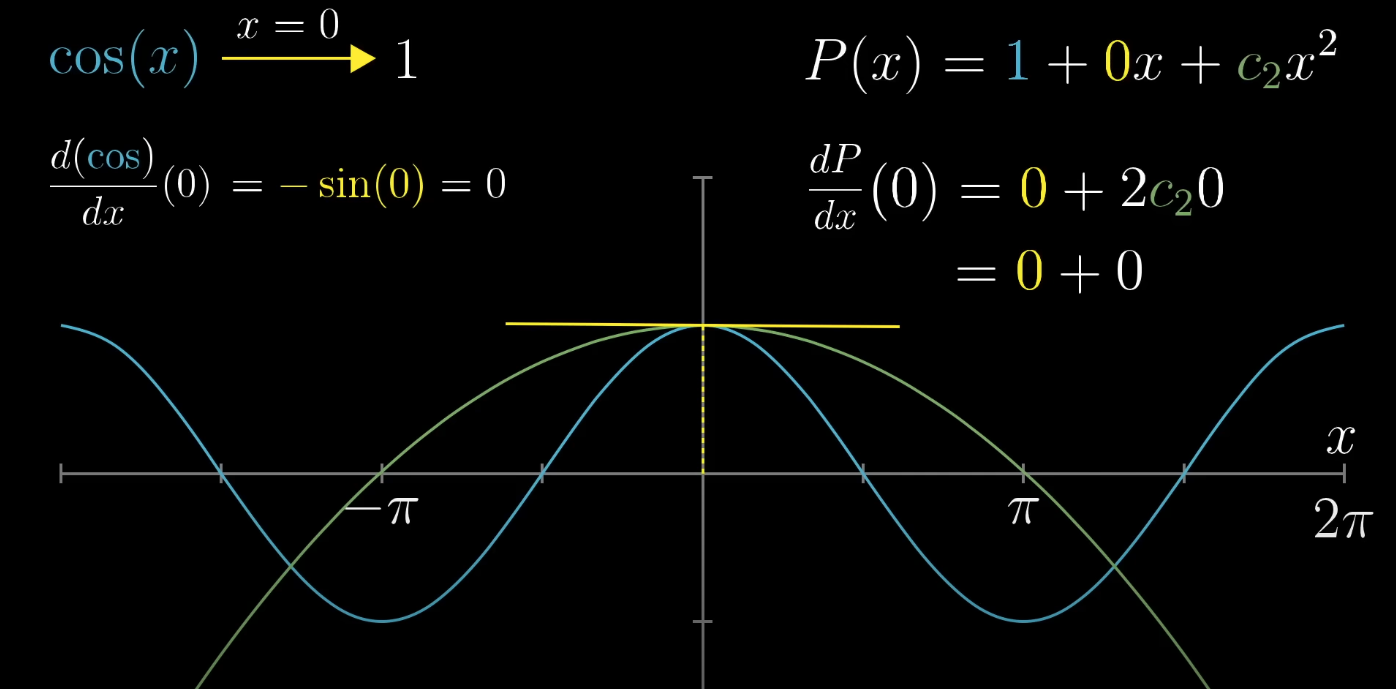

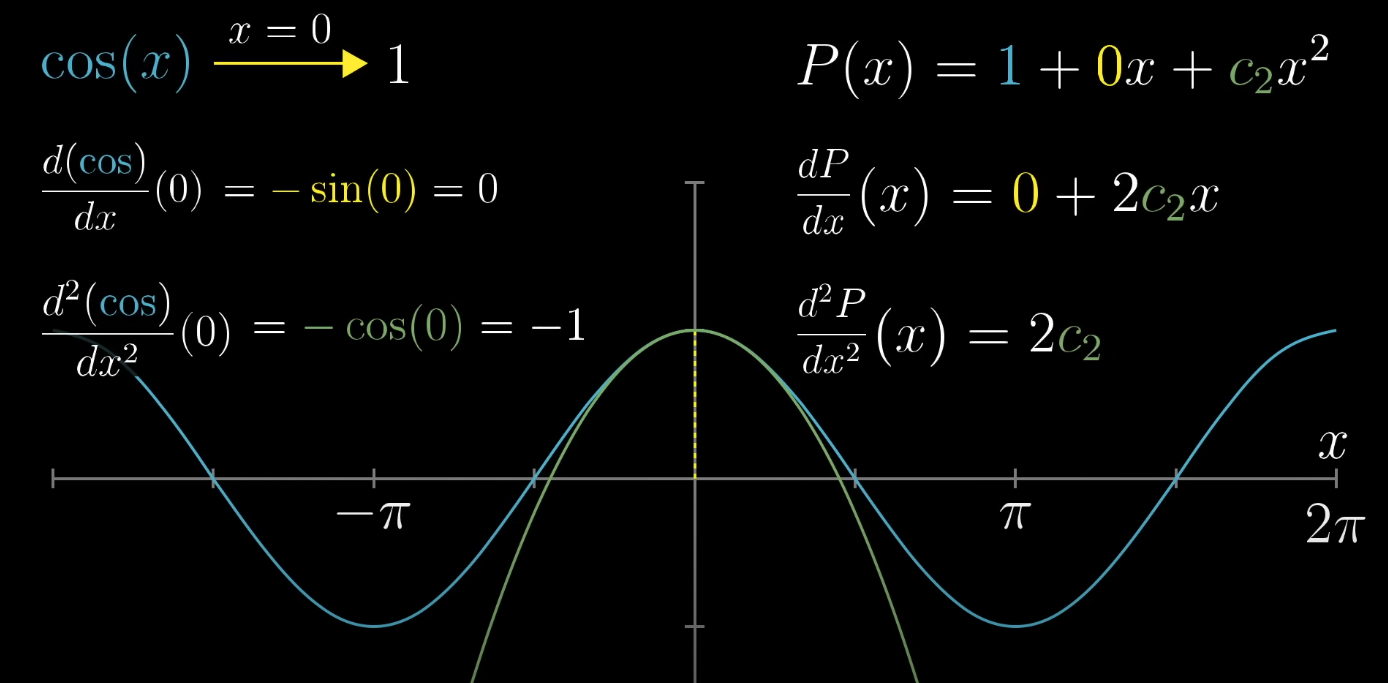

In [ ]:
def f(x):
    return x**3 + 2*x**2 - 3*x 

def T1(x):
    return -3*x

def T2(x):
    return -3*x + 2*x**2

def T3(x):
    return x**3 + 2*x**2 - 3*x 

x = np.linspace(-4, 3, 400)
y = f(x)
y1 = T1(x)
y2 = T2(x)
y3 = T3(x)
y4 = T3(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = $x^3  + 2x^2 - 3x$', color='blue')
plt.plot(x, y1, label="Série de Taylor d'ordre 1: $-3x$", color='red', linestyle='--')
plt.plot(x, y2, label="Série de Taylor d'ordre 2: $2x^2 - 3x$", color='green', linestyle='--')
plt.plot(x, y3, label="Série de Taylor d'ordre 3: $x^3  + 2x^2 - 3x$", color='pink', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Série de Taylor de $f(x) = x^3  + 2x^2 - 3x$', color='red')
plt.legend(ncols=2, fontsize='small', labelcolor='darkred', markerfirst=True)
plt.grid(True)
plt.show()

# SPLINE

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
#ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Données d'entrée
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 1, 1, 1, 0, 1])

# Création de l'objet spline cubique
cs = CubicSpline(x, y)

# Points pour l'évaluation de la spline
x_interp = np.linspace(0, 5, 100)
y_interp = cs(x_interp)

# Tracé des données et de la spline
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Données')
plt.plot(x_interp, y_interp, label='Spline Cubique')
plt.title('Interpolation par Spline Cubique')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# exponential

In [ ]:
np.exp(0)

In [ ]:
(2.718281828459045**dt-1)/dt

In [ ]:
constant = np.zeros(1000)
dt = 0.0000001
for c in range(1,1000):
    constant[c] = (c**dt-1)/dt
    
plt.plot(range(len(constant)), constant)

In [ ]:
plt.plot(range(1000), np.log(range(1000)))

In [ ]:
(2.71828**dt-1)/dt

# Eigenvalue eigenvector

In [ ]:
A = np.array([[3,1],[0,2]])

In [ ]:
np.linalg.det(A)

In [ ]:
v = np.array((-1,1))

In [ ]:
A @ v #so eigenvalue = 2

In [ ]:
2 * np.eye(2) @ v

In [ ]:
np.linalg.eig(A)

In [ ]:
t = np.array(((2,7),(1,8)))
np.linalg.eig(t)

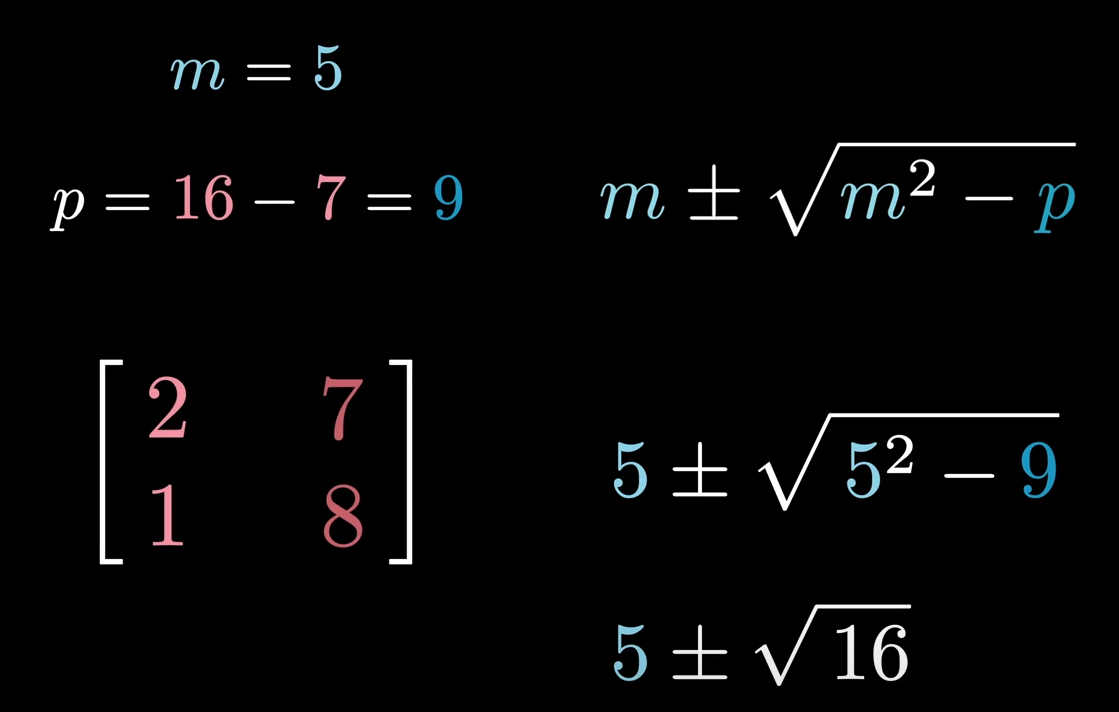

# Linear & KNN

In [ ]:
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

gold=yf.download('GC=F')

In [ ]:
gold['MA']=gold.Close.rolling(20).mean()
gold['Vol']=np.log(gold.Volume+1)
gold['diff_day'] = gold.Close - gold.Open
gold['y']=np.sign(gold.Close.shift(-1).pct_change())
gold['y2']=gold.Close.shift(-1).pct_change()
gold.dropna(inplace=True)
gold=gold[:-1]
features=gold[['MA','diff_day']]
features=scale(features)
features_train, features_test, y_train, y_test = train_test_split(features, gold.y, test_size=0.2)

In [ ]:
for n in range(2,6,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    
    knn.fit(features_train, y_train)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print(knn.score(features_train, y_train))
    print(knn.score(features_test, y_test), end='\n\n')

In [ ]:
features_train, features_test, y_train, y_test = train_test_split(features, gold.y2, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=n)
knn.fit(features_train, y_train)

In [ ]:
#plt.scatter(features_train[:,0], features_train[:,1])
plt.scatter(knn.predict(features_train), y_train)
plt.scatter(knn.predict(features_test), y_test)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

SPY_data = yf.download('SPY', start='2018-1-1', end='2023-1-1', auto_adjust=True)
df = SPY_data[['Open', 'High', 'Low', 'Close']]

df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df = df.dropna()
X = df[['Open-Close', 'High-Low']]

Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

knn = KNeighborsClassifier(n_neighbors=2)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

df['Predicted_Signal'] = knn.predict(X)

# AAPL Cumulative Returns
df['SPY_data_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_data_returns = df[split:]['SPY_data_returns'].cumsum()*100

# Cumulative Strategy Returns
df['Strategy_returns'] = df['SPY_data_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Strategy_returns'].cumsum()*100

# Plot the results to visualise the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_data_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

#with param grid
param_grid = {'n_neighbors': np.linspace(1, 50, 50, dtype=int)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, Y_train)

best_knn_model = knn_cv.best_estimator_
print(best_knn_model)

accuracy_train = accuracy_score(Y_train, best_knn_model.predict(X_train))
print('Train Data Accuracy: {:.2%}'.format(accuracy_train))

accuracy_test = accuracy_score(Y_test, best_knn_model.predict(X_test))
print('Test Data Accuracy: {:.2%}'.format(accuracy_test))

df['Predicted_Signal'] = best_knn_model.predict(X)

df['SPY_data_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_SPY_data_returns = df[split:]['SPY_data_returns'].cumsum() * 100

df['Strategy_returns'] = df['SPY_data_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Strategy_returns'].cumsum() * 100

plt.figure(figsize=(10, 5))
plt.plot(Cumulative_SPY_data_returns, color='r', label='SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([[1], [3], [4]])
y = np.array([5, 6, 7])

lin=LinearRegression().fit(X,y)

alpha = 0

XTX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
I = np.identity(X.shape[1])
theta = np.dot(np.linalg.inv(XTX + alpha * I), Xty)

print("Coefficients (theta) de la régression ridge :", theta)

plt.plot(X, lin.predict(X), label='Linear regression')
plt.scatter(X, y, label='Données')
plt.plot(X, np.dot(X, theta), color='red', label='Régression Ridge')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration purposes
np.random.seed(42)
X = np.array([0,1,4,6,9,15,30,50,55])
y = 4 + 3 * X + np.random.randn(9)

# Add a bias term to the input features
X_b = np.c_[np.ones((9, 1)), X]

# Set hyperparameters
learning_rate = 1
n_iterations = 100

# Initialize random weights
theta = np.random.randn(2, 1)

# Function to compute the mean squared error
def compute_mse(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    mse = np.sum((predictions - y)**2) / m
    return mse

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/len(y) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    mse = compute_mse(X_b, y, theta)
    print(f"Iteration {iteration + 1}/{n_iterations}, MSE: {mse}")

# Print the final coefficients
print("Final Coefficients:", theta)

# Plot the original data and the regression line
plt.scatter(X, y, label='Original data')
plt.plot(X, X_b.dot(theta), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# decision tree random forest

In [ ]:
x=np.array([60,70,90,29]).reshape(-1,1)
y=np.array([150,180,220,70])

In [ ]:
x=np.array([0,1,2,3,4,15        ,23,24,25,26,27   ,30,31,32,34,41       ,50,51,53]).reshape(-1,1)
y=np.array([0,0,0,0,.05,.1      ,1,1,1,1,1       ,.75,.73,.7,.65,.65    ,0,0,0])

In [ ]:
gbc = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=2, random_state=0, init='zero').fit(x,y)
np.round(gbc.predict(np.array([0,2,3,15,25,32,34,40,50]).reshape(-1,1)),2)

In [ ]:
x=np.array([0,1,2,10,15,17,20,50,60,70]).reshape(-1,1)
y=np.array([0,0,0,100,100,100,100,0,0,0])

In [ ]:
clf = DecisionTreeRegressor(max_depth=50, min_samples_leaf=5)
clf.fit(x,y)

print('predict:', clf.predict(np.array([0,2,3,15,25,32,34,40,50]).reshape(-1,1)))
print('score:', clf.score(x,y))

plt.scatter(x,y)

for thresold in np.sort(clf.tree_.threshold):
    plt.axvline(x=thresold, alpha=.2)
    
#for thresold, mean_value in zip(threshold[~is_leaves], values[is_leaves]):
 #   plt.text(thresold, .2, np.round(mean_value[0][0], decimals=2))

In [ ]:
clf.cost_complexity_pruning_path(x,y)

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

In [ ]:
# Loop through a few different max depths and check the performance
test_score=[]
for d in [1,2,3,4,5,6,7,8,9]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(x, y)

    # Print out the scores on train and test
    #print('max_depth=', str(d))
    test_score.append(decision_tree.score(x,y))
    np.argmax(test_score)

In [ ]:
#with param grid
param_grid = {'max_depth': np.linspace(2, 50, 50, dtype=int)}

decision_tree = DecisionTreeRegressor()

dt_cv = GridSearchCV(decision_tree, param_grid, cv=5)

dt_cv.fit(x,y)

best_dtt_model = dt_cv.best_estimator_
print(best_dtt_model)
print(dt_cv.best_score_)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [ ]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)


In [ ]:
import pandas as pd
import yfinance as yf

# Téléchargement des données
df = yf.download('BNP.PA', interval='1m').drop('Adj Close', axis=1)

# Calcul du RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# Calcul des moyennes mobiles
#df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA15'] = df['Close'].rolling(window=15).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# Calcul des bandes de Bollinger
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

df['Bollinger_Upper'], df['Bollinger_Lower'] = calculate_bollinger_bands(df['Close'])

# Calcul du MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()

    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()

    return macd, signal

df['MACD'], df['Signal'] = calculate_macd(df['Close'])

df['Vol'] = df['Close'].rolling(15).std()
df['Rolling_Volume'] = np.log(df['Volume'].rolling(5).mean())
df['Close'] = df['Close'].shift(-1)

# Affichage des premières lignes de la DataFrame avec les nouveaux indicateurs
df.tail()

In [ ]:
Y = df.dropna().iloc[:-50,3:4]
X = df.dropna().iloc[:-50,5:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
model = xgb.XGBRegressor(max_depth=4).fit(X_train, np.ravel(y_train))
model = RandomForestRegressor(n_estimators=1, max_depth=1).fit(X_train, np.ravel(y_train))

# Predict with a model
model_pred = model.predict(X_train)
pred_y2 = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
#%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' 

In [ ]:
plt.figure(figsize=(16,3))

order=np.argsort(model.feature_importances_)[::-1]

labels=np.array(X.columns)[order]

plt.bar(range(len(order)), np.sort(model.feature_importances_)[::-1], tick_label=labels)
plt.xticks(rotation=10)
plt.show()

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,5.5))
regr = DecisionTreeRegressor(max_depth=3, random_state=124)
model = regr.fit(X_train, y_train)

_ = tree.plot_tree(regr, filled=True, proportion=True, impurity=True, feature_names=list(X.columns))

In [ ]:
#conda install python-graphviz

import dtreeviz # remember to load the package

viz = dtreeviz.model(regr, np.array(X_train), np.ravel(y_train),
                feature_names=list(X.columns), target_name='Close prediction')
viz.view(scale=.9)

In [ ]:
predictions = pd.Series(model.predict(X_test), index=y_test.index, name='Preds')

preds_df = pd.concat([predictions, y_test], axis=1).sort_index()
preds_df

In [ ]:
fig, ax = plt.subplots(1,1)
pd.Series(model.predict(X_test), index=y_test.index).plot(ax=ax, label='Prediction')
y_test.plot(ax=ax, label='True')
plt.legend()

In [ ]:
earn = pd.concat([np.sign(preds_df.Preds.diff()), preds_df['Close'].pct_change()], axis=1)
earn['Strat'] = earn.Preds * earn.Close
(1+earn.Strat).cumprod().plot()
plt.axhline(y=1, ls='--', lw=.5, c='black')

In [ ]:
comparaison=np.sign(preds_df.sort_index().diff())
np.unique((np.array(comparaison.iloc[:,0:1]) == np.array(comparaison.iloc[:,1:2])), return_counts=True)

In [ ]:
data=yf.download('GC=F').drop(['Open','Close','High','Low'], axis=1) #MC.PA FCHI

data['y_Price_Chg']=data['Adj Close'].shift(-1).pct_change()
q1=np.quantile(data['Adj Close'].shift(-1).pct_change().dropna(), q=.35)
q2=np.quantile(data['Adj Close'].shift(-1).pct_change().dropna(), q=.65)

data['y_Price_Chg_sign']=np.where(data['y_Price_Chg']>q2,1,0)
data['y_Price_Chg_sign']=np.where(data['y_Price_Chg']<q1,-1,data['y_Price_Chg_sign'])

data['Adj Close'].shift(-1).pct_change().plot(kind='hist', bins=500)
plt.axvline(np.quantile(data['Adj Close'].shift(-1).pct_change().dropna(), q=.35), ls='--', c='r')
plt.axvline(np.quantile(data['Adj Close'].shift(-1).pct_change().dropna(), q=.65), ls='--', c='r')
plt.show()

data['Price_Chg']=data['Adj Close'].pct_change()
data['Price_rolling_50']=(data['Adj Close'].rolling(50).mean()).diff()
data['Price_rolling_20_std']=data['Adj Close'].ewm(20).std()
data['Price_Chg_10d']=data['Adj Close'].pct_change(10)
data['Price_10d']=data['Adj Close'].shift(10)
data['Volume_1d_change_sma']=data['Volume'].pct_change().rolling(20).mean()
data['Volume_1d_change_sma'].plot.hist(bins=500)
f2=yf.download('SI=F').Close
f2=np.sign(f2.rename('f2').pct_change())
data=pd.concat([data,f2], axis=1)
data.dropna(inplace=True)
plt.legend()
plt.show()s
data['f3']=data.index.dayofweek 
#data=pd.get_dummies(data, columns=['f3'], prefix='weekday', drop_first=True)
#data=pd.concat([data, pd.get_dummies(data.index.dayofweek,prefix='weekday',drop_first=True)], axis=1)
#data['f1f2f3']=(data.f2*data.f3)
#data.dropna(inplace=True)
sns.heatmap(data.corr(),annot=True,fmt='.2f', lw=1.5)

In [ ]:
y=np.sign(data['y_Price_Chg_sign'])[1:]
x=data[['Price_Chg','Price_Chg_10d','Price_10d','Volume_1d_change_sma','f2','Price_rolling_50', 'Price_rolling_20_std']][1:]

In [ ]:

##PARAMETER GRID + REGRESSOR
grid = {'n_estimators': [200], 'min_samples_split': np.arange(20,30,1), 'max_features': [None,2,3,4], 'random_state': [42]}

rfr=RandomForestRegressor()
score=[]    
for g in ParameterGrid(grid):
    rfr.set_params(**g)
    rfr.fit(x,y)
    score.append(rfr.score(x,y))
print(np.argmax(score))

In [ ]:
split=0.8
split=int(split*len(x))

train_x, train_y, test_x, test_y = x[:split], y[:split], x[split:], y[split:]
#OWN SPLIT + PARAMETER GRID + CLASSIFIER
grid = {'n_estimators': [200], 'min_samples_split': np.arange(8,11,1), 'max_features': [3, 4], 'random_state': [42]}

rfc = RandomForestClassifier()

score = []
score_test = []

#rfc = RandomForestClassifier(n_estimators=200, min_samples_split=10, max_features=2, max_depth=5)

for params in ParameterGrid(grid):
    rfc.set_params(**params)
    rfc.fit(train_x, train_y)
    score.append(rfc.score(train_x, train_y))
    score_test.append(rfc.score(test_x, test_y))

print(np.argmax(score))
print(ParameterGrid(grid)[np.argmax(score)])

In [ ]:
for minsplit in range(15,30,3):
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, min_samples_split=minsplit, random_state=0, init='zero').fit(train_x,train_y)
    print(gbc.score(train_x,train_y))
    print(gbc.score(test_x,test_y), end='\n')
    print()

In [ ]:
data.loc[1:,'pred_gbc']=gbc.predict(x)
data['buy']=data['Price_Chg']*data['pred_gbc']
(1+data['buy']).cumprod().plot()
plt.yscale('log')

In [ ]:
plt.figure(figsize=(16,3))

order=np.argsort(rfc.feature_importances_)[::-1]

labels=np.array(x.columns)[order]

plt.bar(range(len(order)), np.sort(rfc.feature_importances_)[::-1], tick_label=labels)
plt.xticks(rotation=10)

In [ ]:
print(y.iloc[10:15])
print(rfc.predict(x.iloc[10:15]))

# OVER MA SIGNAL

In [ ]:
yf.download('^FCHI')[-4000:].Close.pct_change().mean()*100

In [ ]:
cac=yf.download('^FCHI')[-4000:]
((cac['High']-cac['Low'])/cac['Open']).mean()

In [ ]:
cac['Ratio']=(cac['Close']/cac['Close'].rolling(21).mean())
pct=np.percentile(cac['Ratio'].dropna(),[3.5,7.5,50,92.5,96.5])
cac=cac.dropna()
cac['Ratio'].plot(figsize=(16,8))
for p in pct:
    plt.axhline(y=p, color='red',linestyle='--')
plt.show()
cac['pos']=np.where(cac['Ratio']<pct[0], 1,np.nan)
cac['pos']=np.where(cac['Ratio']>pct[4], -1,cac['pos'])
cac['pos'].ffill(inplace=True)
((cac['Close'].pct_change()*cac['pos'].shift())+1).cumprod().plot(label='Strategy', figsize=(16,8))
(cac['Close'].pct_change()+1).cumprod().plot(label='Buy/Hold')
ax2=plt.twinx()
cac['pos'].plot(ax=ax2, alpha=0.2, color='green')
plt.legend()
plt.show()

In [ ]:
gold=yf.download('GC=F')[-1000:]
gold['Chg']=gold['Close'].pct_change()
gold['Close'].pct_change().mean()*100

In [ ]:
bins = [-float('inf'), -0.05, -0.02, -0.01, 0, 0.01, 0.02, 0.05, float('inf')]
count_freq=pd.DataFrame(pd.cut(gold['Chg'], bins=bins)).reset_index()
count_freq['Freq']=count_freq['Chg'].value_counts()
count_freq['Frequency']=count_freq.groupby('Chg')['Chg'].transform('count')
count_freq.dropna()

In [ ]:
gold.pivot_table(values='Chg', index=gold.index)

In [ ]:
years=cac.index.year.unique()
fig, axes=plt.subplots(int(len(years)/4),4, figsize=(16,8), sharey=True)
for a, y in zip(axes.ravel(), years):
    cac.loc[str(y)]['Close'].plot(ax=a)

In [ ]:
euro_stoxx=yf.download('^STOXX50E')[-1000:]
print(euro_stoxx['Close'].pct_change().mean()*100)
euro_stoxx.loc[:,'Chg']=euro_stoxx['Adj Close'].pct_change()
euro_stoxx.describe().applymap(lambda x: '{:.2%}'.format(x))

# integrale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Définition de la fonction
def f(x):
    return .5*x**2

# Définir les limites d'intégration
a, b = 0, 3

# Calcul de l'intégrale définie
result, _ = quad(f, a, b)

# Création d'un ensemble de valeurs x pour la visualisation
x_values = np.linspace(-2, 11, 100)
y_values = f(x_values)

# Tracé de la fonction
plt.plot(x_values, y_values, label=r'$3x^2$')

# Remplissage de l'aire sous la courbe entre a et b
plt.fill_between(x_values, y_values, where=[(x >= a) and (x <= b) for x in x_values], alpha=0.3, label='Aire sous la courbe')

# Configuration du graphique
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Aire sous la courbe de $.5*x^2$ entre a et b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Affichage du résultat
plt.show()

# Affichage de l'aire sous la courbe
print(f"L'aire sous la courbe entre {a} et {b} est : {result}")

# PD replicate

In [ ]:
data = {
    'InnerCode': [2532, 2511, 2532],
    'ReportDate': ['2004-06-30', '2004-06-30', '2004-06-30'],
    'BondCode': [1122, 1358, 1210],
}

df = pd.DataFrame(data)
df['ReportDate']=pd.to_datetime(df['ReportDate'])
df.set_index('ReportDate',inplace=True)
df

In [ ]:
for a in df.index.unique():
    display(df.loc[a])

In [ ]:
#METHOD 1
new_rows=[]
for a in df.index:
    for i in range(1,10):
        nextdate = pd.to_datetime(pd.to_datetime(a) + pd.offsets.BDay(n=+i))
        new_row=df.loc[a].copy()
        new_row.index=[nextdate]*len(new_row)
        new_rows.append(new_row)
new_rows=pd.concat([df]+ new_rows)
new_rows.index=pd.to_datetime(new_rows.index)
new_rows

In [ ]:
#METHOD 2
df.reset_index(inplace=True)
df.set_index(['ReportDate','InnerCode'],inplace=True)
new_rows=[]
for a in df.index.levels[0]:
    for i in range(1,10):
        nextdate = pd.to_datetime(pd.to_datetime(a) + pd.offsets.BDay(n=+i))
        new_row=df.loc[a].copy()
        #new_row.index=[nextdate]*len(new_row)
        new_row.index=pd.MultiIndex.from_product([[nextdate], new_row.index.get_level_values(0)])
        new_rows.append(new_row)
new_rows=pd.concat([df]+ new_rows)
#new_rows.sort_index()
new_rows

In [ ]:
for i in tqdm(range(3)):
    print(i)
    time.sleep(1.5)

In [ ]:
np.where(stock_data['CMF']>-5, 1, 0)

In [ ]:
import pandas as pd

def calculate_cmf(dataframe, period=14):
#chakin money flow
    mf_multiplier = ((dataframe['Close'] - dataframe['Low']) - (dataframe['High'] - dataframe['Close'])) / (dataframe['High'] - dataframe['Low'])
    
    mf_volume = mf_multiplier * dataframe['Volume']
    
    adl = mf_volume.cumsum()
    
    cmf = adl.diff(period) / dataframe['Volume'].rolling(window=period).sum()

    return cmf

def profit(thresold):
    buy=np.where(stock_data['CMF']>x, 1, 0)
    profit_buy = buy*stock_data['Chg']
    return (profit_buy+1).prod()

stock_data=yf.download('AAPL', start='2018-01-01', interval='1wk') 

stock_data['CMF']=calculate_cmf(stock_data, period=14)
stock_data['Chg']=stock_data['Close'].pct_change().shift(-1)
stock_data.dropna(inplace=True)
thresold=0.07
result=minimize(profit, thresold, method='SLSQP')
stock_data['buy']=np.where(stock_data['CMF']>result.x[0], 1, 0)
stock_data['profit']=stock_data['buy']*stock_data['Close'].pct_change().shift(-1)
(stock_data['profit']+1).cumprod().plot()

# Russel analysis

In [ ]:
russel_data=pd.read_excel('/Users/grtk/Desktop/Python/csv/russell_2000_components.xls')
tickers=russel_data['Ticker'].tolist()
data=yf.download(tickers, interval='1mo', start='2010-01-01')
data_to_analyze=data['Close'].reset_index().melt(id_vars='Date', value_name='Price').merge(russel_data[['Ticker','Industry']], left_on='variable', right_on='Ticker')
display(data_to_analyze)
(data_to_analyze.groupby(['Industry','Date'])['Price'].mean().unstack(0).pct_change()+1).cumprod().iloc[-1].plot.pie(autopct='%1.2f%%', shadow=True, rotatelabels=True, figsize=(10,10))

industries=data_to_analyze.Industry.unique()

fig, axes=plt.subplots(int(len(industries)/4),4, figsize=(16,24), sharex=True)

for a, ind in zip(axes.ravel(), industries):
    data_to_analyze[data_to_analyze['Industry']==ind].groupby('Date')['Price'].mean().plot(ax=a)
    a.set_title(ind)

# Efficient frontier

In [ ]:
tks=yf.download(['AAPL','NVDA','MSFT','BABA'], start='2013-01-01')[['Adj Close','Volume']]
#tks=tks.iloc[:,2:4]
means=tks['Adj Close'].pct_change().mean()
stds=tks['Adj Close'].pct_change().std()
covma=tks['Adj Close'].pct_change().cov()

In [ ]:
simus=1000

plt.scatter(stds*np.sqrt(250), means*250,c='r',)
for i, t in enumerate(tks['Adj Close'].columns):
    plt.text(stds[i]*np.sqrt(250), means[i]*250, s=t)

list_returns=np.zeros(shape=(simus))
list_std=np.zeros(shape=(simus))

for x in range(simus):
    weights=np.random.random(tks['Adj Close'].shape[1])
    weights/=sum(weights)
    
    list_std[x]=np.sqrt((weights@covma@weights)) * np.sqrt(250)
    list_returns[x]=(means@weights) * (250)

plt.scatter(list_std, list_returns, alpha=.1, c=list_returns)

 
frontier_volatility = []
def min_vol(weights):
        vol = weights @ (1000*covma) @ weights
        return vol
    
frontier_return = np.linspace( (means*250).min() , (means*250).max() , simus )  

for exp_return in frontier_return:
    constraints = ({'type':'eq','fun':lambda weights: np.sum(weights) - 1},
                   {'type':'eq','fun':lambda weights: (250)*(means@weights)-exp_return})
    in_w = np.ones(len(weights))/len(weights)
    result = minimize(min_vol,in_w,method='SLSQP', bounds=[(0,1)]*len(weights),constraints=constraints)
    frontier_volatility.append(np.sqrt((result.x@covma@result.x))*np.sqrt(250))
        
def utility_func(w):
    return - ( w @ means - (1/y) * (w @ covma @ w) )
for new_y in [0.01, 0.5, 1, 2, 3, 5]:
    y = new_y
    new_weights = (minimize(utility_func, w0, bounds=[(0,1)], 
                            constraints={'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})).x
    nmean = (new_weights @ means) * 250
    nstd = np.sqrt((new_weights @ covma @ new_weights))  * np.sqrt(250)
    plt.scatter(nstd , nmean , color='green')
    plt.text(nstd, nmean, s=f'γ: {y}')
    
plt.colorbar(label='Return')
plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.plot(frontier_volatility, frontier_return, c='blue', ls='--')

In [ ]:
v1 = np.ones((len(covma),1))
theta_min = ( np.linalg.inv(covma) @ v1 ) / (v1.T @ np.linalg.inv(covma) @ v1) #min variance
mu_min = (theta_min.T @ means)
std_min = (np.sqrt(theta_min.T @ covma @ theta_min))[0][0]

theta_T0 = ( np.linalg.inv(covma) @ means ) / ( np.transpose(means) @ np.linalg.inv(covma) @ v1 ) #tangent
mu_T0 = (theta_T0.T @ means)
std_T0 = (np.sqrt(theta_T0.T @ covma @ theta_T0))

asset_coordinates = np.sqrt(np.diag(covma)) * 100
asset_returns = means * 100

# Plotting the frontier
w = np.arange(-10, 10, 0.01)  # set an array of weights "w"
omw = np.ones_like(w) - w  # and corresponding "1-w"
port = np.outer(w, theta_T0) + np.outer(omw, theta_min)  # compute portfolios of theta_min and theta_T0
mv_e = port @ means  # compute expected returns
mv_v = np.diag(port @ covma @ port.T)  # compute variances of portfolio returns

h1=plt.plot(np.sqrt(mv_v) * 100 , mv_e * 100 , '-b', linewidth=2)  # MV portfolios

plt.plot(asset_coordinates, asset_returns, '.r', markersize=7.5)  # Original assets
for i, txt in enumerate(tks['Adj Close'].columns):
    plt.text(asset_coordinates[i] , asset_returns[i] , txt)
    
    
plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.axis([0.5, 5, -.25, .5])

plt.show()

In [ ]:
monthly_df = tks['Adj Close'].resample('BMS').first()

returns_daily = tks['Adj Close'].pct_change()

returns_monthly = monthly_df.pct_change().dropna()

In [ ]:
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

In [ ]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(1000):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)

In [ ]:
date = sorted(covariances.keys())[-1]  
dates = list(covariances.keys())

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date],  alpha=.2)
plt.xlabel('Volatility')
plt.ylabel('Returns')

le_max=np.argmax(np.array(portfolio_returns[date])/np.array(portfolio_volatility[date]))

plt.axvline(x=portfolio_volatility[date][le_max])
plt.axhline(y=portfolio_returns[date][le_max])
plt.scatter(x=portfolio_volatility[date][le_max], y=portfolio_returns[date][le_max], marker='1', color='orange', lw=35)

plt.show()

In [ ]:
sharpe_ratio, max_sharpe_idxs = {}, {}

for date in portfolio_returns.keys():
    ret=np.array(portfolio_returns[date])
    vol=np.array(portfolio_volatility[date])
    sharpe_ratio.setdefault(date, []).append(max(ret/vol))
    max_sharpe_idxs.setdefault(date, np.argmax((ret/vol)))

In [ ]:
best_weights={}
targets=[]
for date in max_sharpe_idxs:
    best_w=max_sharpe_idxs[date]
    best_w=portfolio_weights[date][best_w]
    best_weights.setdefault(date, best_w)
    targets.append(best_w)
monthly_df['best_weights']=best_weights
targets=[np.array(weights) for weights in monthly_df['best_weights']] #same

In [ ]:
for t in ['AAPL','AMD','BX']:
    monthly_df['e_'+t] = monthly_df[t].ewm(12).mean()
    monthly_df['vol_chg_'+t] = np.sign(tks['Volume'][t].resample('BMS').first().pct_change())
monthly_df['sum_change']=np.sign(tks['Adj Close'].pct_change().sum(axis=1))
monthly_df.dropna(inplace=True)

In [ ]:
features=['e_AAPL','e_AMD','e_BX','vol_chg_AAPL','vol_chg_AMD','vol_chg_BX','sum_change']
train_size=int(.7*len(monthly_df))
x=monthly_df[features][:train_size]
y=targets[:train_size]
x_2=monthly_df[features][train_size:]

In [ ]:
rfr=RandomForestRegressor(n_estimators=500, min_samples_split=10, max_features=3)
rfr.fit(x,y)
y_pred=rfr.predict(x_2)

rets=monthly_df[['AAPL','AMD','BX']].pct_change()[train_size:].shift(-1)
plt.plot(((y_pred*rets).sum(axis=1)+1).cumprod(), label='algo')

rets_chg=monthly_df[['AAPL','AMD','BX']].pct_change()[train_size:]
w_in=np.ones((len(rets),3))
((rets_chg*w_in).sum(axis=1)+1).cumprod().plot(label='in_w')
plt.legend()

In [ ]:
random_t=yf.download(['AAPL','NVDA','MSFT','BABA'], start='2021-01-01')['Adj Close']
mean_rets=random_t.pct_change().mean()*252
cov_t=random_t.pct_change().cov()*252

rf=0.02
rf=rf*12

random_weights=np.random.rand(10000,random_t.shape[1])
random_weights=pd.DataFrame(random_weights).div(random_weights.sum(axis=1),axis=0)

results=pd.DataFrame()

for a in range(random_weights.shape[0]):
    print(a, end='\r')
    risk=np.array(random_weights.iloc[a]) @ cov_t @ np.array(random_weights.iloc[a])
    ret=(np.array(random_weights.iloc[a])*mean_rets).sum()
    results = results.append({'Risk': risk, 'Return': ret, 'Iteration': a}, ignore_index=True)

x=results['Risk']
y=results['Return']
results['ratio']=results['Return']/results['Risk']
print(['{:.2%}'.format(w) for w in random_weights.iloc[results['ratio'].idxmax()]])
plt.axhline(y=results.iloc[results['ratio'].idxmax()].Return, color='green')
plt.axvline(x=results.iloc[results['ratio'].idxmax()].Risk, color='green')
plt.axhline(linestyle='--', color='red', y=0)
plt.scatter(x,y,alpha=0.1)

tengency_points=[rf,results.iloc[results['ratio'].idxmax()].Return]
plt.plot(np.linspace(0, results.iloc[results['ratio'].idxmax()].Risk, len(tengency_points)), tengency_points, color='orange', linestyle='-', marker='o')
plt.xlim(0, results['Risk'].max())

In [ ]:
def objective(weights):
    risk=weights @ cov_t @ weights
    ret=(weights*mean_rets).sum()
    return -ret/risk

in_w=np.ones(random_t.shape[1])
         
cov_t=random_t.pct_change().cov()*252
mean_rets=random_t.pct_change().mean()*252
         
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
result = minimize(objective, in_w, constraints=constraints, bounds=[(0,1)]*4)
weights=(result.x)
['{:.2%}'.format(w) for w in weights]

In [ ]:
symbols = ['AAPL','NVDA','MSFT','BABA']
data = yf.download(symbols, start='2021-01-01', progress=False)['Adj Close']

mean_ret=data.pct_change().mean()*252
cov_m = data.pct_change().cov()*252

in_w = np.ones(mean_ret.shape[0]) / mean_ret.shape[0]
bounds = [(0, 1)] * in_w.shape[0]

def objective(weights):
    return (np.dot(weights.T, np.dot(cov_m, weights)))

target_variances = np.linspace(0.001, 0.3, 1000)

results = pd.DataFrame()
list_weights=[]

for i, target_variance in enumerate(target_variances):
    print(i, end='\r')
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: target_variance - objective(weights)}
                  )

    
    result = minimize(objective, in_w, constraints=constraints, bounds=bounds)
    
    risk=(result.fun)
    ret=(result.x*mean_ret).sum()
    
    results = results.append({'Risk': risk, 'Return': ret, 'Iteration': i+1}, ignore_index=True)
    
    list_weights.append(result.x)
    
x=results['Risk']
y=results['Return']
plt.scatter(x,y)
plt.xlabel('Risk')
plt.ylabel('Return')
results['Ratio']=results['Return']/results['Risk']
plt.axhline(y=results.iloc[results.idxmax().Ratio]['Return'], color='green')
plt.axvline(x=results.iloc[results.idxmax().Ratio]['Risk'], color='green')
#Sharpe
results['Ratio']=(results['Return']-(0.035*12))/np.std(results['Risk'])
plt.axhline(y=results.iloc[results.idxmax().Ratio]['Return'], color='orange')
plt.axvline(x=results.iloc[results.idxmax().Ratio]['Risk'], color='orange')
pd.DataFrame(list_weights, columns=symbols).plot()
results

In [ ]:
random_weights=np.random.rand(10000,random_t.shape[1])
random_weights=pd.DataFrame(random_weights).div(random_weights.sum(axis=1),axis=0)

results=pd.DataFrame()

for a in range(random_weights.shape[0]):
    print(a, end='\r')
    risk=np.array(random_weights.iloc[a]) @ cov_t @ np.array(random_weights.iloc[a])
    results=results.append({'Risk':risk}, ignore_index=True)
plt.scatter(results.index, results.sort_values(by='Risk'))

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Supposons que cov_matrix soit ta matrice de covariance et expected_returns soit tes rendements attendus
cov_matrix = np.array([[0.1, 0.03], [0.03, 0.12]])
expected_returns = np.array([0.08, 0.12])

# Fonction objective : variance du portefeuille
def objective_function(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Contrainte : somme des poids égale à 1
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Contrainte : tous les poids doivent être positifs ou nuls
bounds = [(0, None) for _ in range(len(expected_returns))]

# Initialisation des poids initiaux (peu importe)
initial_weights = np.ones(len(expected_returns)) / len(expected_returns)

# Utiliser minimize pour minimiser la variance sous contraintes
result = minimize(objective_function, initial_weights, args=(cov_matrix,), method='SLSQP', constraints=constraints, bounds=bounds)

# Afficher les résultats
print("Weights:", result.x)
print("Minimum Variance:", result.fun)

In [ ]:
np.array(random_weights.iloc[a])

In [ ]:
np.array(random_weights.iloc[a]) @ cov_t @ np.array(random_weights.iloc[a])

In [ ]:
import numpy as np
from arch.data import crude

data = crude.load()
log_price = np.log(data)

ax = log_price.plot()
xl = ax.set_xlim(log_price.index.min(), log_price.index.max())

from arch.unitroot import ADF
ADF(log_price.WTI, trend="c")

In [ ]:
tickers = ["MSFT", "AMZN", "NAT", "BAC", "DPZ", "DIS", "KO", "MCD", "COST", "SBUX"]
     

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

In [ ]:
ara=yf.Ticker('MSFT').history(period='max')
ara[ara['Dividends']!=0]

In [ ]:
mean = [0.8, 2.50]
cov = [[1, 3], [3, 2.3]]  # diagonal covariance

import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

# Birthday paradox

In [ ]:
ar = np.random.choice(range(365), (2, 23))

In [ ]:
np.unique(np.array((3,4,5,5,6)))

# Indicator

In [ ]:
#ADX

High = aki['High'][1:]
High_1 = aki['High'].shift(1).fillna(0)[1:]
Low = aki['Low'][1:]
Low_1 = aki['Low'].shift(1).fillna(0)[1:]
Close_1 = aki['Close'].shift(1)[1:]
plus_DM = High - High_1
minus_DM = Low_1 - Low
HighLow = High - Low
HighPrevClose = High - Close_1
LowPrevClose = Low - Close_1
TR = pd.concat([HighLow,HighPrevClose,LowPrevClose], axis=1).max(1)
SmoothTrueRange = TR.shift(1) - TR.shift(1)/14 + TR

SmoothPlusDM = plus_DM.shift(1) - plus_DM.shift(1)/14 + plus_DM
SmoothMinusDM = minus_DM.shift(1) - minus_DM.shift(1)/14 + minus_DM

SmoothPlusDM =  SmoothPlusDM / SmoothTrueRange * 100
SmoothMinusDM = SmoothMinusDM / SmoothTrueRange * 100
DX = abs(SmoothPlusDM - SmoothMinusDM) / (SmoothPlusDM + SmoothMinusDM)*100
DX.rolling(14).mean()

# Historical correlation

In [ ]:
df_corr=yf.download(['GC=F','SI=F'], start='2010-01-01')['Adj Close'].pct_change()
df_corr

In [ ]:
ladf=df_corr.iloc[:,0].rolling(160).corr(df_corr.iloc[:,1])
les_mois=ladf.index.month.unique()
les_annees=ladf.index.year.unique()
une_df=pd.DataFrame(columns=ladf.index.month.unique())

for a in les_mois:
    for y in les_annees:
        une_df.at[y,a]=ladf[(ladf.index.year==y) & (ladf.index.month==a)].mean()
une_df

aka.pivot_table(index=aka.index.year, columns=aka.index.month)

In [ ]:
une_df.T.plot()
plt.twiny().plot(une_df.mean())
plt.legend

# Interface

In [ ]:
import tkinter as tk
from tkinter import messagebox

def on_login_button_click():
    username = entry_username.get()
    password = entry_password.get()

    # Vérifiez le nom d'utilisateur et le mot de passe (remplacez cela par votre logique de vérification)
    if username == "admin" and password == "password":
        messagebox.showinfo("Connexion réussie", "Bienvenue, " + username + "!")
    else:
        messagebox.showerror("Erreur de connexion", "Nom d'utilisateur ou mot de passe incorrect.")

# Créez une fenêtre principale
root = tk.Tk()
root.wm_title('Try2')
root.title("Interface de Connexion")

# Créez des widgets
label_username = tk.Label(root, text="Nom d'utilisateur:")
entry_username = tk.Entry(root)

label_password = tk.Label(root, text="Mot de passe:")
entry_password = tk.Entry(root, show="*")  # Le mot de passe est masqué avec '*'

login_button = tk.Button(root, text="Connexion", command=on_login_button_click)

# Placez les widgets dans la fenêtre
label_username.grid(row=0, column=0, padx=10, pady=10)
entry_username.grid(row=0, column=1, padx=10, pady=10)

label_password.grid(row=1, column=0, padx=10, pady=25)
entry_password.grid(row=1, column=1, padx=10, pady=10)

# Déplacez le bouton à droite en utilisant la colonne 0 et 1
login_button.grid(row=3, column=1, pady=0)

# Lancez la boucle principale
root.mainloop()

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

# Créez une fenêtre principale
root = tk.Tk()
root.title("Graphique dans Tkinter")

# Créez des données pour le graphique (exemple)

# Créez une figure Matplotlib
fig, ax = plt.subplots()
log_price.plot(ax=ax, label="Sin(x)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

# Créez un canevas Tkinter pour le graphique
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()

# Placez le canevas dans la fenêtre Tkinter
canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Créez d'autres widgets Tkinter si nécessaire
label = ttk.Label(root, text="Autres widgets Tkinter ici")
label.pack(side=tk.TOP)

# Lancez la boucle principale Tkinter
root.mainloop()

In [ ]:
from customtkinter import *

app = CTk()
app.geometry('500x400')
#set_appearence_mode('dark')

btn = CTkButton(master=app, text='ok',fg_color='#4158D0', border_width=2)
btn.place(relx=.5, rely=.5, anchor='center')

app.mainloop()

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog

# Fonction pour lire le fichier Excel et afficher les données
def load_excel_file():
    # Ouvre une boîte de dialogue pour sélectionner un fichier Excel
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx *.xls")])
    if not file_path:
        return

    # Lit le fichier Excel en utilisant pandas
    df = pd.read_excel(file_path)

    # Affiche les données dans le tableau
    display_data(df)

def display_data(df):
    # Supprime les données précédentes du tableau
    for widget in frame.winfo_children():
        widget.destroy()

    # Ajoute les en-têtes de colonne
    for col_num, col_name in enumerate(df.columns):
        header = tk.Label(frame, text=col_name, borderwidth=1, relief="solid")
        header.grid(row=0, column=col_num, sticky="nsew")

    # Ajoute les données du tableau
    for row_num, row in df.iterrows():
        for col_num, cell_value in enumerate(row):
            cell = tk.Label(frame, text=cell_value, borderwidth=1, relief="solid")
            cell.grid(row=row_num+1, column=col_num, sticky="nsew")

# Crée la fenêtre principale Tkinter
root = tk.Tk()
root.title("Afficheur de fichier Excel")

# Ajoute un bouton pour charger le fichier Excel
btn_load = tk.Button(root, text="Charger un fichier Excel", command=load_excel_file)
btn_load.pack(pady=10)

# Cadre pour afficher les données du fichier Excel
frame = tk.Frame(root)
frame.pack(padx=10, pady=10)

# Lance la boucle principale de l'application Tkinter
root.mainloop()


## sorted dict

In [ ]:
footballers_goals = {'Eusebio': 120, 'Cruyff': 104, 'Pele': 150, 'Ronaldo': 132, 'Messi': 125}

sorted_footballers_by_goals = sorted(footballers_goals.items(), key=lambda x:x[1])
print(sorted_footballers_by_goals)

# Convolution

In [ ]:
np.convolve([1, 2, 3], [4, 5, 6], mode='same')

In [ ]:
a = np.array((1,2,3))
b = np.array((4,5,6))

convolution_matrix = np.zeros((len(b), len(a)))

for i in range(len(b)):
    convolution_matrix[i, :] = b[i] * a

convolution_matrix

In [ ]:
from scipy.signal import convolve

def f(x):
    return x**2 - 1

def h(x):
    if x<0:
        return 3 - (x)
    else:
        return x + 1

x = np.linspace(-2, 2, 400)
f_x = f(x)

h_x = np.vectorize(h)
h_x = h_x(x)

conv = convolve(f_x, h_values, mode='same') * (x[1] - x[0])

plt.figure(figsize=(14, 6))
plt.axhline(0,c='black')
plt.plot(x, f_x, label='$f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, h_x, label='Noyau $h(x)$')
plt.plot(x, conv, label='Convolution $f * h$')
plt.title('Convolution de $f(x)$ et $h(x)$')
plt.fill_between(x,conv,color='deeppink',alpha=.075)
plt.legend()
plt.show()

### Moving average

In [ ]:
weights = np.ones(3) / 3
prices = np.cumsum(np.random.normal(0,0.2,size=(20)))
moving_average = np.convolve(prices,weights)

plt.plot(prices)
plt.plot(np.arange(2,len(prices)-2), moving_average[3:-3])

In [ ]:
p = yf.download('AAPL').Close['2019':]

window = 120*2
kernel = np.ones(window) / window

p.plot()
p.rolling(120).mean().plot()
plt.plot(p.index[window-1:] ,np.convolve(p,kernel, mode='valid'))

## derivative convolution

In [ ]:
def fp(x):
    return 2*x
plt.plot(x,f(x))
plt.plot(x,fp(x))

In [ ]:
def f(x):
    return x**2

kernel = np.array([1, -1])

x = np.linspace(-3, 3, 1000000)
f_x = f(x)

df_x = convolve(f_x, kernel, mode='same') / (x[1] - x[0])

# Plot de la fonction et de sa dérivée
plt.figure(figsize=(12, 6))
plt.plot(x, f_x, label='$f(x) = x^2$')
plt.title('$f(x) = x^2$')
plt.xlabel('x')
plt.plot(x, df_x, label="Dérivée de $f(x)$ (par convolution)")
plt.grid(True)
plt.legend()
plt.show()

# joint probability distribution

In [ ]:
n=100000
dice=3
rolls = np.random.choice((range(1,7)),size=(n,dice))

In [ ]:
plt.hist(rolls, density=True);

In [ ]:
df = pd.DataFrame(index=[f'Dice {d+1}' for d in range(dice)], columns=range(1,7))

In [ ]:
for c in range(1, 7):
    df[c] = (rolls == c).sum(axis=0)
df

In [ ]:
pd.DataFrame({c: (rolls == c).sum(axis=0) for c in range(1, 7)})

# Regression

In [ ]:
fama_french_data=pd.read_csv(os.getcwd()+'/csv/F-F_Research_Data_Factors_daily.csv', sep=',', on_bad_lines='skip').dropna()
fama_french_data['Date']=fama_french_data['Date'].str[:4]+'-'+fama_french_data['Date'].str[4:6]+'-'+fama_french_data['Date'].str[6:8]
fama_french_data['Date']=pd.to_datetime(fama_french_data['Date'])

In [ ]:
stock_symbol = "AAPL"
market_index_symbol = "^GSPC"  # S&P 500

stock_data = yf.download(stock_symbol, start="2020-01-01", end="2023-05-01", progress=False)[['Adj Close','Volume']]
#market_data = yf.download(market_index_symbol, start="2022-01-01", end="2023-01-01", progress=False)

stock_returns = stock_data['Adj Close'].pct_change().dropna()
stock_data.loc[:,'Stock_Return']=stock_returns

#smb_factor = pd.Series([0.01, 0.02, -0.01, 0.03, -0.02, 0.01, 0.01, -0.03, 0.02], index=stock_returns.index)
#hml_factor = pd.Series([-0.02, 0.01, 0.03, -0.01, 0.02, 0.02, -0.01, 0.02, 0.01], index=stock_returns.index)
df=stock_data.merge(fama_french_data, how='inner', on='Date').dropna()
df

In [ ]:
excess_stock_returns = df['Stock_Return'] - df['RF']

independent_vars = sm.add_constant(df[['Mkt-RF', 'SMB', 'HML']])

model = sm.OLS(excess_stock_returns, independent_vars)
results = model.fit()

results.summary()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_regress_exog(results, 'HML', fig=fig)
plt.show()

In [ ]:
ten_y=yf.download('^TNX').reindex(cac.index, method='ffill')['Close']
model = sm.OLS(cac['Close'].dropna().reindex(ten_y.index), sm.add_constant(ten_y))
result=model.fit()
result.summary()

In [ ]:
pd.concat([result.predict(sm.add_constant(ten_y.dropna().reindex(cac.index))), cac['Close']], axis=1)

In [ ]:
(results.predict(sm.add_constant(fama_french_data[['Mkt-RF','SMB','HML']][:30]))+1).cumprod().plot(label='predict')
((df['Stock_Return']-df['RF'])[:30]+1).cumprod().plot()
plt.legend()

In [ ]:
stock_ret=yf.download('^FCHI',interval='1mo')['Close'].pct_change().shift(-1).dropna().reset_index()
stock_ret['Month']=(stock_ret['Date'].dt.month)
stock_ret=pd.get_dummies(stock_ret, columns=['Month'], drop_first=False)
stock_ret['x']=1
stock_ret

In [ ]:
indep = sm.add_constant(stock_ret.iloc[:,2:16])
dep = stock_ret['Close']
sm.OLS(dep, indep).fit().summary()

# forward payoff

In [ ]:
def payoff(spot, forward, long_short='l'):
    if long_short=='l':
        return spot-forward
    else:
        return forward-spot

x=np.linspace(0.7,1.3,150)
y=payoff(x, 1.0758, 'l')

plt.scatter(x,y)
plt.xlabel('spot rate')
plt.axhline(y=0,linestyle='--',c='r')

In [ ]:
irs=pd.read_csv(os.getcwd()+'/csv/DP_LIVE_11112023174033476.csv', sep=',', on_bad_lines='skip')[['TIME','LOCATION','Value']].set_index('TIME')
irs.index=pd.to_datetime(irs.index)
print(irs.LOCATION.unique())
irs=irs.pivot(columns='LOCATION').ffill().drop_duplicates()
irs.columns=irs.columns.droplevel(level=0)

spot_rates=yf.download(['EURUSD=X', 'EURCAD=X', 'GBPEUR=X', 'EURJPY=X'], interval='1mo')['Close'].reindex(irs.index).ffill()
spot_rates.columns = ['CAN','JPN','USA','GBR']
irs

In [ ]:
results = []

for ticker in spot_rates:
    for date in spot_rates.index:
        forward = spot_rates.loc[date][ticker] * ((1 + irs.loc[date]['FRA']/100) / (1 + irs.loc[date][ticker]/100) )
        results.append((date, ticker, forward))

fw = pd.DataFrame(results, columns=['Date', 'Ticker', 'Forward'])
fw=fw.set_index('Date').pivot_table(columns='Ticker', index='Date')
fw.columns=fw.columns.droplevel(level=0)

fig, axes = plt.subplots(int(len(fw.columns)/2),2, figsize=(13,5), sharex=True)
for pair, ax in zip(fw.columns, axes.ravel()):
    spot_rates[pair].plot(ax=ax, label='FW', linestyle='--')
    fw[pair].plot(ax=ax, label='Spot', alpha=.75)
    ax.set_title(pair)
    ax.legend()
plt.tight_layout()

In [ ]:
uncov_irp=pd.concat([spot_rates[::3]['CAN'].rename('S0'), spot_rates[::3]['CAN'].shift(-1).rename('S3'), (irs[['CAN','FRA']]/100)],axis=1).dropna()
uncov_irp['CAN_Profit']=(1*uncov_irp['S0']*(1+tst['CAN']*3/12))/uncov_irp['S3']
uncov_irp['FRA_Profit']=(1+uncov_irp['FRA']*3/12)
uncov_irp['Needed S3']=(1*uncov_irp['S0']*(1+tst['CAN']*3/12))/uncov_irp['FRA_Profit']
uncov_irp

In [ ]:
from sympy import symbols, Eq, solve
x, S0, CAN, FRA_Profit = symbols('x S0 CAN FRA_Profit')
equation = Eq(FRA_Profit, (S0 * ((1 + CAN * 4))) / x)
solution = solve(equation, x)[0]
display(solution)
uncov_irp['x'] = solution.subs({S0: uncov_irp['S0'], CAN: tst['CAN'], FRA_Profit: uncov_irp['FRA_Profit']})
uncov_irp

In [ ]:
model = sm.OLS(uncov_irp['Needed S3'], sm.add_constant(uncov_irp['S3']))
result = model.fit()
display(result.summary())
plt.scatter(x=uncov_irp['Needed S3'], y=uncov_irp['S3'])
xs=np.arange(uncov_irp['S3'].min(), uncov_irp['S3'].max(), 0.01)
plt.plot(xs, result.predict(sm.add_constant(xs)), color='r')

In [ ]:
print((uncov_irp['CAN_Profit'].mean()-1)*4)
print((uncov_irp['FRA_Profit'].mean()-1)*4)
uncov_irp[['CAN_Profit', 'FRA_Profit']].plot()

In [ ]:
uncov_irp

In [ ]:
left_term=(uncov_irp['S3']-uncov_irp['S0'])/uncov_irp['S0']
right_term=(uncov_irp['Needed S3']-uncov_irp['S0'])/uncov_irp['S0']

In [ ]:
model = sm.OLS(left_term, sm.add_constant(right_term))
result = model.fit()
display(result.summary())
plt.scatter(x=right_term, y=left_term)
xs=np.arange(right_term.min(), right_term.max(), 0.0001)
plt.plot(xs, result.predict(sm.add_constant(xs)), color='r')

In [ ]:
import numpy as np
from scipy.optimize import minimize

def obja(params, i):
    x, y, z, a = params
    return 4*x**2 + 2*x - z**y + np.sin(a)

x, y, z, a = 0, 0, 0, 0
initial_guess = [x, y, z, a]
i=0
result = minimize(obja, x0=initial_guess, args=(i,))
print(result)


In [ ]:
def is_power_of2(number):
    return (np.log(number)/np.log(2))==int((np.log(number)/np.log(2)))
is_power_of2(179)

# pairplot jointplot sb sns seaborn

In [ ]:
dt = sns.load_dataset("penguins")
dt.tail()

In [ ]:
pp = sns.pairplot(dt, hue='species', kind='scatter', corner=True, markers=['o','*','D'])
pp.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
sns.jointplot(data=dt, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde", height=4, aspect=1)

In [ ]:
sns.lmplot(dt, x='bill_length_mm', y='bill_depth_mm', hue='species', ci=99, )

In [ ]:
sns.regplot(data=dt, x='bill_length_mm', y='bill_depth_mm', order=4)

In [ ]:
penguins

In [ ]:
penguins = sns.load_dataset("penguins")

g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# kde kernel density

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


# the Kernel function
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# bandwith values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwith values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

plt.figure(figsize=(10,4))
# iterate over bandwith values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(r'$x_{}$'.format(i+1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18)
    y_range = total_sum/(h*n_samples)
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'{h}')


plt.plot(dataset, np.zeros_like(dataset) , 's', markersize=8, color='black') #scatter dataset

plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
plt.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
plt.show()

In [ ]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,4))

sns.kdeplot(ax=ax, data=dataset, 
            bw_adjust=0.3,
            linewidth=2.5, fill=True)

# plot datapoints
ax.plot(dataset, np.zeros_like(dataset) + 0.05, 's', 
        markersize=8, color='black')
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.1],
                 horizontalalignment='center',
                 fontsize=18,
                )
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity

dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# KernelDensity requires 2D array
dataset = dataset[:, np.newaxis]

# fit KDE to the dataset
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)

# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 's', 
         markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity

dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# KernelDensity requires 2D array
dataset = dataset[:, np.newaxis]

# fit KDE to the dataset
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)

# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 's', 
         markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

# Significance level momentum

In [ ]:
dt=yf.download('AAPL',interval='1mo').Close.pct_change().dropna()
dt

In [ ]:
x = dt[1:]
y = dt.shift(1)[1:]

In [ ]:
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

In [ ]:
plt.scatter(x,y)
ny = model.predict(sm.add_constant(ls))
plt.plot(ls,ny,ls='--',c='r',lw=2)

# Periodical regression

In [ ]:
data=yf.download('AAPL', start='2018-01-01', interval='1wk')['Close']

func=np.poly1d(np.polyfit(np.arange(len(data)), data, deg=1))
plt.plot(np.arange(len(data)), data.values)
plt.scatter(np.arange(len(data)), func(np.arange(len(data))))
plt.show()

predictions=[0]*len(data)
shift=6
start_period = data.index[0] + pd.DateOffset(weeks=shift)
for i, period in enumerate(data[start_period:].index):
    covered_period = data[(period - pd.DateOffset(months=shift)): period]
    func=np.poly1d(np.polyfit(np.arange(len(covered_period)), covered_period, deg=1))
    #plt.figure(figsize=(7.5, 3), dpi=80)
    #plt.scatter(covered_period.index, covered_period.values)
    #plt.plot(covered_period.index, func(np.arange(len(covered_period))))
    #plt.show()
    predictions[i+shift]=func(shift+1)
    
new_df=pd.concat([data, pd.Series(predictions, index=data.index).rename('predictions')], axis=1).iloc[shift:]
new_df['diff']=new_df['predictions']-new_df['Close']
new_df['signal']=np.sign(new_df['diff'])
new_df['pct_change']=new_df['Close'].pct_change().shift(-1) * new_df['signal']
new_df['buy']=new_df['Close'].pct_change().shift(-1) * new_df['signal'].replace(-1,0)
fig, axes = plt.subplots(1,2, figsize=(11,4), sharey=True)
(1+new_df['pct_change']).cumprod().plot(label='Long/short', ax=axes[0])
(1+new_df['buy']).cumprod().plot(label='Long only', ax=axes[0])
(new_df['Close'].pct_change()+1).cumprod().plot(label='Close', ax=axes[1])
axes[0].legend()
axes[1].legend()
plt.show()

# Stationarity

In [ ]:
dt = yf.download(['AAPL','MSFT'])['Close'].dropna()
dt

In [ ]:
model = sm.OLS(dt['AAPL'], sm.add_constant(dt['MSFT'])).fit()
model.summary()

In [ ]:
rsd = model.resid
rsd.plot()

In [ ]:
x_new = rsd[:-1].values
y_new = rsd[1:].values - x_new
plt.plot(y_new)

In [ ]:
adf_model = sm.OLS(y_new,x_new).fit()
print(f't-statistic: {np.round(adf_model.tvalues[0], 2)}, p-value: {np.round(adf_model.pvalues[0], 5)}')

In [ ]:
adfuller(y_new)

In [ ]:
series = np.array((1,2,3,4,5,8,10))

In [ ]:
series[1:]

In [ ]:
series[:-1]

# VECM

In [ ]:
import statsmodels.datasets.interest_inflation.data as d
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.base.datetools import dates_from_str
import pandas
# Charger les données
df = d.load_pandas().data
dates = df[["year", "quarter"]].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
data = df[["Dp", "R"]]
data.index = pandas.DatetimeIndex(quarterly)
data

In [ ]:
# Importation de matplotlib
import matplotlib.pyplot as plt

# Création de la figure et des axes
fig, axs = plt.subplots(1,2, figsize=(16,3))

# Création du premier graphique pour la variable 'Dp' (Variation de prix)
axs[0].plot(data.index, data['Dp'])
axs[0].set_title('Evolution de la Variation de Prix (Dp)')
axs[0].set_ylabel('Variation de Prix')

# Création du deuxième graphique pour la variable 'R' (Taux d'intérêt)
axs[1].plot(data.index, data['R'])
axs[1].set_title('Evolution du Taux d\'Intérêt (R)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Taux d\'Intérêt')

# Amélioration de la disposition
fig.tight_layout()

# Affichage des graphiques
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé de l'ACF et du PACF pour la variable 'Dp' (Variation de prix)
fig, axs = plt.subplots(2, figsize=(7, 3))

plot_acf(data['Dp'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Variation de Prix (Dp)')

plot_pacf(data['Dp'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Variation de Prix (Dp)')

plt.tight_layout()
plt.show()

# Tracé de l'ACF et du PACF pour la variable 'R' (Taux d'intérêt)
fig, axs = plt.subplots(2, figsize=(10, 6))

plot_acf(data['R'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Taux d\'Intérêt (R)')

plot_pacf(data['R'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Taux d\'Intérêt (R)')

plt.tight_layout()
plt.show()

In [ ]:
# Importation de la bibliothèque nécessaire
from statsmodels.tsa.stattools import adfuller

# Application du test ADF à la variable 'Dp' (Variation de prix)
result_Dp = adfuller(data['Dp'].dropna())
print('--- Test ADF pour la Variation de Prix (Dp) ---')
print('Statistiques ADF : %f' % result_Dp[0])
print('p-value : %f' % result_Dp[1])
print('Valeurs Critiques :')
for key, value in result_Dp[4].items():
    print('\t%s: %.3f' % (key, value))

# Application du test ADF à la variable 'R' (Taux d'intérêt)
result_R = adfuller(data['R'].dropna())
print('--- Test ADF pour le Taux d\'Intérêt (R) ---')
print('Statistiques ADF : %f' % result_R[0])
print('p-value : %f' % result_R[1])
print('Valeurs Critiques :')
for key, value in result_R[4].items():
    print('\t%s: %.3f' % (key, value))

### Stationnarisation

In [ ]:
# Calcul des différences
data_diff = data.diff().dropna()

# Création de la figure et des axes pour la variable 'Dp' (Variation de prix)
fig, ax = plt.subplots(figsize=(16,3))
ax.plot(data_diff.index, data_diff['Dp'], label='Différence de Variation de Prix')
ax.legend()
ax.set_title('Evolution de la différence de Variation de Prix (Dp)')
ax.set_xlabel('Date')
ax.set_ylabel('Valeurs différenciées')
plt.show()

# Création de la figure et des axes pour la variable 'R' (Taux d'intérêt)
fig, ax = plt.subplots(figsize=(16,3))
ax.plot(data_diff.index, data_diff['R'], label='Différence de Taux d\'Intérêt')
ax.legend()
ax.set_title('Evolution de la différence du Taux d\'Intérêt (R)')
ax.set_xlabel('Date')
ax.set_ylabel('Valeurs différenciées')
plt.show()

In [ ]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé de l'ACF et du PACF pour la différence de la variable 'Dp' (Variation de prix)
fig, axs = plt.subplots(2, figsize=(7, 3))

plot_acf(data_diff['Dp'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Différence de Variation de Prix (Dp)')

plot_pacf(data_diff['Dp'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Différence de Variation de Prix (Dp)')

plt.tight_layout()
plt.show()

# Tracé de l'ACF et du PACF pour la différence de la variable 'R' (Taux d'intérêt)
fig, axs = plt.subplots(2, figsize=(7, 3))

plot_acf(data_diff['R'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Différence de Taux d\'Intérêt (R)')

plot_pacf(data_diff['R'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Différence de Taux d\'Intérêt (R)')

plt.tight_layout()
plt.show()


In [ ]:
# Application du test ADF à la différence de la variable 'Dp' (Variation de prix)
result_Dp_diff = adfuller(data_diff['Dp'].dropna())
print('--- Test ADF pour la différence de la Variation de Prix (Dp) ---')
print('Statistiques ADF : %f' % result_Dp_diff[0])
print('p-value : %f' % result_Dp_diff[1])
print('Valeurs Critiques :')
for key, value in result_Dp_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Application du test ADF à la différence de la variable 'R' (Taux d'intérêt)
result_R_diff = adfuller(data_diff['R'].dropna())
print('--- Test ADF pour la différence du Taux d\'Intérêt (R) ---')
print('Statistiques ADF : %f' % result_R_diff[0])
print('p-value : %f' % result_R_diff[1])
print('Valeurs Critiques :')
for key, value in result_R_diff[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('Stationary now!!')

### Cointegration

In [ ]:
# Importation de la bibliothèque nécessaire
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Analyse de cointégration
johansen_test = coint_johansen(data[['Dp','R']].dropna(), det_order=0, k_ar_diff=1)

# Affichage des résultats
print('--- Résultats du test de cointégration de Johansen ---')
print('Valeurs propres :')
print(johansen_test.eig)
print('Statistiques de test :')
print(johansen_test.lr1)
print('Valeurs Critiques (90%, 95%, 99%) :')
print(johansen_test.cvt)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# Sélection du rang de cointégration
rank_test = select_coint_rank(data[['Dp','R']], det_order=0, k_ar_diff=3, method="trace", signif=0.05)

# Affichage du rang de cointégration
print('--- Rang de cointégration ---')
print(rank_test)

In [ ]:
rank_test.rank

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# Sélection du meilleur ordre
order_result = select_order(data[['Dp', 'R']].dropna(), maxlags=10, deterministic="ci",seasons=4)
order_result.summary()

In [ ]:
model = VECM(data, deterministic="ci", seasons=3,
             k_ar_diff=order_result.selected_orders['aic'],  # =3
             coint_rank=rank_test.rank)  # =1
model_fit = model.fit()
model_fit.summary()

In [ ]:
# Importation des bibliothèques nécessaires
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Extraction des résidus du modèle
residuals = model_fit.resid

import pandas as pd 
# Création d'un DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

for i, column in enumerate(data.columns):
    # Effectuation du test de Ljung-Box pour chaque lag de 1 à 12
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        # Ajout des résultats au DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = ljung_box['lb_pvalue'].values[0]

print('--- Résultats du test de Ljung-Box ---')
print(ljung_box_results)

for i, column in enumerate(data.columns):
    
    
    # Tracé de l'autocorrélation des résidus pour chaque variable
    plt.figure(figsize=(10,5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrelation des résidus pour {column}')
    plt.show()



In [ ]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(residuals)
print('--- Test de Jarque-Bera ---')
print('Statistique de test :', jb_test[0])
print('p-valeur :', jb_test[1])


In [ ]:
model_fit.plot_forecast(steps=10, plot_conf_int=False)

# Cointegration z-score trading strat

In [ ]:
dt = yf.download(['EURUSD=X','GBPUSD=X'])['Adj Close'].dropna()
dt

In [ ]:
dt = np.log(dt)
x = dt['EURUSD=X'][:-800]
y = dt['GBPUSD=X'][:-800]

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

In [ ]:
model.resid.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_Dp = adfuller(model.resid)
print('--- Test ADF pour la Variation de Prix (Dp) ---')
print('Statistiques ADF : %f' % result_Dp[0])
print('p-value : %f' % result_Dp[1])
print('Valeurs Critiques :')
for key, value in result_Dp[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#z-score spread
mean = np.mean(model.resid)
std = np.std(model.resid)

((model.resid - mean) / std).plot(kind='hist', density=True, bins=300)

# ARIMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pmdarima as pm

In [ ]:
np.random.seed(100)
data = np.cumsum(np.random.normal(size=200))

ts = pd.Series(data)

p, q = 2, 2  # Ordres AR et MA
model = ARIMA(ts[:-10], order=(p, 1, q), trend='t')
results = model.fit()
print(results.summary())

forecast_steps = 10 
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

plt.figure(figsize=(14,5))
plt.plot(np.arange(len(ts)-10, len(ts) - 10 + forecast_steps), forecast_mean, color='green', label='Forecast')
plt.plot(ts, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(results.resid)

In [ ]:
model = pm.auto_arima(ts[:-10])
print(model.summary())
predicted, confint = model.predict(10, return_conf_int=True)
#ADD INTERCEPT
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(ts)-10, len(ts) - 10 + forecast_steps), predicted, color='green', label='Forecast')
plt.plot(ts, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.show()

In [ ]:
cac_ret=cac.Close.pct_change().dropna()
cac_ret.plot()
plt.axhline(cac_ret.mean(), color='r')
print(cac_ret.mean())

auto_arima(cac_ret, trace=True)

train_d=cac['Close'][:3900]
test_d=cac['Close'][-100:]
model = ARIMA(train_d.values, order=(1, 0, 1))
results = model.fit()

plt.figure(figsize=(8,4))
plt.plot(cac['Close'], label='Observed')
plt.plot(pd.Series(results.fittedvalues[1:], index=train_d.index[1:]), color='red', label='Fitted', lw=0.5)
plt.plot(pd.Series(results.forecast(len(test_d)), index=test_d.index), color='orange', label='Predicted', lw=2)
plt.legend()
plt.show()

In [ ]:
temps=pd.read_csv(os.getcwd()+'/csv/temperature-quotidienne-regionale.csv', sep=';', parse_dates=True).dropna()
temps=temps[temps['region']=='Normandie']
temps.set_index('date', inplace=True)
temps.index=pd.to_datetime(temps.index)
temps=temps.tmoy
temps=temps.resample('M').mean()
#temps.plot()
order=auto_arima(temps, start_p=1, start_q=1, trace=False)

model = ARIMA(temps[:int(len(temps)*0.8)], order=(order.order[0], order.order[1], order.order[2]))
results = model.fit()
fc=results.forecast(int(len(temps)*.2))

plt.figure(figsize=(8,5))

temps.plot(label='Observed')
results.fittedvalues.plot(color='red', label='Fitted', lw=0.5)
fc.plot(label='Predicted',color='green',lw=2)
results.get_forecast(len(fc)).conf_int()['lower tmoy'].plot(color='black',lw=0.3,label='')
results.get_forecast(len(fc)).conf_int()['upper tmoy'].plot(color='black',lw=0.3,label='')
plt.fill_between(results.get_forecast(len(fc)).conf_int()['upper tmoy'].index, results.get_forecast(len(fc)).conf_int()['upper tmoy'], results.get_forecast(len(fc)).conf_int()['lower tmoy'], alpha=0.05, color='orange')
plt.legend()
plt.show()

In [ ]:
stock_p=yf.download('AAPL', start='2018-10-12', interval='1wk')
stock_p['P']=stock_p['Close'].pct_change()
stock_p=stock_p[['Close','P']].dropna()
#stock_p['Close'].plot()
#plt.show()
#stock_p['P'].plot()

print(auto_arima(stock_p['Close'][:int(len(stock_p)*0.95)], trace=False))
model = ARIMA(stock_p['Close'][:int(len(stock_p)*0.95)], order=(1, 1, 1))
results = model.fit()
fc=results.forecast(int(len(stock_p)*.05))
plt.figure(figsize=(13,4))
stock_p['Close'].plot(label='Observed')
results.fittedvalues[1:].plot(color='red', label='Fitted', lw=0.5)
fc.plot(label='Predicted',color='green',lw=2)

In [ ]:
model.summary()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16.5, 4.5))
ax[0].plot(model.fittedvalues, color='red', label='Fitted', lw=0.5)
ax[0].scatter(x=forecast.index, y=forecast.values, label='Predicted',color='green', s=8.25)

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information")
warnings.filterwarnings("ignore", message="No frequency information was provided")

def forecast_arima(df, plot=0, train=1, forecast_step='default'):
    ad, ma = 100, 0
    for _ in range(5,int(len(df)/5)):
        timeseries_test=(df[:int(len(df)*train)]-df[:int(len(df)*train)].rolling(_).mean()).dropna()
        if adfuller(timeseries_test)[1]<ad: #timeseries<ad
            ad=adfuller(timeseries_test)[1]
            ma=_
            full_time_series=(df-df.rolling(ma).mean()).dropna()
            timeseries=timeseries_test
            time_delta=timeseries.index[2]-timeseries.index[1]
    order = auto_arima(timeseries.asfreq(time_delta), trace=False, start_P=2, start_Q=2).order
    if order[0]==0:
        order=tuple([2,order[1],2])
    model = ARIMA(timeseries.asfreq(time_delta), order=(order[0], order[1], order[2])).fit()
    forecast_step=order[0] if forecast_step=='default' else forecast_step
    forecast = model.forecast(steps=forecast_step)
    forecast.index = pd.date_range(start=timeseries.index[-1] + (time_delta), freq=pd.Timedelta(time_delta), periods=forecast_step)
    if plot:
        #print(ad, ma, order)
        fig, ax = plt.subplots(1, 2, figsize=(16.5, 4.5))
        fig.suptitle('{} with order / MA {} / {}'.format(df.name, order, ma), size=13)
        full_time_series.plot(label='Observed', ax=ax[0])
        ax[0].plot(model.fittedvalues, color='red', label='Fitted', lw=0.5)
        ax[0].scatter(x=forecast.index, y=forecast, label='Predicted',color='green', s=8.25)
        ax[0].set_xlim(timeseries.index[0], (full_time_series.index[-1] + (timeseries.index[2] - timeseries.index[1]) * forecast_step))
        start_date_for_real_price=df[int(len(df)*(train-.1)):].index[0]
        ax[1].plot(df[start_date_for_real_price:], label='Observed')
        ax[1].scatter(x=forecast.index, y=(forecast+df[:int(len(df)*train)].rolling(ma).mean().dropna()[-1]), color='green', label='Predicted')
        (model.fittedvalues+df[:int(len(df)*train)].rolling(ma).mean().dropna())[start_date_for_real_price:].plot(label='Fitted', ax=ax[1])
        for x in forecast.index:
            ax[1].axvline(timeseries.index[-1], lw=.75, linestyle='-.', color='r')
            ax[1].axvline(x, lw=.75, linestyle='--', color='black')
        ax[1].set_xlim(start_date_for_real_price, (full_time_series.index[-1] + (timeseries.index[2] - timeseries.index[1]) * forecast_step))    
        ax[0].set_title('Differentiated series with ADF p-value {:.5f}'.format(ad))
        ax[1].set_title('Real price forecast')
        ax[0].legend()
        ax[1].legend()
        plt.show()
    return ( (forecast+df[:int(len(df)*train)].rolling(ma).mean().dropna()[-1]) / df[:int(len(df)*train)].iloc[-1] ) - 1

In [ ]:
df=yf.download('META', interval='1wk', start='2020-01-01')

signal_history=[]
for i, date in enumerate(df.index):
    if i>28:
        print(i/len(df['Close']), end='\r')
        result=forecast_arima(df.loc[:date,'Close'], forecast_step=1).mean()
        signal_history.append(result)

In [ ]:
new_df=pd.concat([df,pd.Series(signal_history, index=df.index[29:]).rename('fc')],axis=1).dropna()
new_df['signal']=np.sign(new_df['fc'])
new_df['Chg']=new_df['Close'].pct_change().shift(-1)
new_df['Return']=new_df['signal']*new_df['Chg']
display(new_df)
(1+new_df['Return']).cumprod().plot(label='ARIMA',figsize=(13,4))
(1+new_df['Chg']).cumprod().plot(label='Hold')
plt.legend()
plt.show()

In [ ]:
#v=(np.log(stock_p['Close'])-np.log(stock_p['Close']).rolling(12).mean()).dropna()
v=(stock_p['Close']-stock_p['Close'].rolling(7).mean()).dropna()
print(auto_arima(v, trace=False, start_p=1, start_q=1))
print(adfuller(v[:int(len(v)*0.98)]))
model = ARIMA(v[:int(len(v)*0.985)], order=(4, 0, 0))
results = model.fit()
fc=results.forecast(10)
plt.figure(figsize=(13,4))
v.plot(label='Observed')
results.fittedvalues.plot(color='red', label='Fitted', lw=0.5)
fc.plot(label='Predicted',color='green',lw=2)

In [ ]:
returns = data['Close'].pct_change().dropna()
returns=(data['Close']-data['Close'].rolling(12).mean()).dropna()

order = (3, 0, 1)
model = ARIMA(returns, order=order)
results = model.fit()

display(results.summary())

plt.figure(figsize=(13, 4))
returns.plot(label='Observed Returns')
results.fittedvalues.plot(color='red', label='Fitted Returns', lw=0.5)
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)
forecast.index = pd.date_range(start=returns.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast.plot(label='Forecasted Returns', color='green')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(yf.download('CAD=X', interval='1mo')['Close'], lags=90)

# Black Scholes & finite difference method

In [ ]:
import numpy as np
from scipy.stats import norm

def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def bs_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

S = 100 
K = 100
T = 1 
r = 0.05
sigma = 0.2

call_price = bs_call(S, K, T, r, sigma)
call_delta = bs_delta(S, K, T, r, sigma)

e = 1e-6
call_plus, call_moins = bs_call(S+e, K, T, r, sigma), bs_call(S-e, K, T, r, sigma)
print(f"Prix de l'option call: {call_price:.2f}\nDelta: {call_delta}")
print(f'Finite difference: {(call_plus - call_moins) / (2*e)}')

In [ ]:
def finite_difference_delta(S, K, T, r, sigma, h):
    price_up = bs_call(S + h, K, T, r, sigma)
    price_down = bs_call(S - h, K, T, r, sigma)
    delta_approx = (price_up - price_down) / (2 * h)
    return delta_approx

In [ ]:
smallest = 1e-7
nSim = 10
deltas = np.ones(nSim)
x = np.linspace(smallest, 0.5, nSim)
for i, e in enumerate(x):
    deltas[i] = finite_difference_delta(S, K, T, r, sigma, e)

In [ ]:
plt.figure(figsize=(13,6))
plt.scatter(x, deltas)
plt.axhline(call_delta, color='red', ls='--')
plt.ylabel('Delta')
plt.xlabel(f'$\epsilon \sum_{nSim}^{smallest}$');

In [ ]:
array = np.array((3,5,7,8))

In [ ]:
np.tile(array,(4,1)) # same as just 4 and reshape 4,1

In [ ]:
def func(x):
    return 3*x**2 + 2*x

def finite_diff(x,e):
    return ( func(x+e) - func(x-e) ) / (2*e)

def deriv(x):
    return 6*x +2

smallest = 1e-2
nSim = 10
derivs = np.ones(nSim)
x = np.linspace(smallest, 10, nSim)
for i, e in enumerate(x):
    derivs[i] = finite_diff(3,e)
    
plt.figure(figsize=(13,6))
plt.scatter(x, derivs)
plt.axhline(deriv(3), color='red', ls='--')
plt.ylabel('Derivative');

# Black Litterman

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
path = os.getcwd() + '/csv/'

asset_returns_orig = pd.read_csv(path+'asset_returns.csv', index_col='Year', parse_dates=True)
asset_weights = pd.read_csv(path+'asset_weights.csv', index_col='asset_class')
cols = ['Global Bonds (Unhedged)','Total US Bond Market','US Large Cap Growth',
            'US Large Cap Value','US Small Cap Growth','US Small Cap Value','Emerging Markets',
            'Intl Developed ex-US Market','Short Term Treasury']
asset_returns = asset_returns_orig[cols].dropna()
treasury_rate = asset_returns['Short Term Treasury']
asset_returns = asset_returns[cols[:-1]].dropna()
asset_weights = asset_weights.loc[cols[:-1]]

In [ ]:
asset_returns.tail()

In [ ]:
asset_weights

In [ ]:
asset_returns.mean()

In [ ]:
excess_asset_returns = asset_returns.subtract(treasury_rate, axis=0)
cov = excess_asset_returns.cov()
global_return = excess_asset_returns.mean().multiply(asset_weights['weight'].values).sum()
market_var = np.matmul(asset_weights.values.reshape(len(asset_weights)).T,
                                       np.matmul(cov.values, asset_weights.values.reshape(len(asset_weights))))
print(f'The global market mean return is {global_return:.4f} and the variance is {market_var:.6}')
risk_aversion = global_return / market_var
print(f'The risk aversion parameter is {risk_aversion:.2f}')

In [ ]:
def implied_rets(risk_aversion, sigma, w):
    
    implied_rets = risk_aversion * sigma.dot(w).squeeze()
    
    return implied_rets
implied_equilibrium_returns = implied_rets(risk_aversion, cov, asset_weights)
implied_equilibrium_returns

In [ ]:
Q = np.array([0.0925, 0.005, 0.055])
P = np.asarray([[0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, .85, -.85, .15, -.15, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
view1_var = np.matmul(P[0].reshape(len(P[0])),np.matmul(cov.values, P[0].reshape(len(P[0])).T)) 
view2_var = P[1] @ cov @ P[1]
view3_var = P[2] @ cov @ P[2]
print(f'The Variance of View 1 Portfolio is {view1_var}, and the standard deviation is {np.sqrt(view1_var):.3f}\n',\
      f'The Variance of View 2 Portfolio is {view2_var}, and the standard deviation is {np.sqrt(view2_var):.3f}\n',\
      f'The Variance of View 3 Portfolio is {view3_var}, and the standard deviation is {np.sqrt(view3_var):.3f}')

In [ ]:
def error_cov_matrix(sigma, tau, P):
    matrix = np.diag(np.diag(P.dot(tau * cov).dot(P.T)))
    return matrix
tau = 0.025
omega = error_cov_matrix(cov, tau, P)

In [ ]:
sigma_scaled = cov * tau
BL_return_vector = implied_equilibrium_returns + sigma_scaled.dot(P.T).dot(inv(P.dot(sigma_scaled).dot(P.T) + omega).dot(Q - P.dot(implied_equilibrium_returns)))
BL_return_vector

In [ ]:
returns_table = pd.concat([implied_equilibrium_returns, BL_return_vector], axis=1) * 100
returns_table.columns = ['Implied Returns', 'BL Return Vector']
returns_table['Difference'] = returns_table['BL Return Vector'] - returns_table['Implied Returns']
returns_table.style.format('{:,.2f}%')

In [ ]:
inverse_cov = pd.DataFrame(inv(cov.values), index=cov.columns, columns=cov.index)
BL_weights_vector = inverse_cov.dot(BL_return_vector)
BL_weights_vector = BL_weights_vector/sum(BL_weights_vector)

# Calculate mean-variance optimised weights
MV_weights_vector = inverse_cov.dot(excess_asset_returns.mean())
MV_weights_vector = MV_weights_vector/sum(MV_weights_vector)
weights_table = pd.concat([BL_weights_vector, asset_weights, MV_weights_vector], axis=1) * 100
weights_table.columns = ['BL Weights', 'Market Cap Weights', 'Mean-Var Weights']
weights_table['BL/Mkt Cap Diff'] = weights_table['BL Weights'] - weights_table['Market Cap Weights']
weights_table.style.format('{:,.2f}%')

In [ ]:
import matplotlib.pyplot as plt
N = BL_weights_vector.shape[0]
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Black-Litterman Model Portfolio Weights Recommendation vs the Market Portfolio vs Mean-Variance Weights')
ax.plot(np.arange(N)+1, MV_weights_vector, '^', c='b', label='Mean-Variance)')
ax.plot(np.arange(N)+1, asset_weights, 'o', c='g', label='Market Portfolio)')
ax.plot(np.arange(N)+1, BL_weights_vector, '*', c='r',markersize=10, label='Black-Litterman')
ax.vlines(np.arange(N)+1, 0, BL_weights_vector, lw=1)
ax.vlines(np.arange(N)+1, 0, MV_weights_vector, lw=1)
ax.vlines(np.arange(N)+1, 0, asset_weights, lw=1)
ax.axhline(0, c='m')
ax.axhline(-1, c='m', ls='--')
ax.axhline(1, c='m', ls='--')
ax.set_xlabel('Assets')
ax.set_xlabel('Portfolio Weighting')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
ax.set_xticklabels(asset_weights.index.values)
plt.xticks(rotation=90, )
plt.legend(numpoints=1, fontsize=11)
plt.show()

In [ ]:
def blacklitterman(gamma, theta_m, Sigma, tau, P, Q, Omega=None):
    """
    This function computes the Black-Litterman posterior risk premia and variance-covariance matrix

    Inputs:
        gamma  - Variance aversion of the average investor
        theta_m    - Nx1 vector of weights of the assets in the benchmark portfolio
        Sigma  - NxN Prior covariance matrix
        tau    - Coefficient of uncertainty in the prior estimate of the mean (mu)
        P      - KxN matrix for the view(s)
        Q      - Kx1 Vector of view returns
        Omega  - KxK Matrix of variance of the views (diagonal)
                 - If Omega is left unspecified, then it is computed
                   as a matrix where the element corresponding to the
                   k-th view is omega_k = tau*variance of view portfolio k.
                   That is, the matrix Omega is given by the formula
             (1)      Omega = P * tau * Sigma * P' .* eye(K,K)

    Outputs:
        Er         - Nx1 vector of posterior risk premia
        pSigma     - NxN posterior covariance matrix
        theta_star - Nx1 Unconstrained weights of the portfolio computed
                     given the posterior estimates Er and pSigma

        lambda - this is the Kx1 vector of weights received by the view portfolios in the theta_star portfolio.
                 Note that theta_star can be written as   (2) theta_star = inv(1+tau)*(theta_m+P'*lambda)
    """

    # Back out the equilibrium returns pi
    K = Q.shape[0]
    pi = gamma * (Sigma @ theta_m)
    # Compute tau * sigma once
    ts = tau * Sigma

    if Omega is not None:
        # Compute posterior estimate of risk premia
        inv_term = np.linalg.inv(P @ ts @ P.T + Omega)
        Er = pi + ts @ P.T @ inv_term @ (Q - P @ pi)

        # Compute posterior estimate of the uncertainty in the mean
        ps = ts - ts @ P.T @ inv_term @ (P @ ts)

        # Compute posterior covariance matrix of returns
        pSigma = Sigma + ps

        # Compute posterior weights
        theta_star = np.linalg.inv(gamma * pSigma) @ Er

        # Compute lambda solving from formula (2) above
        lambda_val = np.linalg.pinv(P.T) @ (theta_star * (1 + tau) - theta_m)

    else:
        # This uses formula (1) above for Omega
        Omega = P @ ts @ P.T * np.eye(K)
        inv_term = np.linalg.inv(P @ ts @ P.T + Omega)
        Er = pi + ts @ P.T @ inv_term @ (Q - P @ pi)
        ps = ts - ts @ P.T @ inv_term @ (P @ ts)
        pSigma = Sigma + ps
        theta_star = np.linalg.inv(gamma * pSigma) @ Er
        lambda_val = np.linalg.pinv(P.T) @ (theta_star * (1 + tau) - theta_m)

    return Er, pSigma, theta_star, lambda_val

In [ ]:
import warnings
warnings.filterwarnings("ignore")
r = yf.download(['GS','BAC','AAPL','NVDA','UPS']).Close.pct_change().dropna().resample('y').sum()
r

In [ ]:
weights = np.array((0.1,0.3,0.25,0.15,0.2))
#weights = np.array((0.5,0.5))

In [ ]:
excess_return = r.sub(0.00)
sigma = (excess_return).cov()

mean_excess_return = (excess_return @ weights).mean() 
var_returns = (r @ weights).var()

print(f'Market portfolio:\nSample mean of returns: {r.mean().mean():.3f} | Sample mean of weighted excess returns: {mean_excess_return:.4f} | Sample variance of returns: {var_returns:.4f}')

In [ ]:
gamma_bar = mean_excess_return / (weights @ sigma @ weights)
print(f'Gamma: {gamma_bar:.4f}\n')

In [ ]:
list(r.columns).index('GS')

In [ ]:
ara= np.zeros(5)
ara[2] = 1
ara

In [ ]:
###

In [ ]:
print('return for each asset non-weighted:\n', (excess_return).mean(), '\n')
pi = (gamma_bar * (sigma @ weights))
print('implied excess equilibrium return non-weighted (same):\n',pi)

In [ ]:
w1=np.linalg.inv(gamma_bar * sigma) @ pi #what should be the weights to have this ? (gamma_bar * sigma)^-1 @ pi
w1

In [ ]:
###

In [ ]:
gamma = mean_excess_return / var_returns


τ = 1 / len(r)
Q = np.array([0.09])
P = np.array([[0,0,-1,0,1]])

print('Q: ', Q)
print('P: ', P)
#blacklitterman(gamma, theta_m, Sigma, tau, P, Q, Omega=None)
er, pSigma, theta_star, lamb = blacklitterman(gamma_bar, weights, sigma, τ, P, Q)
print(f'Posterior risk premia:\n{er}\n\nOptimal weights:\n{theta_star}')

In [ ]:
weights_df = pd.DataFrame(np.vstack([weights,theta_star]), columns=r.columns, index=['Original weights','BL weights'])
weights_df.T.plot(kind='bar', figsize=(16,4))
plt.title('Weights comparison | Original weights vs Black-Litterman weights')
plt.ylabel('Allocation', rotation=0)
plt.xticks(rotation=0)
plt.autoscale()
plt.show()

In [ ]:
# Vector of equilibrium expected returns
pi = gamma * (sigma @ weights)

In [ ]:
difference_risk = (er - pi)

plt.title('Difference between the posterior risk premia and the equilibrium risk premia')
plt.axhline(y=0, c='r', lw=2)
plt.bar(pi.index, difference_risk, color='green')
plt.show()

In [ ]:
x=yf.download(['^GSPC','USDEUR=X'], interval='1wk')['Close'].pct_change().dropna()
x

In [ ]:
X,Y=x[['USDEUR=X','o']],x['^GSPC']
f=np.linalg.inv(X.T @ X) @ X.T @ Y
f.values

In [ ]:
x['fitted']=X@f.values
x['e']=x['^GSPC']-x['fitted']
V=x['e'].T.dot(x['e'])/(len(Y)-2) * np.linalg.inv(X.T@X)
x

# fenetre numpy

In [ ]:
dt=yf.download('NVDA', interval='5m', start='2023-11-30')
dt['macd'], dt['signal'] = (macd(dt['Close']))
dt['ma20'] = dt['Close'].rolling(20).mean()
dt['Chg']=dt['Close'].pct_change().shift(-1)
dt['buy']=np.where( (dt['macd']>dt['signal']) & (dt['Close']>dt['ma20']) , dt['Chg'] , 0)

In [ ]:
(dt['Chg']+1).cumprod().plot()
(dt['buy']+1).cumprod().plot()
plt.legend()

In [ ]:
(dt['Chg']+1).cumprod().plot()
(dt['buy']+1).cumprod().plot()
plt.legend()

In [ ]:
plt.plot(dt[['macd', 'signal']].values)
lendf=int(len(dt)/3)
plt.xticks(ticks=[0,lendf,2*lendf], labels=(pd.date_range(dt.index.min(),dt.index.max(),freq='C')))
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
dt=yf.download('NVDA', interval='1h', start='2023-11-30')['Close']
l=[((len(dt)*a)/len(dt.index.day.unique())) for a in range(len(dt.index.day.unique()))]
ax[0].plot(dt)
ax[1].plot(dt.values)
ax[1].set_xticks(ticks=l)
ax[1].set_xticklabels(pd.date_range(dt.index.min(),dt.index.max(),freq='C'))

# keyboard

In [ ]:
#need administrator
import keyboard

def on_key_event(event):
    if event.name == 'c':
        print("Salut, tu as cliqué sur la lettre c")

keyboard.on_press(on_key_event)

# Maintenir le programme en cours d'exécution pour détecter les événements clavier
keyboard.wait('esc')  # Attendez jusqu'à ce que la touche "Échap" soit enfoncée pour quitter le programmea

# Forecast seasonality

In [ ]:
dt=yf.download('AAPL', interval='1mo')['Close'].pct_change().shift(-1).dropna()
dt

In [ ]:
big_df=pd.DataFrame(index= dt['1993':'2023-09-01'].index.year.unique())
for i in dt['1993':'2023-09-01'].index:
    month_to_forecast = i.month + 1 if i.month + 1 <= 12 else 1
    forecast=dt['1991':i][dt['1991':i].index.month==month_to_forecast].mean()
    big_df.at[i.year, month_to_forecast]=forecast
big_df.head()

In [ ]:
def cap_weight(weights, cap, method='proportional'):
    weights=np.array(weights)
    to_redistribute=sum(weights[weights>cap]-cap)
    if to_redistribute>0:
        weights[weights>cap]=cap
        missing=sum(weights[weights<cap])
        if method=='flip':
            weights[weights<cap]+=np.flip(weights[weights<cap]/sum(weights[weights<cap]))*to_redistribute
        elif method=='equal':
            weights[weights<cap]+=to_redistribute/np.count_nonzero(weights[weights<cap])
        elif method=='proportional':
            weights[weights<cap]+=weights[weights<cap]/sum(weights[weights<cap])*to_redistribute
    return weights

In [ ]:
def forecast_seasonality(tickers, backward_looking, date, cap, df):
    backward_looking=int(backward_looking)
    seasonality_df=df.pct_change().shift(-1).dropna()
    wght = []
    for ticker in df.loc[date].index:
        temp_df=seasonality_df[ticker][(date + pd.DateOffset(years=backward_looking)):date]
        forecast=temp_df[temp_df.index.month==date.month].mean()
        wght.append(forecast)
    wght=cap_weight(np.divide(wght,np.sum(wght)),cap)
    return dict(zip(tickers, wght))

In [ ]:
from arch import arch_model

returns = np.random.normal(0, 1, 1000)

# Create a pandas DataFrame with the returns
returns_df = pd.DataFrame(returns, columns=['Returns'])

# Fit a GARCH(1, 1) model
model = arch_model(returns_df['Returns'], vol='Garch', p=1, q=1)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
start='2013-01-01'
tickers=['AAPL','MSFT','WMT']

df=yf.download(tickers, interval='1mo', start='2007-01-01', progress=False)['Adj Close']
wghts=[]

for i in df[start:].index:
    wghts.append(forecast_seasonality(tickers, -10, i, .4, df))
print(((pd.DataFrame(wghts, index=df.loc[start:].index) * seasonality_df).sum(axis=1)+1).prod())
pd.DataFrame(wghts, index=df.loc[start:].index)

In [ ]:
from scipy.optimize import minimize

def best_backw(backw):
    wghts=[]
    for i in df[start:].index:
        wghts.append(forecast_seasonality(tickers, backw, i, .4, df))

    return -((pd.DataFrame(wghts, index=df.loc[start:].index) * seasonality_df).sum(axis=1)+1).prod()

minimize(best_backw, x0=-5, bounds=[(-15,-3)])

# Average return seasonality

In [ ]:
t='BFIT.AS' #^GSPC #^HSI #^FCHI
dt=yf.download(t, interval='1mo')['Close'].pct_change().dropna().shift(-1).dropna()

df_recap=pd.DataFrame(columns=dt.index.month.unique())

for item in dt.items():
    df_recap.at[item[0].year, item[0].month]=item[1]
    
fig, ax = plt.subplots(1,2, figsize=(16,4))
fig.suptitle('Average monthly return since {}'.format(dt.index[0].year))
for_sns=df_recap.melt(value_name='Return')
sns.barplot(x='Date', y='Return', data=for_sns, errorbar='ci', capsize=0.1, palette='viridis', ax=ax[0])
ax[1].bar(df_recap.mean().index, df_recap.mean())
ax[1].plot(df_recap.std().sort_index())

dt=yf.download(t, interval='1wk', start='2000-01-01')['Close'].pct_change().dropna().shift(-1).dropna()

df_recap=pd.DataFrame(columns=dt.index.isocalendar().week.unique())

for item in dt.items():
    df_recap.at[item[0].year, item[0].week]=item[1]

df_recap=df_recap.loc[:,:52]
plt.figure(figsize=(16,7))
fig.suptitle('Average monthly return since {}'.format(dt.index[0].year))
for_sns=df_recap.melt(value_name='Return', var_name='Date')
sns.barplot(x='Date', y='Return', data=for_sns, errorbar='ci', capsize=0.1)

In [ ]:
tickers_df=yf.download(list(pd.read_csv('/Users/grtk/Desktop/Python/csv/SPfull.csv', sep=';')['Ticker']), interval='1wk')
dec_jan=pd.DataFrame(columns=range(1999,2024))
tickers_df.index = pd.to_datetime(tickers_df.index)
tickers_df=tickers_df['Close']

In [ ]:
for years in range(2000,2024):
    december=tickers_df[(tickers_df.index.year==years) & (tickers_df.index.month==12)].mean(axis=1).mean()
    january=tickers_df[(tickers_df.index.year==years) & (tickers_df.index.month==1)].mean(axis=1).mean()
    dec_jan.at['12',years]=december
    dec_jan.at['01',years-1]=january
dec_jan.dropna(axis=1).T.plot()
plt.title('December Price / January Price')

In [ ]:
a=np.array([2,3,5])
b=np.array([1,1,1])

np.vstack([a,b])
np.concatenate([a,b])

# Single stock analysis

In [ ]:
ticker='BFIT.AS'
stock_w=yf.download(ticker, start='2010-01-01', interval='1wk')
stock_m=yf.download(ticker, start='2010-01-01', interval='1mo')

In [ ]:
years=stock_m.index.year.unique()
fig, ax = plt.subplots(1,int(np.ceil(len(years))), figsize=(16,3), sharey=True)
for year, plot in zip(years, ax.ravel()):
    stock_m[stock_m.index.year==year]['Close'].plot(ax=plot)
    plot.xaxis.set_tick_params(labelbottom=False)

In [ ]:
df_recap=pd.DataFrame(columns=dt.index.month.unique())
for item in stock_m['Close'].pct_change().shift(-1).dropna().items():
    df_recap.at[item[0].year, item[0].month]=item[1]

plt.figure(figsize=(13, 6))
plt.title('Average monthly return since {}'.format(stock_m.index[0].year))
for_sns=df_recap.melt(value_name='Return')
sns.barplot(x='Date', y='Return', data=for_sns, errorbar='ci', capsize=0.1, palette='Spectral')
plt.axhline(y=0,ls='--',c='r',lw=3)
plt.show()

In [ ]:
stock_m['Close'].pct_change().shift(-1).dropna()

# AI CORR

In [ ]:
list((set(ticks) - set(['TSM'])))

In [ ]:
ticks=['TSM','NVDA','AMD']
dt=yf.download(ticks, interval='1wk')['Close'].pct_change().dropna()

for t in dt:
    for t2 in dt:
        if t2!=t:
            dt[t].rolling(52).corr(dt[t2]).dropna().plot(figsize=(16,3), label='{}/{}'.format(t,t2))
        plt.legend()

# Correlation hedging strategy

In [ ]:
tickers=['ENPH', 'TSLA', 'RCL', 'FCX', 'NFLX', 'WY', 'GNRC', 'ILMN', 'STLD', 'TPR', 'PCG', 'CE', 'KIM', 'MPWR', 'FFIV', 'TRMB']
df_corr=yf.download(tickers, interval='1wk', start='2015-01-01')
df_corr

In [ ]:
pairs=pd.DataFrame()
corres=tickers_df.pct_change().corr()
list_res=[]
list_cor=[]
for i, tick in enumerate(corres):
    print(i,':', tick, end='\r')
    pairs=pd.concat([pairs, pd.DataFrame(({'A': [tick], 'B': [corres[tick].idxmin()]}))])
    try:
        pls=yf.download([tick,corres[tick].idxmin()], progress=False)['Close'].dropna().pct_change().dropna()
        list_res.append(pls.mean(axis=1).mean())
        list_corr.append(pls.corr().iloc[1][0])
    except:
        print(i,':', tick, end='\r')
print(np.array(list_res).mean())
print(np.array(list_cor).mean())

# PRICE STRATEGY

In [ ]:
data_stock=yf.download('AAPL', start='2010-10-05')
data_stock.tail()

In [ ]:
for a in range(1,8):
    back_candle=a

    signal=[0]*len(data_stock)

    for i in range(back_candle, len(data_stock)):
        signal[i]=1
        for _ in range(i-back_candle, i):
            if data_stock['Close'][i]<data_stock['Open'][i]:
                signal[i]=0
            elif data_stock['Close'][_]<data_stock['Open'][_]:
                signal[i]=0

    data_stock['signal_candle']=signal
    data_stock['Benefit']=data_stock['Close'].pct_change().shift(-1)
    data_stock['Benefit']=data_stock['signal_candle']*data_stock['Benefit']
    (data_stock['Benefit']+1).cumprod().plot(figsize=(16,5.5), label=a)
    plt.axhline(y=1, lw=4, color='b', linestyle='--')
    plt.legend()

In [ ]:
for a in range(1,3):
    back_candle=a

    signal=[0]*len(data_stock)

    for i in range(back_candle, len(data_stock)):
        signal[i]=1
        for _ in range(i-back_candle, i):
            if data_stock['Volume'][i]<data_stock['Volume'][i-1]:
                signal[i]=0
            elif data_stock['Volume'][i]<data_stock['Volume'][_]:
                signal[i]=0

    data_stock['signal_vol']=signal
    data_stock['Benefit']=data_stock['Close'].pct_change().shift(-1)
    data_stock['Benefit']=data_stock['signal_vol']*data_stock['Benefit']
    (data_stock['Benefit']+1).cumprod().plot(figsize=(16,5.5), label=a)
    plt.axhline(y=1, lw=4, color='b', linestyle='--')
    plt.legend()

In [ ]:
data_stock['Benefit']=data_stock['Close'].pct_change().shift(-1)
data_stock['signal_total']=np.where((data_stock['signal_candle']==1) & (data_stock['signal_vol']==1), 1, 0)
data_stock['Benefit']=data_stock['signal_total']*data_stock['Benefit']
(data_stock['Benefit']+1).cumprod().plot(figsize=(16,5.5))
plt.axhline(y=1, lw=4, color='b', linestyle='--')

In [ ]:
for a in range(1,5):
    back_candle=a

    signal=[0]*len(data_stock)

    for i in range(back_candle, len(data_stock)):
        signal[i]=1
        for _ in range(i-back_candle, i):
            if data_stock['Close'][i]<data_stock['Open'][i]:
                signal[i]=0
            elif data_stock['Close'][_]<data_stock['Open'][_]:
                signal[i]=0

    data_stock['signal']=signal
    data_stock['Benefit']=data_stock['Close'].pct_change().shift(-1)
    data_stock['Benefit']=data_stock['signal']*data_stock['Benefit']
    (data_stock['Benefit']+1).cumprod().plot(figsize=(16,5.5), label=a)
    plt.axhline(y=1, lw=4, color='b', linestyle='--')
    plt.legend()

In [ ]:
from scipy.optimize import minimize

def objective_function(xy):
    x, y = xy
    return -x * y * np.exp(-np.pi * (x**2 + y**2))

# Point initial
initial_guess = [1.0, 1.0]

# Minimisation de la fonction objective
result = minimize(objective_function, initial_guess, method='BFGS')

# Les coordonnées du point critique
critical_point = result.x

# La valeur de la fonction objective au point critique
objective_value = result.fun

print("Point critique:", critical_point)
print("Valeur de la fonction objective au point critique:", objective_value)

# Instagram followers

In [ ]:
followers = pd.read_excel(os.getcwd()+'/csv/Followers.xlsx', header=[0], sheet_name=0)
followed =  pd.read_excel(os.getcwd()+'/csv/Followers.xlsx', header=[0], sheet_name=1)

In [ ]:
l1 = followers[followers['Verif'] == 'ID'].ID

In [ ]:
l2 = list(followed[followed['Verif'] == 'ID'].ID)

In [ ]:
set(l1) - set(l2)

In [ ]:
(set(l2) - set(l1)) #avril 2024

In [ ]:
(set(l2) - set(l1)) #mai 2024

# markov chain

In [ ]:
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(tdy, days):
    # Choose the starting state
    activityToday = tdy
    #print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    #print("Possible states: " + str(activityList))
    #print("End state after "+ str(days) + " days: " + activityToday)
    #print("Probability of the possible sequence of states: " + str(prob))
    return activityList

In [ ]:
# Function that forecasts the possible state for the next 2 days
activity_forecast('Sleep', 4)

In [ ]:
# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast('Sleep', 2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[-1] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

# datacamp cr_loan credit risk dc

In [ ]:
cr_loan=pd.read_csv(os.getcwd()+'/csv/cr_loan2.csv')
cr_loan

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(13,4))
ax[0].hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
ax[0].set_xlabel('freq loan amnt')
ax[1].scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
ax[1].set_xlabel('Personal Income')
ax[1].set_ylabel('Persone Age')

In [ ]:
display(cr_loan.groupby(['loan_intent', 'loan_status']).size().unstack())
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

In [ ]:
display(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))
cr_loan.pivot_table(index='person_home_ownership', columns=['loan_status', 'loan_grade'],
                                  aggfunc='size', margins=False)

In [ ]:
display(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], 
            values=cr_loan['loan_percent_income'], aggfunc='mean'))
display(cr_loan.pivot_table(index='person_home_ownership', columns='loan_status',aggfunc='mean')['loan_percent_income'])
cr_loan.groupby(['person_home_ownership','loan_status'])['loan_percent_income'].mean().unstack()

In [ ]:
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [ ]:
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max')

In [ ]:
cr_loan.drop(cr_loan[cr_loan['person_emp_length']>60].index,inplace=True)

In [ ]:
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc=['min','max'])

In [ ]:
cr_loan=cr_loan.drop(cr_loan[cr_loan['person_age']>60].index)
plt.scatter(cr_loan['person_age'], cr_loan['loan_int_rate'], c=cr_loan['loan_status'], alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan IR")
plt.show()

In [ ]:
indices = cr_loan[cr_loan['loan_int_rate'].isna()].index
cr_loan = cr_loan.drop(indices)

In [ ]:
cr_loan

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
cr_loan.dropna(inplace=True)

In [ ]:
X = cr_loan[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

print(clf_logistic.coef_)
print(clf_logistic.score(X_train,y_train))
print(clf_logistic.score(X_test,y_test))

In [ ]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
preds_df=pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

In [ ]:
from sklearn.metrics import classification_report

preds_df['loan_status_'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status_'], target_names=target_names))

In [ ]:
8635/(1958+8635), 8635/(324+8635)

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test['loan_status'],preds_df['loan_status_']), annot=True, fmt='.0f', lw=3, cbar=False, square=True, cmap='Reds')

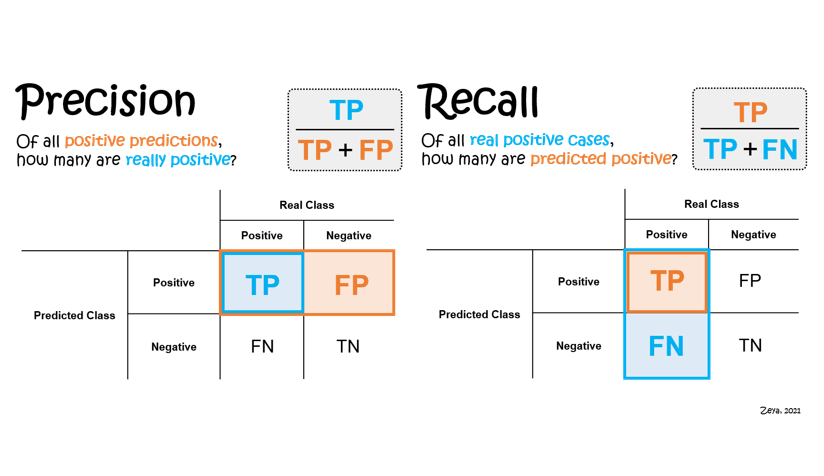

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

thresh=np.arange(0,1,0.05)
non_default_precision, default_precision, non_default_recall, default_recall = [], [], [], []
for t in thresh:
    preds_df['loan_status_'] = preds_df['prob_default'].apply(lambda x: 1 if x > t else 0)
    non_default_precision.append(precision_recall_fscore_support(y_test, preds_df['loan_status_'])[0][0])
    default_precision.append(precision_recall_fscore_support(y_test, preds_df['loan_status_'])[0][1])
    non_default_recall.append(precision_recall_fscore_support(y_test, preds_df['loan_status_'])[1][0])
    default_recall.append(precision_recall_fscore_support(y_test, preds_df['loan_status_'])[1][1])

In [ ]:
plt.plot(thresh, default_recall, label='default recall')
plt.plot(thresh, default_precision, label='default precision')
plt.plot(thresh, non_default_precision, label='non default precision')
plt.legend()

In [ ]:
from sklearn import metrics

preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, prob_default)
auc

In [ ]:
preds_df['loan_status_'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(preds_df['loan_status'],preds_df['loan_status_']))

In [ ]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Concatenate and print the two data frames for comparison
print(pd.concat([y_test.reset_index(drop = True), preds_df], axis = 1))

In [ ]:
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, preds_df)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
metrics.roc_auc_score(true_df, preds_df)

In [ ]:
xgb.plot_importance(clf_gbt, importance_type = 'weight')
clf_gbt.get_booster().get_score(importance_type = 'weight')

In [ ]:
import xgboost as xgb
xgb.plot_importance(model, importance_type = 'weight')

In [ ]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, clf_gbt.predict(X_test), target_names=target_names))

In [ ]:
params= {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

In [ ]:
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            early_stopping_rounds=early_stopping, shuffle=True)

print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over x Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 50 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 50)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

# datacamp quantitative risk management

In [ ]:
portfolio = pd.read_csv(os.getcwd()+'/csv/crisis_portfolio.csv').set_index('Date')
portfolio.index = pd.to_datetime(portfolio.index, dayfirst=True)
portfolio

In [ ]:
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")
plt.show()

weights = np.array([.25,.25,.25,.25])
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns 
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

In [ ]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
covariance

In [ ]:
portfolio_variance = np.transpose(weights) @ covariance @ weights
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

In [ ]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

In [ ]:
returns = asset_returns
# Convert daily returns to quarterly average returns
returns_q = returns.resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head())

# Now convert daily returns to weekly minimum returns
returns_w = returns.resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

In [ ]:
from pypfopt.cla import CLA

In [ ]:
ret, vol, weights = CLA(asset_returns.mean(), covariance).efficient_frontier()

In [ ]:
plt.scatter(vol, ret, s=4, c='g', marker='.')

# xgboost

In [ ]:
lanew=df_signal.filter(like='GOOG').iloc[:,:15].dropna()
lanew.columns=lanew.columns.droplevel(1)
lanew

In [ ]:
Y=lanew.iloc[:,:1]
Y=np.sign(Y.pct_change().shift(-1)).replace(-1,0).dropna() #le dernier est un na
X=lanew.iloc[:-1,1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)

In [ ]:
import xgboost as xgb
clf_gbt = xgb.XGBClassifier(eta=0.1, alpha=0, max_depth=3).fit(X_train, np.ravel(y_train))
gbt_preds = clf_gbt.predict_proba(X_test)
preds_df = pd.DataFrame(gbt_preds[:,1])

In [ ]:
print(clf_gbt.score(X_train, y_train))
print(clf_gbt.score(X_test, y_test))
from sklearn import metrics
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, preds_df)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print(metrics.roc_auc_score(y_test, preds_df))
xgb.plot_importance(clf_gbt, importance_type = 'weight')

# testing parameters

In [ ]:
a = np.arange(3,7)
b = np.arange(5,9)

A,B  = np.meshgrid(a,b)

for x,y in zip(A.ravel(),B.ravel()):
    print([x,y])

In [ ]:
np.arange(-3,3,0.25)

In [ ]:
f(np.arange(-3,3,0.25))

In [ ]:
def f(x):
    return abs(np.sin(x)) + 5 * np.exp(-x**(1000)) * np.cos(x)
#plt.plot(f(np.arange(-3,3,0.01)))

# Violin plot

In [ ]:
d = yf.download(['AAPL','MSFT']).Close.pct_change().dropna()
rd = np.random.random(len(d))-0.5
n = np.random.normal(size=len(d))-0.5
rd = pd.DataFrame([rd,n], columns=d.index, index=['uniform','normal']).T
d = pd.concat((d,rd),axis=1)
d.tail()

In [ ]:
sns.violinplot(d)

# convexity for portflio var et plot 3 dimensions 3D

In [ ]:
rd = np.random.random(len(d))

In [ ]:
len(d)

In [ ]:
from scipy.optimize import basinhopping
basinhopping(maximize_treynor, x0=wght_0)
from scipy.optimize import differential_evolution
differential_evolution(maximize_treynor, bounds=[(0.2,1)]*len(wght_0))

In [ ]:
#comprendre le meshgrid:

A=np.array([0,1,2,3])
B=np.array([10,20,30])

np.meshgrid(A,B)
#on recrée le même mais on fait le test avec tous les B t'as c

In [ ]:
np.meshgrid(A,B, indexing='ij')

In [ ]:
def func(x, y):
    return 3*x-x*y**2+np.sqrt((x*y)**2)

A = np.linspace(-10,10)
B = np.linspace(-10,10)

x,y=np.meshgrid(A,B, indexing='xy')
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, func(x,y), cmap='viridis')
ax.view_init(elev=20, azim=-130)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the function to plot (example of a non-convex function)
def non_convex_function(x, y):
    return np.sin(x) * np.cos(y)

# Create a meshgrid for the plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = non_convex_function(X, Y)

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot the contour on the bottom
ax.contour(X, Y, Z, zdir='z', offset=-2, cmap='viridis')

# Customize the z axis
ax.set_zlim(-2, 2)
ax.set_title('Non-convex')
plt.show()

In [ ]:
plt.contour(X,Y,Z, cmap='Blues', )

In [ ]:
X

In [ ]:
Z

In [ ]:
np.arange(0, 26, 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction
def f(x, y):
    return x**2 + y**2

# Créer la grille de points
x = np.linspace(-6, 6, 3)
y = np.linspace(-6, 6, 3)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Tracer les courbes de niveau
ct = plt.contour(X, Y, Z, levels=5, cmap='viridis') # ou levels = np.arange(0, 26, 5) we want the precise levels
plt.clabel(ct,inline=True,fontsize=15)
ct2 = plt.contourf(X,Y,Z)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Courbes de niveau de $f(x, y) = x^2 + y^2$')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction de calcul de la variance du portefeuille
def calculate_portfolio_variance(w1, w2, cov_matrix):
    weights = np.array([w1, w2])
    return np.dot(weights, np.dot(cov_matrix, weights))

# Matrice de covariance des actifs
cov_matrix = np.array([[0.06, 0.03], [0.03, 0.02]])

# Création d'une plage de poids pour les actifs
weights1 = np.linspace(0, 1, 100)
weights2 = 1 - weights1

# Calcul de la variance pour chaque paire de poids
variances = np.array([calculate_portfolio_variance(w1, w2, cov_matrix) for w1, w2 in zip(weights1, weights2)])

# Création de la figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracé 3D
ax.plot(weights1, weights2, variances, marker='o', linestyle='-.', c='green', markersize=3.5)

# Ajout de labels et titre
ax.set_xlabel('Poids de l\'Actif 1')
ax.set_ylabel('Poids de l\'Actif 2')
ax.set_zlabel('Variance du Portefeuille')
ax.set_title('3D Plot de la Variance du Portefeuille')

# Affichage du graphique
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction de calcul de la variance du portefeuille
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))

# Matrice de covariance des actifs
cov_matrix = np.array([[0.1, -0.03],
                      [-0.03, 0.12]])

# Création d'une grille de poids pour les deux premiers actifs
num_points = 100
weights1 = np.linspace(0, 1, num_points)
weights2 = 1 - weights1

# Création d'une grille 3D avec toutes les combinaisons de poids
W1, W2 = np.meshgrid(weights1, weights2)

# Calcul de la variance pour chaque combinaison de poids
variances = np.array([calculate_portfolio_variance([w1, w2], cov_matrix) for w1, w2 in zip(np.ravel(W1), np.ravel(W2))])
variances = variances.reshape(W1.shape)

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé 3D
surf = ax.plot_surface(W1, W2, variances, cmap='cool', edgecolor='k', alpha=0.7)
fig.colorbar(surf, ax = ax, shrink = 0.7, aspect = 7) 

# Ajout de labels et titre
ax.set_xlabel('Poids de l\'Actif 1')
ax.set_ylabel('Poids de l\'Actif 2')
ax.set_zlabel('Variance du Portefeuille')
ax.set_title('3D Plot de la Variance du Portefeuille avec 2 Actifs')

# Affichage du graphique
plt.show()

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

In [ ]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

In [ ]:
np.polyfit(x,y,1)

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Fonction de calcul de la variance du portefeuille
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))

# Matrice de covariance des actifs
cov_matrix = np.array([[0.1, -0.03],
                      [-0.03, 0.12]])

# Création d'une grille de poids pour les deux premiers actifs
num_points = 100
weights1 = np.linspace(0, 1, num_points)
weights2 = 1 - weights1

# Création d'une grille 3D avec toutes les combinaisons de poids
W1, W2 = np.meshgrid(weights1, weights2)

# Calcul de la variance pour chaque combinaison de poids
variances = np.array([calculate_portfolio_variance([w1, w2], cov_matrix) for w1, w2 in zip(np.ravel(W1), np.ravel(W2))])
variances = variances.reshape(W1.shape)

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=variances, x=W1, y=W2)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=False))

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis=dict(tickformat='.0%'),
        yaxis=dict(tickformat='.0%'),
        zaxis=dict(title='Return'),
    ),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=0.5),
    scene_camera=dict(eye=dict(x=-1.25, y=-1.25, z=1.25)),
    margin=dict(l=0, r=0, b=0, t=50),
    title='3D | f(allocation) = return'
)

# Show the figure
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction de calcul de la variance du portefeuille
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))

# Matrice de covariance des actifs
cov_matrix = np.array([[0.1, 0.03, 0.02],
                      [0.03, 0.12, 0.05],
                      [0.02, 0.05, 0.15]])

# Création d'une grille de poids pour les actifs
num_points = 100
weights1 = np.linspace(0, 1, num_points)
weights2 = np.linspace(0, 1, num_points)
weights3 = 1 - weights1 - weights2

# Création d'une grille 3D avec toutes les combinaisons de poids
W1, W2 = np.meshgrid(weights1, weights2)
W3 = 1 - W1 - W2

# Calcul de la variance pour chaque combinaison de poids
variances = np.array([calculate_portfolio_variance([w1, w2, w3], cov_matrix) for w1, w2, w3 in zip(np.ravel(W1), np.ravel(W2), np.ravel(W3))])
variances = variances.reshape(W1.shape)

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé 3D
ax.plot_surface(W1, W2, variances, cmap='viridis', edgecolor='k', alpha=0.7)

# Ajout de labels et titre
ax.set_xlabel('Poids de l\'Actif 1')
ax.set_ylabel('Poids de l\'Actif 2')
ax.set_zlabel('Variance du Portefeuille')
ax.set_title('3D Plot de la Variance du Portefeuille avec 3 Actifs')

# Affichage du graphique
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Sortino Ratio for a portfolio
def calculate_sortino_ratio(weights, returns, target_return=0): #fake one
    portfolio_return = np.dot(weights, returns)
    negative_returns = np.minimum(target_return - returns, 0)
    downside_volatility = np.std(negative_returns, ddof=1)
    
    if downside_volatility == 0:
        return -portfolio_return  # Penalize portfolios with no downside risk
    
    return -portfolio_return / downside_volatility

# Expected returns for three assets
expected_returns = np.array([0.08, -0.02, -0.03])

# Number of points for each weight
num_points = 100
weights1 = np.linspace(0, 1, num_points)
weights2 = np.linspace(0, 1, num_points)
weights3 = 1 - weights1 - weights2

# Create a 3D grid with all weight combinations
W1, W2 = np.meshgrid(weights1, weights2)

# Calculate the Sortino Ratio for each weight combination
sortino_ratios = np.array([calculate_sortino_ratio([w1, w2, w3], expected_returns) for w1, w2, w3 in zip(np.ravel(W1), np.ravel(W2), np.ravel(W3))])
sortino_ratios = sortino_ratios.reshape(W1.shape)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W1, W2, sortino_ratios, cmap='viridis', edgecolor='k', alpha=0.7)

# Add labels and title
ax.set_xlabel('Weight of Asset 1')
ax.set_ylabel('Weight of Asset 2')
ax.set_zlabel('Sortino Ratio')
ax.set_title('3D Plot of Sortino Ratio for a 3-Asset Portfolio')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Sortino Ratio for a portfolio
def calculate_sortino_ratio(weights, returns, vol):
    portfolio_return = np.dot(weights, returns)
    vols = np.dot(np.dot(weights,vol),weights)
    return - portfolio_return / vols

# Expected returns for two assets
expected_returns = np.array([0.08, 0.02])
cov_mat = np.array([[0.03,0.05],[0.05,0.03]])

# Number of points for each weight
num_points = 100
weights1 = np.linspace(0.5, 1, num_points)
weights2 = 1 - weights1

# Create a 3D grid with all weight combinations
W1, W2 = np.meshgrid(weights1, weights2)

# Calculate the Sortino Ratio for each weight combination
sortino_ratios = np.array([calculate_sortino_ratio([w1, w2], expected_returns, cov_mat) for w1, w2 in zip(np.ravel(W1), np.ravel(W2))])
sortino_ratios = sortino_ratios.reshape(W1.shape)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W1, W2, sortino_ratios, cmap='viridis', edgecolor='k', alpha=0.7)

# Add labels and title
ax.set_xlabel('Weight of Asset 1')
ax.set_ylabel('Weight of Asset 2')
ax.set_zlabel('Sortino Ratio')
ax.set_title('3D Plot of Sortino Ratio for a 2-Asset Portfolio')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Sortino Ratio for a portfolio
def calculate_sortino_ratio(weights, returns, vol):
    portfolio_return = np.dot(weights, returns)
    vols = np.dot(np.dot(weights,vol),weights)
    return portfolio_return / vols

# Expected returns for three assets
expected_returns = np.array([0.08, -0.02, -0.03])
cov_mat = np.array([[0.03,0.02,0.01],[0.01,0.03,0.2], [0.06,-0.02,0.05]])

# Number of points for each weight
num_points = 100
weights1 = np.linspace(0, 1, num_points)
weights2 = np.linspace(0, 1, num_points)
weights3 = 1 - weights1 - weights2

# Create a 3D grid with all weight combinations
W1, W2 = np.meshgrid(weights1, weights2)

# Calculate the Sortino Ratio for each weight combination
sortino_ratios = np.array([calculate_sortino_ratio([w1, w2, w3], expected_returns, cov_mat) for w1, w2, w3 in zip(np.ravel(W1), np.ravel(W2), np.ravel(W3))])
sortino_ratios = sortino_ratios.reshape(W1.shape)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W1, W2, sortino_ratios, cmap='viridis', edgecolor='k', alpha=0.7)

# Add labels and title
ax.set_xlabel('Weight of Asset 1')
ax.set_ylabel('Weight of Asset 2')
ax.set_zlabel('Sortino Ratio')
ax.set_title('3D Plot of Sortino Ratio for a 3-Asset Portfolio')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

def vanilla_call_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


spots = np.linspace(30, 70, 100)
vols = np.linspace(0.01, 0.5, 100)

# Create meshgrid
S, V = np.meshgrid(spots, vols)

#van_calls = [vanilla_call_price(s, 50, 0.03, v, 1) for s, v in zip(S,V)]
van_calls = vanilla_call_price(S, 50, 0.03, V, 1)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, V, van_calls, cmap='viridis')
ax.view_init(elev=10, azim=-90)

# Customize plot
ax.set_title('Price of Vanilla Call Option')
ax.set_xlabel('Spot Price')
ax.set_ylabel('Vol')
ax.set_zlabel('Price')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
r = 0.05  # Risk-free interest rate
sigma = 0.3  # Volatility
K = 100  # Strike price

# Define function to calculate Vanna
def calculate_vanna(S, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    vanna = -np.exp(-r * T) * norm.pdf(d1) * d2 / sigma
    return vanna

# Define ranges for spot price and time to maturity
S_range = np.linspace(50, 150, 100)
T_range = np.linspace(0.1, 2, 100)

# Create meshgrid
S, T = np.meshgrid(S_range, T_range)

# Calculate Vanna for put option
Vanna_put = calculate_vanna(S, T)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Vanna_put, cmap='viridis')

# Customize plot
ax.set_title('Vanna of Put Option')
ax.set_xlabel('Spot Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Vanna')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

# animation 3D plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [ ]:
%matplotlib Tk

In [ ]:
print("backend:", plt.rcParams["backend"])

In [ ]:
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

#plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

In [ ]:
x = 0
y = 0
length_x = np.arange(0, 4*np.pi, 0.045)

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-')  # Initialiser la ligne avec les 25 premières valeurs

def update(frame):
    x_data = length_x[:frame]
    y_data = np.sin(x_data)
    line1.set_data(x_data, y_data) 
    if len(x_data) > 5:
        ax.set_xlim(min(x_data), (max(x_data)))
        ax.set_ylim(min(y_data), (max(y_data)))
    #ax.set_xlim(min(x_data), max(x_data))
    #print(max(x_data))
    return line1,

ani = FuncAnimation(fig, update, frames=range(len(length_x)), interval=1, repeat=False)

plt.show()

In [ ]:
dt = yf.download('AAPL', start='2015-01-01').Close

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float) # 1 2 3 4 5 6 7 8 -> 1 3 6 10 15 21 28 36
    ret[n:] = ret[n:] - ret[:-n] # start from n: remove for each number the cumsum of the number before
    # for example at 4 (10) i want to remove 1 since n = 3
    return ret[n - 1:] / n

In [ ]:
x = dt.index
y = dt.values

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x[0:2],y[0:2])
line2, = ax.plot(x[0:2],y[0:2], c='green')
line3, = ax.plot(x[0:2],y[0:2], c='black', lw=.5, ls='--')

def init():
    line1.set_data(x[0:5], y[0:5])
    return line1,

def update(frame):
    x_data = x[:frame]
    y_data = y[:frame]
    line1.set_data(x_data, y_data)
    line2.set_data(x_data, len(x_data)*[(np.median(y_data))])
    
    for line in ax.lines:
        if line.get_label() == 'mean_line': #or get_color
            line.remove()
    
    ax.axhline(y=np.mean(y_data), ls='--', c='r', label='mean_line')
    #ax.relim()
    if len(x_data) > 5:
        ax.set_xlim(x_data[0], x_data[-1])
        ax.set_ylim(min(y_data), max(y_data))
        
    line3.set_data(x_data[52:], moving_average(y_data, n=53))
    return line1, line2, line3,


ani = FuncAnimation(fig, update, init_func=init, frames=range(6,len(x)), interval=.0001, blit=False, repeat=False)

#writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('scatter.gif', writer=writer)

plt.show()

In [ ]:
xx, yy = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
zz = np.sin(xx) + np.cos(yy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(xx, yy, zz, cmap='viridis')]

def update(frame):

    plot[0].remove()
    zz_new = np.sin(xx + frame*0.1) + np.cos(yy + frame*0.1) 
    plot[0] = ax.plot_surface(xx, yy, zz_new, cmap='viridis')  

ani = FuncAnimation(fig, update, frames=range(25), interval=50, repeat=True)
plt.show()

### credit rating bar3d

In [ ]:
index = ['A','B','C','D']
#index = [1,2,3,4]
cols = np.array([1,2,5,10])
y = np.array([[0,0.01,0.035,0.04],[0.015,0.02,0.07,0.17],[0.05,0.13,.22,.275],[.04,.1,.25,.45]])
df = pd.DataFrame(y, index=(index), columns = cols)
df

In [ ]:
%matplotlib Tk
%matplotlib inline

In [ ]:
tableau = df.to_numpy()

x = np.arange(len(index))
y = cols
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)

#épaisseur des barres
dx = 0.8
dy = 0.45
dz = tableau.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, dz, shade=False)

#ax.set_xtick(index)
#ax.set_xticklabels(index)
ax.set_xlabel('Rating')
ax.set_ylabel('Maturity')
ax.set_zlabel('Probability of default')

plt.show()

In [ ]:
np.gradient(df.to_numpy(), axis=0)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(index))
y = cols
x, y = np.meshgrid(x, y)

ax.plot_surface(x, y, df.to_numpy())

#ax.set_xtick(index)
#ax.set_xticklabels(index)
ax.set_xlabel('Rating')
ax.set_ylabel('Maturity')
ax.set_zlabel('Probability of default')

plt.show()

# scatter 3d plan

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

points = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

# Définir les limites du plan
xx, yy = np.meshgrid(range(15), range(15))

# Equation du plan : z = ax + by + c
a, b, c = 1, 1, 0  # Coefficients du plan z = x + y
zz = a * xx + b * yy + c

ax.plot_surface(xx, yy, zz, alpha=0.5, color='blue')

line_points = np.array([
    [0, 0, 0],
    [15, 15, 15]
])
ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], color='green')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

# NVIDIA regression open close

In [ ]:
data = yf.download('NVDA')[['Open','Close']]
data

In [ ]:
x = (data.Open.shift(-1) - data.Close).shift(1)[1:-1]
y = data.Close[1:-1] - data.Open[1:-1]

In [ ]:
sm.OLS(y, sm.add_constant(x)).fit().summary()

In [ ]:
plt.scatter(x,y)

# errorbar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 7, 10])

# Fit the linear regression model
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Generate y values based on the model for plotting
y_fit = polynomial(x)

# Calculate residuals (errors)
residuals = y - y_fit

# Plotting
plt.figure(figsize=(10, 5))

# Plot original data points
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_fit, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.errorbar(x, y_fit, yerr=abs(residuals), fmt='*', ecolor='green', capthick=0.5, capsize=10)
plt.title('Error Bars (Residuals)')
plt.xlabel('x')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Données
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 7, 10])

# Régression linéaire
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

# Calcul des résidus et de la variance des résidus
residuals = y - y_fit
var_res = np.var(residuals, ddof=2)  # ddof=2 pour une estimation non biaisée

# Matrice de conception X (avec terme constant)
X = np.vstack([x, np.ones(len(x))]).T

# Calcul de la matrice de variance-covariance des coefficients
XtX_inv = np.linalg.inv(X.T @ X)
cov_matrix = var_res * XtX_inv
std_errors = np.sqrt(np.diag(cov_matrix))

# Erreur standard des prédictions
se_pred = np.sqrt((X @ cov_matrix @ X.T).diagonal())

# Affichage des résultats
plt.errorbar(x, y, yerr=se_pred, fmt='o', ecolor='red', capthick=2, capsize=5, label='Prediction Std. Error')
plt.plot(x, y_fit, label='Regression Line')
plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Error Bars using Coefficient Standard Errors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# PCA

In [ ]:
stocks = yf.download(['META','NVDA']).Close
stocks.tail()

In [ ]:
stocks.pct_change().dropna().add(1).cumprod().plot()

In [ ]:
centered_returns = stocks.pct_change().dropna() - stocks.pct_change().dropna().mean()
centered_returns.add(1).cumprod().plot()

In [ ]:
S = centered_returns.cov() * 252
S

In [ ]:
EValues, EVectors = np.linalg.eig(S)
print(f'EigenValues: {EValues}\nEigenVectors: {EVectors}')

In [ ]:
x_axis = np.linspace(np.nanmin(centered_returns), np.nanmax(centered_returns), 100)

#1 data for pca lines
dx1 = EVectors[0,0]
dy1 = EVectors[1,0]
slope1 = dy1/dx1

dx2 = EVectors[0,1]
dy2 = EVectors[1,1]
slope2 = dy2/dx2

y_axis1 = slope1 * x_axis
y_axis2 = slope2 * x_axis

#2 centered returns
plt.plot(centered_returns.iloc[:,0:1], centered_returns.iloc[:,1:], '.', alpha=.25)

#3 plot principal components
plt.plot(x_axis, y_axis1, label='first component')
plt.plot(x_axis, y_axis2, label='second component')

plt.legend()

plt.xlabel('R0 Values')
plt.ylabel('R1 Values')
plt.autoscale(tight=True)
plt.show()

In [ ]:
equities = yf.download('GOOG,AMZN,NFLX,BAC,JPM,WFC', start='2020-01-01').Close

In [ ]:
def pca(assets):
    x = assets.pct_change().dropna()
    p = np.linalg.eig( (x-x.mean()).cov() )
    eValues = p[0]
    eVectors = p[1]
    
    return np.sort( eValues / sum(eValues) )[::-1], eVectors[:,]

In [ ]:
evalues, evectors = pca(equities)

plt.plot(np.cumsum(evalues), '-o')
plt.title('Number of PC vs Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
tech = yf.download('GOOG,AMZN,META', start='2020-01-01', progress=False).Close
bank = yf.download('BAC,JPM,GS', start='2020-01-01', progress=False).Close
commo = yf.download('CL=F,RB=F,GC=F', start='2020-01-01', progress=False).Close

In [ ]:
lookback = 50

In [ ]:
t = tech.pct_change().iloc[-lookback:].values
b = bank.pct_change().iloc[-lookback:].values
c = commo.pct_change().iloc[-lookback:].values

In [ ]:
def plot_by_pca(df, symbols, lookback):
    r = []
    for symbol in symbols:
        r.append(df[symbol].pct_change().iloc[-lookback:].values)
        
    R = np.array(r)
    eigenSystem = np.linalg.eig( np.cov( ( (R - np.mean(R))/np.std(R) ) ) )
    

    for i, symbol in zip(eigenSystem[1], symbols):
        plt.plot(i[0], i[1], '-o', markersize=5)
        x_ofst = 0.02
        y_ofst = 0.02
        plt.text(i[0] + x_ofst, i[1] + y_ofst, symbol, fontsize=8)
        
    for i in np.linspace(-np.pi, np.pi,1500):
        plt.plot(np.cos(i), np.sin(i),'k.', ms=0.3)
    
    plt.title('Factor Groupings')
    plt.xlabel('FC')
    plt.ylabel('SC')
    plt.axis('equal');

In [ ]:
df = yf.download('GOOG,AMZN,META,BAC,JPM,GS,CL=F,RB=F,GC=F', start='2023-01-01', progress=False).Close
plot_by_pca(df, df.columns, 50)

In [ ]:
g1 = [10,11,8,3,2,1]
g2 = [6,4,5,3,2.8,1]

In [ ]:
df = pd.DataFrame([g1,g2], columns=[f'Mouse {num}' for num in np.arange(1,7)], index=['Gene 1','Gene 2'])
df

In [ ]:
x = df.iloc[:1,:]
y = df.iloc[1:2,:]

avg_x = df.iloc[:1,:].mean(axis=1).values
avg_y = df.iloc[1:2,:].mean(axis=1).values

In [ ]:
plt.scatter(x, y)
plt.scatter(avg_x, avg_y, marker='x', color='green')
plt.axis([0,12,0,12])

In [ ]:
df = df.sub(np.array((avg_x,avg_y)))
x = df.iloc[:1,:]
y = df.iloc[1:2,:]

In [ ]:
plt.scatter(x, y, c='g')
plt.axhline(y=0, c='b')
plt.axvline(x=0, c='b')
plt.grid()

from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = False)
lm.fit(x.values[0].reshape(-1,1), y.values[0])

plt.plot(np.arange(-5, 5, 0.1), lm.predict(np.arange(-5, 5, 0.1).reshape(-1,1)), 'r')

In [ ]:
lm.coef_

In [ ]:
x.mul(3).to_numpy()

In [ ]:
residual(3)

In [ ]:
np.sum((model(3) - y.values)**2)

In [ ]:
residual(3)

In [ ]:
def model(a):
    return x.mul(a).values
def residual(a):
    print(model(a) - y.values)
    resid = np.sum((model(a) - y.values)**2)
    return 3

minimize(residual, x0=3)

In [ ]:
residual(-2232332.34)

## widgets

In [ ]:
%matplotlib Tk

In [ ]:
eval('4*t', {'np': np}, {'t': t})

In [ ]:
from matplotlib.widgets import TextBox

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

t = np.arange(-2.0, 2.0, 0.001)
l, = ax.plot(t, np.zeros_like(t), lw=2)


def submit(expression):
    """
    Update the plotted function to the new math *expression*.

    *expression* is a string using "t" as its independent variable, e.g.
    "t ** 3".
    """
    ydata = eval(expression, {'np': np}, {'t': t})
    l.set_ydata(ydata)
    ax.relim()
    ax.autoscale_view()
    plt.draw()


axbox = fig.add_axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, "Evaluate", textalignment="center")
text_box.on_submit(submit)
text_box.set_val("t ** 2")  # Trigger `submit` with the initial string.

plt.show()

In [ ]:
from matplotlib.widgets import MultiCursor

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(3*np.pi*t)
s3 = np.sin(4*np.pi*t)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t, s1)
ax2.plot(t, s2)
fig, ax3 = plt.subplots()
ax3.plot(t, s3)

multi = MultiCursor(None, (ax1, ax2, ax3), color='r', lw=1)
plt.show()

In [ ]:
from matplotlib.widgets import Button, Slider


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq, label='Frequency [Hz]', valmin=0.1, valmax=30, valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp, label="Amplitude", valmin=0, valmax=10, valinit=init_amplitude, orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [ ]:
from matplotlib.widgets import Slider, Button

t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0 * np.sin(2 * np.pi * f0 * t)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
l, = ax.plot(t, s, lw=2)

ax_freq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_amp = fig.add_axes([0.25, 0.15, 0.65, 0.03])

# define the values to use for snapping
allowed_amplitudes = np.concatenate([np.linspace(.1, 5, 100), [6, 7, 8, 9]])

# create the sliders
samp = Slider(
    ax_amp, "Amp", 0.1, 9.0,
    valinit=a0, valstep=allowed_amplitudes,
    color="green"
)

sfreq = Slider(
    ax_freq, "Freq", 0, 10*np.pi,
    valinit=2*np.pi, valstep=np.pi,
    initcolor='none'  # Remove the line marking the valinit position.
)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    #fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

ax_reset = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(ax_reset, 'Reset', hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2, color='k', label='2 Hz')
l1, = ax.plot(t, s1, lw=2, color='r', label='4 Hz')
l2, = ax.plot(t, s2, lw=2, color='g', label='6 Hz')
plt.subplots_adjust(left=0.2)

lines = [l0, l1, l2]

# Make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.05, 0.4, 0.1, 0.15])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)


def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

plt.show()

In [ ]:
from matplotlib.widgets import RadioButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(8*np.pi*t)

fig, ax = plt.subplot_mosaic(
    [
        ['main', 'freq'],
        ['main', 'color'],
        ['main', 'linestyle'],
    ],
    width_ratios=[5, 1],
    layout='constrained',
)
l, = ax['main'].plot(t, s0, lw=2, color='red')

radio_background = 'lightgoldenrodyellow'

ax['freq'].set_facecolor(radio_background)
radio = RadioButtons(ax['freq'], ('1 Hz', '2 Hz', '4 Hz'),
                     label_props={'color': 'cmy', 'fontsize': [12, 14, 16]},
                     radio_props={'s': [16, 32, 64]})


def hzfunc(label):
    hzdict = {'1 Hz': s0, '2 Hz': s1, '4 Hz': s2}
    ydata = hzdict[label]
    l.set_ydata(ydata)
    fig.canvas.draw()
radio.on_clicked(hzfunc)

ax['color'].set_facecolor(radio_background)
radio2 = RadioButtons(
    ax['color'], ('red', 'blue', 'green'),
    label_props={'color': ['red', 'blue', 'green']},
    radio_props={
        'facecolor': ['red', 'blue', 'green'],
        'edgecolor': ['darkred', 'darkblue', 'darkgreen'],
    })


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw()
radio2.on_clicked(colorfunc)

ax['linestyle'].set_facecolor(radio_background)
radio3 = RadioButtons(ax['linestyle'], ('-', '--', '-.', ':'))


def stylefunc(label):
    l.set_linestyle(label)
    fig.canvas.draw()
radio3.on_clicked(stylefunc)

plt.show()

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib Tk

In [ ]:
dt = yf.download(['^SPX', '^DJI','^IXIC', 'GC=F','HG=F','SI=F','PA=F','CL=F']).Close.pct_change().dropna()
dt

In [ ]:
%matplotlib Tk
#%matplotlib inline

In [ ]:
from tkinter import Tk
root = Tk()
root.title('My Title')

In [ ]:
from matplotlib.widgets import Button, Slider

# The parametrized function to be plotted
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def bs_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

def set_labels():
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Strike')
    ax.set_zlabel('Price')
    ax.set_title('Call price')
    
    ax2.set_xlabel('Maturity')
    ax2.set_ylabel('Strike')
    ax2.set_zlabel('Price')
    ax2.set_title('Put price')

T = np.linspace(0.01,1)
K = np.linspace(80,120)
T_, K_ = np.meshgrid(T,K)

prices_call = bs_call(100,K_,T_,0.02,0.2)
prices_put = bs_put(100,K_,T_,0.02,0.2)

# Define initial parameters
init_vol = .2
init_r = 0.02

# Create the figure and the line that we will manipulate
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Call & Put Prices', fontsize=15)
ax = fig.add_subplot(121, projection='3d')
surf_call = ax.plot_surface(T_, K_, prices_call, cmap='hsv', edgecolor='k', alpha=0.7)

ax2 = fig.add_subplot(122, projection='3d')
surf_put = ax2.plot_surface(T_, K_, prices_put, cmap='hsv', edgecolor='k', alpha=0.7)

#ax4 = plt.subplot2grid((2, 2), (1, 0), colspan=2, projection='3d')

set_labels()

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.2)

ax_vol = fig.add_axes([0.25, 0.1, 0.45, 0.07])
vol_slider = Slider(
    ax=ax_vol, label='Volatility ($\sigma$)', valmin=0, valmax=1, valinit=init_vol, orientation='horizontal')

ax_r = fig.add_axes([0.25, 0.05, 0.45, 0.07])
ir_slider = Slider(
    ax=ax_r, label="Interest rate (r)", valmin=0, valmax=0.3, valinit=init_r, orientation="horizontal")

ax_spot = fig.add_axes([0.25, 0, 0.45, 0.07])
spot_slider = Slider(
    ax=ax_spot, label="Spot (S)", valmin=60, valmax=140, valinit=100, orientation="horizontal")


# The function to be called anytime a slider's value changes
def update(val):
    #surf.remove()
    ax.clear()
    ax2.clear()

    vol = vol_slider.val
    ir = ir_slider.val
    spot = spot_slider.val
    surf_call = ax.plot_surface(T_, K_, bs_call(spot,K_,T_,ir, vol), cmap='hsv', edgecolor='k', alpha=0.7)
    surf_put = ax2.plot_surface(T_, K_, bs_put(spot,K_,T_,ir, vol), cmap='hsv', edgecolor='k', alpha=0.7)
    set_labels()
    fig.canvas.draw_idle()

# register the update function with each slider
vol_slider.on_changed(update)
ir_slider.on_changed(update)
spot_slider.on_changed(update)

plt.show()

In [ ]:
from matplotlib.widgets import Slider, Button, RangeSlider, RadioButtons

current_index = '^SPX'
current_commo = 'GC=F'
s = dt.rolling(360).corr()[current_index].unstack()[current_commo]
avg = s.mean()

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)

l, = ax.plot(s, lw=2, c='gold', label='Gold')
avg_l = ax.axhline(avg, ls='--', c='black')
avg_txt = ax.text(s.index.max(), avg+.05, f'{avg:.2%}')

ax.legend()

dict_index = {'S&P500': '^SPX', 'Dow Jones': '^DJI', 'NASDAQ': '^IXIC'}
invert_dict_index = {a: b for b, a in dict_index.items()}

commo_index = {'GC=F': 'Gold', 'CL=F': 'Crude Oil', 'HG=F': 'Copper', 'PA=F': 'Palladium', 'SI=F': 'Silver'}
invert_dict_commo = {a: b for b, a in commo_index.items()}

ax.set_title(f'{invert_dict_index[current_index]} correlation with {l.get_label()} [{dt.index.min().year} -> {dt.index.max().year}]')

# FUNCTIONS

def update_avg_line_txt():
    x1 = pd.to_datetime(str(slider.val[0]))
    x2 = pd.to_datetime(str(slider.val[1]))
    asset = invert_dict_commo[l.get_label()] #asset name
    current_index = dict_index[radios_index.value_selected] #mkt index
    amp_rolling = rolling_w.val #rolling window
    
    y = dt.rolling(int(amp_rolling)).corr()[current_index].unstack()[asset][x1:x2]
    avg_l.set_ydata( [y.mean()] * 2 ) # 2 * same value in ax.axhline
    
    avg_txt.set_position( (x2, y.mean() + 0.05) )
    avg_txt.set_text(f'{y.mean():.2%}')
    ax.set_title(f'{invert_dict_index[current_index]} correlation with {l.get_label()} [{dt.index.min().year} -> {dt.index.max().year}]')

def update_lim_legend():
    ticker = l.get_ydata().name # get le name apres on met dict pour label
    l.set_label(commo_index[ticker])
    y = l.get_data()[1] #idx1=y
    ax.set_ylim(y.min(),y.max()) #update lim
    ax.legend() #update legend

### rolling window

ax_amp = fig.add_axes([0.25, 0.15, 0.65, 0.03])
allowed_amplitudes = np.arange(60, 720)
rolling_w = Slider(
    ax_amp, "Rolling window", valmin=60, valmax=720,
    valinit=360, valstep=allowed_amplitudes,
    color="green"
)

def update_rolling(val):
    rolling_window = rolling_w.val
    asset = invert_dict_commo[l.get_label()]
    current_index = dict_index[radios_index.value_selected]
    values = dt.rolling(int(rolling_window)).corr()[current_index].unstack()[asset]
    l.set_ydata(values)
   # ax.autoscale(enable=True, axis='y')

    update_avg_line_txt()
    
    fig.canvas.draw_idle()

rolling_w.on_changed(update_rolling)

### slider timerange

slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
min_y, max_y = dt.index.min().year, dt.index.max().year
slider = RangeSlider(slider_ax, "Timerange", valinit = (min_y, max_y),
                     valstep = np.arange(min_y, max_y+1,1), valmin= min_y, valmax=max_y+1)
def update_time(val):
    year_min = val[0]
    year_max = val[1]
    new_indexes = dt.loc[str(year_min):str(year_max)].index
    ax.set_xlim(new_indexes.min(), new_indexes.max())
   # ax.autoscale(enable = True, axis='y')
    update_avg_line_txt()
    fig.canvas.draw_idle()
    
slider.on_changed(update_time)

### buttons

ax_gold = fig.add_axes([0.8, 0.01, 0.1, 0.08])
ax_copper = fig.add_axes([0.65, 0.01, 0.1, 0.08])
ax_silver = fig.add_axes([0.5, 0.01, 0.1, 0.08])
ax_palladium = fig.add_axes([0.35, 0.01, 0.1, 0.08])
ax_oil = fig.add_axes([0.2, 0.01, 0.1, 0.08])

button_gold = Button(ax_gold, 'Gold', hovercolor='0.575')
button_copper = Button(ax_copper, 'Copper', hovercolor='0.575')
button_silver = Button(ax_silver, 'Silver', hovercolor='0.575')
button_palladium = Button(ax_palladium, 'Palladium', hovercolor='0.575')
button_oil = Button(ax_oil, 'Oil', hovercolor='0.575')

def gold(event):
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()['GC=F'])
    l.set_color('gold')
   # ax.autoscale(enable=True, axis='y')
    update_lim_legend()
    update_avg_line_txt()
    fig.canvas.draw_idle()
    
def copper(event):
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()['HG=F'])
    l.set_color('brown')
    update_lim_legend()
    update_avg_line_txt()
    fig.canvas.draw_idle()
    
def silver(event):
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()['SI=F'])
    l.set_color('silver')
    update_lim_legend()
    update_avg_line_txt()
    fig.canvas.draw_idle()
    
def palladium(event):
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()['PA=F'])
    l.set_color('sienna')
    update_lim_legend()
    update_avg_line_txt()

def oil(event):
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()['CL=F'])
    l.set_color('black')
    update_lim_legend()
    update_avg_line_txt()
    fig.canvas.draw_idle()
    
button_gold.on_clicked(gold)
button_copper.on_clicked(copper)
button_silver.on_clicked(silver)
button_palladium.on_clicked(palladium)
button_oil.on_clicked(oil)

# which index
index_selector = plt.axes([.91, 0.25, 0.175, 0.175])
index_selector.set_facecolor("white")
radios_index = RadioButtons(
    index_selector, ('S&P500', 'Dow Jones', 'NASDAQ'),
    label_props={'color': ['red', 'blue', 'lightskyblue']},
    radio_props={
        'facecolor': 'green',
        'edgecolor': ['darkred', 'darkblue', 'darkgreen'], })

def change_index(label):
    current_index = dict_index[label]
    l.set_ydata(dt.rolling(int(rolling_w.val)).corr()[current_index].unstack()[current_commo])
    update_avg_line_txt()
    fig.canvas.draw()
radios_index.on_clicked(change_index)

plt.show()

In [ ]:
from matplotlib.widgets import RangeSlider

# generate a fake image
np.random.seed(19680801)
N = 128
img = np.random.randn(N, N)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(bottom=0.25)

im = axs[0].imshow(img)
axs[1].hist(img.flatten(), bins='auto')
axs[1].set_title('Histogram of pixel intensities')

# Create the RangeSlider
slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Threshold", img.min(), img.max())

# Create the Vertical lines on the histogram
lower_limit_line = axs[1].axvline(slider.val[0], color='k')
upper_limit_line = axs[1].axvline(slider.val[1], color='k')


def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)

    # Update the image's colormap
    im.norm.vmin = val[0]
    im.norm.vmax = val[1]

    # Update the position of the vertical lines
    lower_limit_line.set_xdata([val[0], val[0]])
    upper_limit_line.set_xdata([val[1], val[1]])

    # Redraw the figure to ensure it updates
    fig.canvas.draw_idle()


slider.on_changed(update)
plt.show()

In [ ]:
from matplotlib.path import Path
from matplotlib.widgets import LassoSelector


class SelectFromCollection:
    """
    Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : `~matplotlib.axes.Axes`
        Axes to interact with.
    collection : `matplotlib.collections.Collection` subclass
        Collection you want to select from.
    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to *alpha_other*.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    data = np.random.rand(100, 2)

    subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)

    pts = ax.scatter(data[:, 0], data[:, 1], s=80)
    selector = SelectFromCollection(ax, pts)

    def accept(event):
        if event.key == "enter":
            print("Selected points:")
            print(selector.xys[selector.ind])
            selector.disconnect()
            ax.set_title("")
            fig.canvas.draw()

    fig.canvas.mpl_connect("key_press_event", accept)
    ax.set_title("Press enter to accept selected points.")

    plt.show()

In [ ]:
def shrinkage_covariance(returns, shrinkage_target=0.1):
    """
    Calculate the Ledoit-Wolf shrinkage estimator for covariance matrix regularization.

    Parameters:
    returns (numpy.ndarray): Array of asset returns where each column represents a different asset.
    shrinkage_target (float): Shrinkage intensity parameter (default is 0.1).

    Returns:
    numpy.ndarray: Shrinkage covariance matrix.
    """
    n_assets = returns.shape[1]
    n_obs = returns.shape[0]

    # Calculate the sample covariance matrix
    sample_cov = np.cov(returns, rowvar=False, bias=True)

    # Calculate the average sample covariance
    mean_sample_cov = np.mean(sample_cov)

    # Calculate the difference between sample covariances and the mean sample covariance
    diff_cov = sample_cov - mean_sample_cov

    # Calculate the squared Frobenius norm of the difference matrix
    diff_frobenius_norm_squared = np.linalg.norm(diff_cov, ord='fro') ** 2

    # Calculate the squared Frobenius norm of the sample covariance matrix
    sample_cov_frobenius_norm_squared = np.linalg.norm(sample_cov, ord='fro') ** 2

    # Calculate the shrinkage intensity parameter (lambda in Ledoit-Wolf)
    shrinkage = min(n_obs / (n_obs - 1), shrinkage_target)

    # Calculate the optimal shrinkage constant (delta in Ledoit-Wolf)
    delta = diff_frobenius_norm_squared / sample_cov_frobenius_norm_squared

    # Calculate the shrinkage target matrix
    shrinkage_target_matrix = np.eye(n_assets) * mean_sample_cov

    # Calculate the shrinkage covariance matrix
    shrinkage_cov = (1 - shrinkage) * sample_cov + shrinkage * shrinkage_target_matrix

    return shrinkage_cov

# matplotlib mosaic

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create layout
layout = [
    ["A", "A", "B"],
    ["C", ".", "D"],
    ["C", "E", "E"]
]

fig, axd = plt.subplot_mosaic(layout, figsize=(10,10))

# Generate some random data

data = np.random.random((10,100)) 

# Plot the data on the subplots

axd['A'].imshow(data) # creates a 2-D image
axd['A'].set_title('Image Plot')

axd['B'].hist(data[0], color='green') # creates a histogram off all the data flattened to a 1-D array
axd['B'].set_title('Histogram')

axd['C'].scatter(data[1, :], data[2, :], color='purple') # scatter plot with second and third columns 
axd['C'].set_title('Scatter plot')

axd['D'].plot(data[0], color='orange') # generate a lineplot of the first row of data
axd['D'].set_title('Line Plot')

axd['E'].bar(np.arange(100), data[0], color='red')
axd['E'].set_title('Bar Plot')

# Add main title

fig.suptitle('Matplotlib subplot_mosaic Example', fontsize=16)

# Adjusting the layout for better view
plt.tight_layout()
plt.show()

In [ ]:
feature_x = np.linspace(-3.0, 1.0, 7) 
feature_y = np.linspace(-3.0, 1.0, 7) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
fig, ax = plt.subplots(1, 1) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
ax.contourf(X, Y, Z) 
  
ax.set_title('Filled Contour Plot') 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
  
plt.show() 

# quadratic gradient

In [ ]:
def portfolio_variance(weights, vol_A, vol_B, cov_AB):
    w_A, w_B = weights
    return w_A**2 * vol_A**2 + w_B**2 * vol_B**2 + 2 * w_A * w_B * cov_AB

def gradient_portfolio_variance(weights, vol_A, vol_B, cov_AB):
    w_A, w_B = weights
    
    # Dérivées partielles de la variance par rapport à w_A et w_B
    d_var_dw_A = 2 * w_A * vol_A**2 + 2 * w_B * cov_AB
    d_var_dw_B = 2 * w_B * vol_B**2 + 2 * w_A * cov_AB
    
    return np.array([d_var_dw_A, d_var_dw_B])

def optimize_portfolio_variance(vol_A, vol_B, cov_AB, learning_rate, num_iterations):
    # Initialisation des poids
    weights = np.array([0.5, 0.5])
    
    for _ in range(num_iterations):
        # Calcul du gradient
        grad = gradient_portfolio_variance(weights, vol_A, vol_B, cov_AB)
        
        # Mise à jour des poids
        weights = weights - learning_rate * grad
        
        # Normalisation des poids pour respecter la contrainte
        weights = weights / np.sum(weights)
    
    return weights

# Paramètres
vol_A = risk[0]
vol_B = risk[1]
cov_AB = covAB
learning_rate = 0.01
num_iterations = 1000

# Optimisation
optimized_weights = optimize_portfolio_variance(vol_A, vol_B, cov_AB, learning_rate, num_iterations)

print("Poids optimisés:", optimized_weights)
print("Variance du portefeuille optimal:", portfolio_variance(optimized_weights, vol_A, vol_B, cov_AB))

In [ ]:
dt=yf.download(['AAPL','GC=F'], interval='1mo')['Close'].dropna().pct_change()
ret=dt.mean()
risk=dt.std()*1.5
covAB=dt.cov().iloc[0,1]
cov=dt.cov()

In [ ]:
def varp(w):
    return  np.dot(w, np.dot(cov,w))

w0=np.array([0.5,0.5])
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(w) - 1}
]
minimize(varp, w0, constraints=constraints, bounds=[(0,1)]*2)

In [ ]:
import numpy as np

def sharpe_ratio(weights, rf, vol_A, vol_B, cov_AB):
    w_A, w_B = weights
    rp = (1 - w_A - w_B) * rf + w_A * 0.04 + w_B * 0.06  # Rendement attendu du portefeuille
    sigma_p = np.sqrt(w_A**2 * vol_A**2 + w_B**2 * vol_B**2 + 2 * w_A * w_B * cov_AB)  # Volatilité du portefeuille
    return (rp - rf) / sigma_p  # Sharpe Ratio

def gradient_sharpe(weights, rf, vol_A, vol_B, cov_AB):
    w_A, w_B = weights
    rp = (1 - w_A - w_B) * rf + w_A * 0.04 + w_B * 0.06  # Rendement attendu du portefeuille
    sigma_p = np.sqrt(w_A**2 * vol_A**2 + w_B**2 * vol_B**2 + 2 * w_A * w_B * cov_AB)  # Volatilité du portefeuille
    
    # Dérivées partielles du Sharpe Ratio par rapport à w_A et w_B
    d_sr_dw_A = ((rf - rp) * w_B * vol_B**2 + (rp - rf) * w_A * vol_A**2 - (rp - rf) * w_A * w_B * cov_AB) / sigma_p**3
    d_sr_dw_B = ((rf - rp) * w_A * vol_A**2 + (rp - rf) * w_B * vol_B**2 - (rp - rf) * w_A * w_B * cov_AB) / sigma_p**3
    
    return np.array([d_sr_dw_A, d_sr_dw_B])

def optimize_sharpe_ratio(rf, vol_A, vol_B, cov_AB, learning_rate, num_iterations):
    # Initialisation des poids
    weights = np.array([0.5, 0.5])
    
    for _ in range(num_iterations):
        # Calcul du gradient
        grad = gradient_sharpe(weights, rf, vol_A, vol_B, cov_AB)
        
        # Mise à jour des poids
        weights = weights + learning_rate * grad
        
        # Normalisation des poids pour respecter la contrainte
        weights = weights / np.sum(weights)
    
    return weights

# Paramètres
rf = 0.2
vol_A = 0.02
vol_B = 0.05
cov_AB = 0.03
learning_rate = 0.01
num_iterations = 1000

# Optimisation
optimized_weights = optimize_sharpe_ratio(rf, vol_A, vol_B, cov_AB, learning_rate, num_iterations)

print("Poids optimisés:", optimized_weights)
print("Sharpe Ratio optimal:", sharpe_ratio(optimized_weights, rf, vol_A, vol_B, cov_AB))


In [ ]:
a, b = 0.5593, 0.44006

retp = (0.04 * a + 0.06 * b) - 0.02
riskp = (a**2 * 0.02**2 + b**2 * 0.05**2 + 2*a*b*0.03)
retp/riskp

In [ ]:
sharpe_ratio([0.5,0.5], 0.02, )

In [ ]:
def func_var(x,v1,v2,cov):
    return x**2 * v1 + (1-x)**2 * v2 + 2*x*(1-x)*cov

def func_ret(x, rets):
    return x @ rets

In [ ]:
x=np.arange(0.1,1.1,0.01)
risk=func_var(x,dt.pct_change().var()[0], dt.pct_change().var()[1], dt.pct_change().cov().iloc[0,1])
plt.plot(risk)

In [ ]:
dt=yf.download([a'AAPL','MSFT'], interval='1wk')['Close']
dt.dropna(inplace=True)

list_var=[]

for w in range(1000):
    wghts=np.random.rand(2)
    wghts=wghts/np.sum(wghts)
    list_var.append(np.sqrt(wghts @ dt.pct_change().cov() @ wghts))

plt.plot(np.sort(list_var))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Paramètres de la distribution
alpha = 4  # Paramètre de forme pour l'asymétrie (plus alpha est grand, plus la queue est étendue à droite)
loc = 0    # Moyenne de la distribution
scale = 1  # Écart-type de la distribution

# Génération de données à partir de la distribution asymétrique
data = skewnorm.rvs(alpha, loc=loc, scale=scale, size=1000)

# Tracer l'histogramme des données
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Tracer la fonction de densité de probabilité (PDF) théorique
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, alpha, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Loi normale asymétrique")
plt.show()


# binance

In [ ]:
def get_binance_data(pair, countdown='open', interval='1h', start='1 May 2022', end=None):
  client = Client()
  intervals = {
      '15m': Client.KLINE_INTERVAL_15MINUTE,
      '1h':  Client.KLINE_INTERVAL_1HOUR,      
      '4h':  Client.KLINE_INTERVAL_4HOUR,
      '1d':  Client.KLINE_INTERVAL_1DAY
  }
  interval = intervals.get(interval, '4h')
  print(f'Historical interval {interval}')
  klines = client.get_historical_klines(symbol=pair, interval=interval, start_str=start, end_str=end)
  data = pd.DataFrame(klines)
  data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
  data.index = [pd.to_datetime(x, unit='ms').strftime('%Y-%m-%d %H:%M:%S') for x in data.open_time]
  usecols=['open', 'high', 'low', 'close', 'volume']
  data = data[usecols]
  data = data.astype('float')
  return data


api_key = '' # use your api-key
symbol = 'ETHUSDT'
eth = get_binance_data(symbol)
eth.head()

In [ ]:
big_df = pd.DataFrame()
cols = data['return'].columns.unique()[79+7+8:]
for i, col in enumerate(cols):
    print(i, col, end='\n')
    try:
        big_df[col] = get_binance_data(col+'USDT').close.rename(col)
    except Exception:
        print('error', col)
        pass

# Jensen inequality

In [ ]:
def function(x):
    return x**2

x=np.arange(-5,5)
y=function(x)

plt.plot(x,y)

t=0.4
x1=-3
x2=2.5

[plt.scatter(x_,function(x_), c='r') for x_ in [x1,x2]]
plt.plot([x1,x2], [function(x1),function(x2)], ls='--')

tx1=t*x1
tx2=(1-t)*x2
f_linear_comb = function(tx1 + tx2)

tx1_=t*function(x1)
tx2_=(1-t)*function(x2)
linear_comb_f = sum([tx1_,tx2_])

if f_linear_comb < linear_comb_f:
    print('Convexe')
else:
    print('Concave')

In [ ]:
yf.download('BVI.PA').Close.pct_change().std() * np.sqrt(252)

yf.download('BVI.PA').Close.pct_change().mean() * 252

# Exotic products and structuring

In [ ]:
def montecarlo_simulation(initial_price, num_simulations, num_steps, mean_return, volatility, barrier, early_redemption, frequency=1, plot=True):

    returns = np.random.normal( (1+mean_return) ** (1/252) , volatility / np.sqrt(252), (num_simulations, num_steps))
    returns[:, 0] = initial_price
    returns = returns.cumprod(axis=1)

    if plot == True:
        plt.figure(figsize=(18,8))
        plot_returns = returns.copy()
        [plt.plot(_) for _ in plot_returns]
        plt.axhline(y=barrier, lw=4, ls='--', c='r')
        plt.axhline(y=early_redemption, lw=4, ls='--', c='g')
        [plt.axvline(x= ( (f+1) *  int(num_steps / frequency) ), ls='-.', c='black') for f in range(frequency) if frequency > 1]
        [plt.text(x= ( (f+1) *  int(num_steps / frequency) ), y=initial_price, s='Coupon', ha='center', bbox = dict(boxstyle='square', pad=.3, fc='orange', ec='black', lw=1.65)) for f in range(frequency)]
        plt.fill_between(range(num_steps), barrier, plt.gca().get_ylim()[0]-10, alpha=0.5, color='orange')
        plt.fill_between(range(num_steps), early_redemption, plt.gca().get_ylim()[1]+10, alpha=0.085, color='green')
        plt.xlim(0, num_steps - 1)
        plt.ylim(plt.gca().get_ylim()[0]+10, plt.gca().get_ylim()[1]-10)
        plt.ylabel('Asset price')
        plt.xlabel('Days')
        plt.title('Montecarlo Simulations: Underlying asset\'s price')
        plt.show()
    
    return returns
    

initial_price = 100
num_simulations = 1
num_steps = 252
mean_return = 0.1
volatility = 0.125
barrier = 80
early_redemption = 120
coupon_frequency = 1

montecarlo_simulations = montecarlo_simulation(initial_price, num_simulations, num_steps, mean_return, 
                                               volatility, barrier, early_redemption, coupon_frequency)

montecarlo_simulations[:,-1].mean()

In [ ]:
risk_free_rate = 0.025
coupon = 0.00

def autocall_price(montecarlo_simulations, coupon, risk_free_rate):
    autocall_prices = []
    maturity = montecarlo_simulations.shape[1] / 252
    max_loss = barrier / initial_price
    for _ in montecarlo_simulations:
        if np.any(_ < barrier):
            elapsed_time = (_ < barrier).argmax()
            autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
        elif np.any(_ > early_redemption):
            elapsed_time = (_ > early_redemption).argmax()
            autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time / 252))
        else:
            autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * maturity))

    price = sum(autocall_prices) / montecarlo_simulations.shape[0]
    error = 1.96 * np.std(np.array(autocall_prices)) / np.sqrt(num_simulations) # 95% confidence level
    
    print(f'Underlying asset characteristics:\nInitial price: {initial_price:.2f} | expected return: {mean_return:.2%} | volatility: {volatility:.2%}\n')
    print(f'Autocall characteristics:\nCoupon: {coupon:.2%} if the underlying asset doesn\'t fall below {barrier:.2f} and automatically reedemed if it exceeds {early_redemption:.2f}\n')
    print(f'Autocall price: {price:.2%} ± {error:.6%}')
    
autocall_price(montecarlo_simulations, coupon, risk_free_rate)

In [ ]:
def meshgrid(montecarlo_simulations, coupon, risk_free_rate): #-> price
    autocall_prices = []
    maturity = montecarlo_simulations.shape[1] / 252
    max_loss = barrier / initial_price
    for _ in montecarlo_simulations:
        if np.any(_ < barrier):
            elapsed_time = (_ < barrier).argmax()
            autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
        elif np.any(_ > early_redemption):
            elapsed_time = (_ > early_redemption).argmax()
            autocall_prices.append( (1 + coupon) * np
                                   .exp(-risk_free_rate * elapsed_time / 252))
        else:
            autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * maturity))

    price = sum(autocall_prices) / montecarlo_simulations.shape[0]
    return price

In [ ]:
import plotly.graph_objects as go
cp = np.arange(0,0.15,0.001)
rf = np.arange(-0.02,0.08,0.001)

cp_3dm, rf_3dm = np.meshgrid(cp, rf)

price_3dm = meshgrid(montecarlo_simulations, cp_3dm, rf_3dm)

fig = go.Figure(data=[go.Surface(z=price_3dm, x=cp_3dm, y=rf_3dm, colorscale='jet')])

fig.update_layout(
    title='Price of an Autocall with 1 coupon | f(coupon, risk_free)  = price',
    scene=dict(
        xaxis_title='Coupon',
        yaxis_title='Risk free',
        zaxis_title='Price',
        zaxis_tickformat='.2%',
        xaxis_tickformat='.1%',
        yaxis_tickformat='.1%',
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(
            eye=dict(x=-1.25, y=-1.25, z=1.25)
        )
    )
)

fig.show()

In [ ]:
risk_free_rate = 0.045
coupon = 0.075
frequency = 4

def autocall_price_multiple_frequency(montecarlo_simulations, coupon, frequency, risk_free_rate):
    autocall_prices = []
    maturity = montecarlo_simulations.shape[1] / 252
    max_loss = barrier / initial_price
    
    for _ in montecarlo_simulations:
        
        if frequency > 1:
            threshold = int(len(_) / frequency)
            for f in range(frequency):

                if np.any(_[:((f+1) * threshold)] < barrier):
                    elapsed_time = (_ < barrier).argmax()
                    autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
                    break
                elif np.any(_[:((f+1) * threshold)] > early_redemption):
                    elapsed_time = (_ > early_redemption).argmax()
                    autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time / 252))
                    break
                else:
                    if f == frequency - 1:
                        elapsed_time = ((1+f) / frequency)
                        autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time) )
                    else:
                        autocall_prices.append( coupon * np.exp(-risk_free_rate * maturity) )
        else:
            if np.any(_ < barrier):
                elapsed_time = (_ < barrier).argmax()
                autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
            elif np.any(_ > early_redemption):
                elapsed_time = (_ > early_redemption).argmax()
                autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time / 252))
            else:
                autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * maturity))

    price = sum(autocall_prices) / montecarlo_simulations.shape[0]
    error = 1.96 * np.std(np.array(autocall_prices)) / np.sqrt(num_simulations)
    
    print(f'Underlying asset characteristics:\nInitial price: {initial_price:.2f} | expected return: {mean_return:.2%} | volatility: {volatility:.2%}\n')
    print(f'Autocall characteristics:\nCoupon frequency: {frequency} | Coupon rate: {coupon:.2%} | barrier: {barrier:.2f} | redemption: {early_redemption:.2f}\n')
    print(f'Autocall price: {price:.2%} ± {error:.6%}')
    
autocall_price_multiple_frequency(montecarlo_simulations, coupon, frequency, risk_free_rate)

In [ ]:
risk_free_rate = 0.03
coupon = 0.06
frequency = 25

def meshgrid2(montecarlo_simulations, coupon, frequency, risk_free_rate):
    autocall_prices = []
    maturity = montecarlo_simulations.shape[1] / 252
    max_loss = barrier / initial_price
    
    for _ in montecarlo_simulations:
        
        if frequency > 1:
            threshold = int(len(_) / frequency)
            for f in range(frequency):

                if np.any(_[:((f+1) * threshold)] < barrier):
                    elapsed_time = (_ < barrier).argmax()
                    autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
                    break
                elif np.any(_[:((f+1) * threshold)] > early_redemption):
                    elapsed_time = (_ > early_redemption).argmax()
                    autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time / 252))
                    break
                else:
                    if f == frequency - 1:
                        elapsed_time = ((1+f) / frequency)
                        autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time) )
                    else:
                        autocall_prices.append( coupon * np.exp(-risk_free_rate * maturity) )
        else:
            if np.any(_ < barrier):
                elapsed_time = (_ < barrier).argmax()
                autocall_prices.append( max_loss * np.exp(-risk_free_rate * elapsed_time / 252))
            elif np.any(_ > early_redemption):
                elapsed_time = (_ > early_redemption).argmax()
                autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * elapsed_time / 252))
            else:
                autocall_prices.append( (1 + coupon) * np.exp(-risk_free_rate * maturity))

    price = sum(autocall_prices) / montecarlo_simulations.shape[0]
    return price

In [ ]:
#CP 2 high br meshgrid2 NR
cp = np.arange(0,0.15,0.01)
freq = np.arange(1,20,1)

cp_3dm, freq_3dm = np.meshgrid(cp, freq)

price_3dm = np.array([meshgrid2(montecarlo_simulations, w1, w2, risk_free_rate) for w1, w2 in zip(np.ravel(cp_3dm), np.ravel(freq_3dm))])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
z = price_3dm.reshape(cp_3dm.shape)

surf = ax.plot_surface(cp_3dm, freq_3dm, z, cmap='coolwarm', edgecolor='k', alpha=0.7)
fig.colorbar(surf, ax = ax, shrink = 0.7, aspect = 7)
ax.view_init(elev=20, azim=145)
plt.show()

In [ ]:
# MULTIVARIATE SIMULATION

initial_price = 100
means = np.array([.01,.025])

correlation = -1
#cov=np.linalg.cholesky(data.cov())
cov_ = correlation * 0.05 * 0.075
cov = np.array([[0.072,cov_],[cov_,0.044]])
returns = np.random.multivariate_normal( means , cov, (1,252)).cumsum(axis=1)
returns[:,0] = 0
#returns[:, 0] = initial_price
plt.title('Multivariate normal simulation with 2 assets')
[plt.plot(_) for _ in returns];

In [ ]:
L = np.linalg.cholesky(cov)
returns = np.random.normal(size=(1, 252, 2)).cumsum(axis=1) @ L.T
returns[:,0] = 1
[plt.plot(_) for _ in returns];

In [ ]:
from matplotlib.ticker import FormatStrFormatter

vols = np.arange(0,0.21,0.01)
c, r = 0.10, 0.04
list_prices = np.zeros(len(vols))
for i, v in enumerate(vols):
    list_prices[i] = meshgrid((montecarlo_simulation(initial_price, 5000, num_steps, mean_return, 
                                               v, barrier, early_redemption, coupon_frequency, plot=False)), c, r)

gradients = np.gradient(list_prices[:], vols[:])
plt.figure(figsize=(16,8))
for i, gradient in enumerate(gradients):
    if gradient > 0:
        plt.arrow(vols[i] * 100, list_prices[i], 0, gradient * .15, color='b', head_width=.1, head_length=0.0025)
    elif gradient < 0:
        plt.arrow(vols[i] * 100, list_prices[i], 0, gradient * .05, color='g', head_width=.1, head_length=0.005)
plt.plot(vols * 100, list_prices, label='Price', ls='--', lw=2, c='r')
plt.title('Autocall price as a function of the underlying\'s volatility')
plt.xlabel('Volatility')
plt.xlim(vols[0], vols[-1]*100)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.ylabel('Autocall price');

In [ ]:
means = np.arange(0,0.21,0.01)
list_prices = np.zeros(len(means))
for i, m in enumerate(means):
    list_prices[i] = meshgrid((montecarlo_simulation(initial_price, 10000, num_steps, m, 
                                               volatility, barrier, early_redemption, coupon_frequency, plot=False)), c, r)

plt.figure(figsize=(16,8))
plt.plot(vols * 100, list_prices, label='Price', ls='-.', lw=2, c='r')
plt.title('Autocall price as a function of the underlying\'s mean return')
plt.xlabel('μ')
plt.xlim(vols[0], vols[-1]*100)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.ylabel('Autocall price');

In [ ]:
m3

In [ ]:
v3, m3 = np.meshgrid(vols, means)
values = np.array([montecarlo_simulation(initial_price, 100, num_steps, a, b, barrier, early_redemption, coupon_frequency, plot=False) for a, b in zip(np.ravel(m3), np.ravel(v3))])
#meshgrid(values, c, r)

In [ ]:
values = np.array([montecarlo_simulation(initial_price, 100, num_steps, a, b, barrier, early_redemption, coupon_frequency, plot=False) for a, b in zip (np.ravel(v3),np.ravel(m3))])

In [ ]:
from scipy.stats import norm
from scipy.stats import skewnorm

def asymmetric_pdf(x, mu, sigma, skewness):
    z = (x - mu) / sigma
    return 1.66 / sigma * norm.pdf(z) * norm.cdf(skewness * z)

mu = 0
sigma = 1
skewness = -2

x = np.linspace(-5, 5, 1000)
asymmetric_pdf_values = asymmetric_pdf(x, mu, sigma, skewness)
normal_pdf_values = norm.pdf(x, mu)
plt.figure(figsize=(10, 6))
plt.plot(x, asymmetric_pdf_values, label='Assymetric gaussian', color='red')
plt.plot(x, normal_pdf_values, label='Gaussian', linestyle='--', color='blue')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

rolling_volatility = data['Close'].rolling(window=30).std().dropna()

data = data.reindex(rolling_volatility.index)

time = np.arange(len(data))
price = data['Close'].values
time_mesh, price_mesh = np.meshgrid(time, price)

volatility_mesh = np.zeros_like(time_mesh)
for i in range(len(price)):
    #print(rolling_volatility[i])
    volatility_mesh[i] = rolling_volatility[i]

plt.figure(figsize=(12, 8))
plt.imshow(volatility_mesh, cmap='viridis')#, aspect='auto', extent=[time_mesh.min(), time_mesh.max(), price_mesh.min(), price_mesh.max()])
plt.colorbar(label='rolling vol')

plt.show()

In [ ]:
a = np.array([1,-3,23,109,285])
plt.plot(a)

In [ ]:
means = np.arange(0,0.21,0.01)
list_prices = np.zeros(len(means))
for i, m in enumerate(means):
    list_prices[i] = meshgrid((montecarlo_simulation(initial_price, 10000, num_steps, m, 
                                               volatility, barrier, early_redemption, coupon_frequency, plot=False)), c, r)

plt.figure(figsize=(16,8))
plt.plot(vols * 100, list_prices, label='Price', ls='-.', lw=2, c='r')
plt.title('Autocall price as a function of the underlying\'s mean return')
plt.xlabel('μ')
plt.xlim(vols[0], vols[-1]*100)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.ylabel('Autocall price');

In [ ]:
np.diff(np.diff(np.diff(a)))

# Regression Machine Learning Deep Learning Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction à optimiser
def function_to_optimize(x):
    return 2 * x**2 - 5 * x + 5

# Dérivée de la fonction
def derivative(x):
    return 4 * x - 5

# Descente de gradient
def gradient_descent(learning_rate, num_iterations):
    x_values = []
    y_values = []
    der_values = []
    # Initialisation de x
    x = 5

    for _ in range(num_iterations):
        x_values.append(x)
        y_values.append(function_to_optimize(x))
        der_values.append(derivative(x))
        # Mise à jour de x selon la règle du gradient descent
        x = x - learning_rate * derivative(x)
    return x_values, y_values, der_values

# Paramètres de la descente de gradient
learning_rate = 0.05
num_iterations = 50

# Exécution de la descente de gradient
x_values, y_values, der_values = gradient_descent(learning_rate, num_iterations)

# Affichage de la fonction et de la trajectoire de la descente de gradient
x_range = np.linspace(-3, 6, 100)
plt.figure(figsize=(9,6))
plt.plot(x_range, function_to_optimize(x_range), label='Function to Optimize')
plt.scatter(x_values, y_values, color='red', label='Gradient Descent')
plt.plot(x_range, derivative(x_range), label='Derivative')
for v in zip(x_values, der_values):
    plt.text(v[0]*1.03, function_to_optimize(v[0]), "f'(x)={:.2f}".format(v[1]))
plt.axhline(y=0, linestyle='--', color='black')
plt.title('Descente de Gradient pour x = 2x^2 - 5x + 5')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.show()


#NUEMRICAL METHOD
def numerical_derivative(func, x, epsilon=1e-6):
    return (func(x + epsilon) - func(x - epsilon)) / (2 * epsilon)

def gradient_descent_numerical(learning_rate, num_iterations):
    x_values = []
    y_values = []
    der_values = []
    # Initial value for x
    x = 5

    for _ in range(num_iterations):
        x_values.append(x)
        y_values.append(function_to_optimize(x))
        der_values.append(numerical_derivative(function_to_optimize, x))
        # Update x using the gradient descent rule
        x = x - learning_rate * numerical_derivative(function_to_optimize, x)
    return x_values, y_values, der_values


x_values, y_values, der_values = gradient_descent_numerical(0.05, 50)

x_range = np.linspace(-3, 6, 100)
plt.figure(figsize=(4, 3))
plt.plot(x_range, function_to_optimize(x_range), label='Function to Optimize')
plt.scatter(x_values, y_values, color='red', label='Gradient Descent')
plt.plot(x_values, der_values, label='Numerical Derivative')
for v in zip(x_values, der_values):
    plt.text(v[0] * 1.03, function_to_optimize(v[0]), "f'(x)={:.2f}".format(v[1]))
plt.axhline(y=0, linestyle='--', color='black')
plt.title('Gradient Descent for x = 2x^2 - 5x + 5 (Numerical Derivative)')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.show()

In [ ]:
print(x_values[-3:])
minimize(function_to_optimize,0)

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x, y = make_regression(n_samples=15, n_features=1, noise=5)
y=(y).reshape(y.shape[0], 1)
X=np.hstack((x, np.ones(x.shape)))

plt.scatter(x,y)
plt.axhline(linestyle='--', y=0)
plt.axvline(linestyle='--', x=0)

In [ ]:
def model(X, theta):
    return X@theta #theta[0] * x + theta[1] * 1 (ax+b)

def cost_function(X,y,theta):
    m=len(y)
    return (1/(2*m)) * np.sum( (model(X,theta)-y)**2    )

def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y) 

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history=np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        #print(grad(X, y, theta),i)
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

theta=np.random.randn(2,1)

plt.scatter(x, model(X,theta), color='red')
plt.scatter(x,y)
plt.show()
print(cost_function(X,y,theta))

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=.1, n_iterations=50)
print('theta final:',theta_final)

predictions=model(X,theta_final)

plt.plot(x, predictions, color='red')
plt.scatter(x,y)

In [ ]:
func=np.poly1d(np.polyfit(x.reshape(-1),y.reshape(-1),1))
print(func)
plt.plot(x,func(x), color='r')
plt.scatter(x,y)

In [ ]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1- u/v

plt.plot(range(len(cost_history)), cost_history)
print('{:.2%}'.format(coef_determination(y, predictions)))

ça marche car si on fait dérivée partielle de cost function on trouve x * (ax-b) pour les x et (ax-b) pour le intercept, donc avec Xt ça lui met des 1
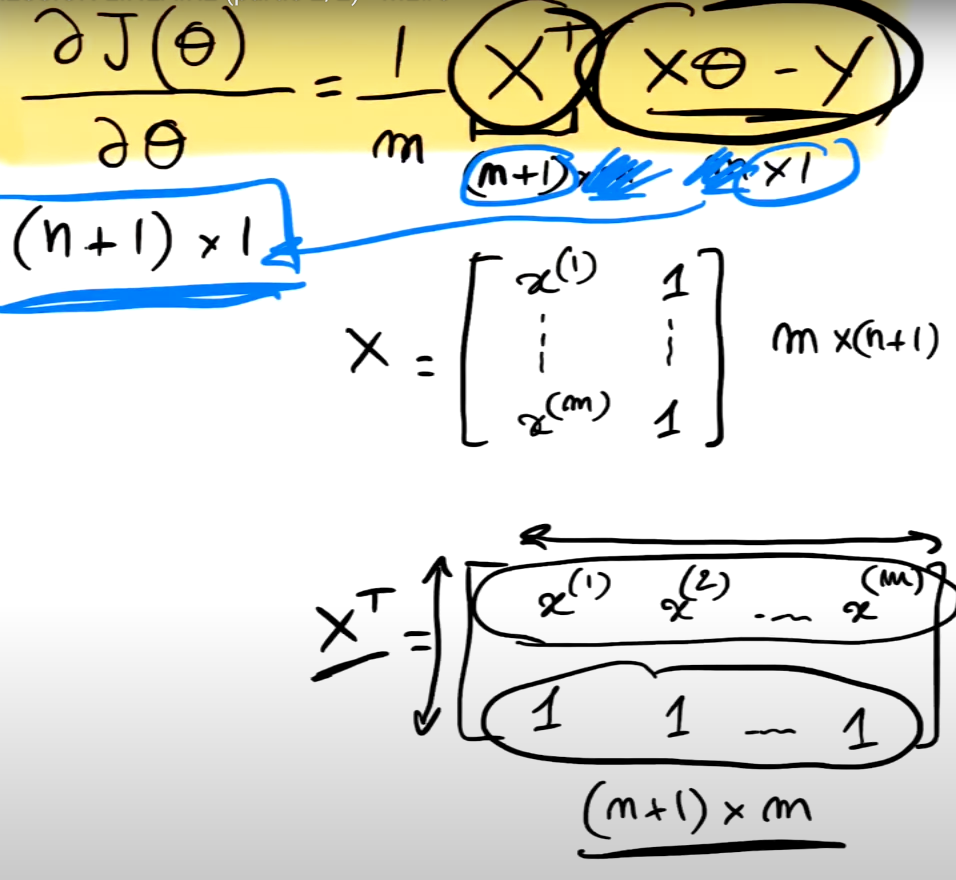

In [ ]:
x, y = make_regression(n_samples=1000, n_features=1, noise=1)
y=y**3+abs(y/2)
y=y.reshape(y.shape[0], 1)
X=np.hstack((x**3, x, np.ones(x.shape)))

plt.scatter(x,y, alpha=0.5)
plt.axhline(linestyle='--', y=0)
plt.axvline(linestyle='--', x=0)
plt.show()

theta=np.random.rand(3,1)

plt.scatter(x, model(X,theta), color='red')
plt.scatter(x, y)
plt.show()

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=800)
print(theta_final)

predictions=model(X,theta_final)

plt.scatter(x, predictions, color='red')
plt.scatter(x, y, alpha=0.15)

In [ ]:
x, y = make_regression(n_samples=100, n_features=2, noise=1)
y=y.reshape(y.shape[0], 1)
X=np.hstack((x, np.ones((x.shape[0], 1))))

plt.scatter(x[:,0],y, alpha=0.5)
plt.axhline(linestyle='--', y=0)
plt.axvline(linestyle='--', x=0)
plt.show()

theta=np.random.rand(3,1)

plt.scatter(x[:,0], model(X,theta), color='red') #plot graph feature 1
plt.scatter(x[:,0], y)
plt.show()

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=1, n_iterations=4)
print(theta_final)

predictions=model(X,theta_final)

plt.scatter(x[:,0], predictions, color='red')
plt.scatter(x[:,0],y, alpha=0.15)

# VAR Vector AutoRegressif

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
dt = yf.download(['AAPL','MSFT','TSLA'])['Close'].dropna().pct_change()

In [ ]:
VAR(dt).fit(3).summary()

# Granger causality

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

X = np.array((20,35,12,34,37,41,45,26,30,32,35,40,41,41))
Y = np.array((15,20,35,12,34,37,41,45,26,30,32,35,41,41))
df = pd.DataFrame([X,Y], index=['X','Y']).T
#perform Granger-Causality test
gc_res = grangercausalitytests(df[['Y','X']], 3)

In [ ]:
import numpy as np
import statsmodels.api as sm

# Données fournies
X = np.array([20, 35, 12, 34, 37, 41, 45, 26, 30, 32, 35, 40, 41, 41])
Y = np.array([15, 20, 35, 12, 34, 37, 41, 45, 26, 30, 32, 35, 41, 41])

# Définir les variables avec un retard de 1 période
X_lag = X[:-1]
Y_lag = Y[:-1]
X_current = X[1:]

# Modèle de base (sans Y)
X_lag_with_const = sm.add_constant(X_lag)
model_base = sm.OLS(X_current, X_lag_with_const).fit()
SSR_base = np.sum(model_base.resid**2)

# Modèle complet (avec Y)
XY_lag_with_const = sm.add_constant(np.column_stack((X_lag, Y_lag)))
model_full = sm.OLS(X_current, XY_lag_with_const).fit()
SSR_full = np.sum(model_full.resid**2)

# Nombre d'observations et de paramètres
n = len(X_current)
k = 3  # 2 coefficients (X_lag et Y_lag) + constant
q = 1  # Nombre de paramètres de Y dans le modèle complet

# Calcul de la statistique F
F_stat = ((SSR_base - SSR_full) / q) / (SSR_full / (n - k))

F_stat

# Yields

In [ ]:
yields=(yf.download(['^TNX','^IRX'])['Close']/100).dropna()
diff=yields['^IRX']-yields['^TNX']

In [ ]:
yields.plot(figsize=(17,6.5))
crosses=np.argwhere(np.diff(np.sign((diff))))
for c in crosses:
    plt.axvline(yields.iloc[c].index, color='black', linewidth=0.15, alpha=0.5, linestyle='--')
plt.fill_between(diff.index, yields['^IRX'], y2=plt.gca().get_ylim()[1], where=yields['^TNX']>yields['^IRX'], color='green', alpha=0.025)
plt.fill_between(diff.index, yields['^TNX'], y2=plt.gca().get_ylim()[0], where=yields['^TNX']<yields['^IRX'], color='red', alpha=0.05)
plt.text(0.05, 0.8, len(crosses), transform=plt.gca().transAxes)
plt.legend(['13 MONTHS','10 YEAR'])
plt.show()

In [ ]:
sp_yield=pd.concat([-np.sign(yields['^IRX'].diff()), sp['2010':]], axis=1)
sp_yield['Chg']=sp_yield['Close'].pct_change()
sp_yield['p']=sp_yield['^IRX'].shift(-1)*sp_yield['Chg']
sp_yield.dropna(inplace=True)
sp_yield

In [ ]:
(sp_yield['p']+1).cumprod().plot(figsize=(16,8))

In [ ]:
yields[yields['^TNX']<yields['^IRX']]

# Pairs trading

In [ ]:
# https://www.youtube.com/watch?v=odKXszbOGT4
stocks=yf.download(['GOOG','MSFT'], start='2010-10-10')['Adj Close']
stocks=stocks.reset_index().set_index('Date').dropna()
stocks = stocks.assign(**{f'Chg_{ticker}': stocks[ticker].pct_change() for ticker in stocks.columns}).shift(-1)
stocks.dropna(inplace=True)
stocks

In [ ]:
coeffs=np.polyfit(stocks['GOOG'],stocks['MSFT'],1)
func=np.poly1d(coeffs)
stocks['Theoritical']=func(stocks['GOOG'])
stocks['Diff']=stocks['Theoritical']-stocks['MSFT']
#stocks['delta_x']=stocks['Diff'].diff()
stocks['Ret']=np.where(stocks['Diff']>0,stocks['Chg_GOOG']-stocks['Chg_MSFT'], stocks['Chg_MSFT']-stocks['Chg_GOOG'])
(1+stocks['Ret']).cumprod().plot(figsize=(12,5))
stocks
plt.axhline(y=1, c='r')

# Ordre d'intégration

In [ ]:
func = np.poly1d([2,1])
func

In [ ]:
x = np.arange(0,50,1)
rd = np.random.random(50) * 5
y = func(x) + rd
plt.plot(x, y)

In [ ]:
#for shift in range
shift_y = y - np.roll(y,-1)
plt.plot(x[:-1], shift_y[:-1])

# Correlation

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# Exemple de données
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 9, 15, 100])

# Calcul de la corrélation de Spearman
correlation, p_value = spearmanr(x, y)

plt.plot(x,y)
plt.scatter(x,y,c='r')
plt.text(2,100,'Spearman: {:.2%}'.format(correlation))
plt.text(2,50,'Pearson: {:.2%}'.format(np.corrcoef(x,y)[0][1]))

In [ ]:
for a in range(1000):
    for b in range(1000):
        for c in range(1000):
            pass

# RSI

In [ ]:
df=yf.download('AAPL', interval='1wk', period='4Y')[['Adj Close','High']]
df.loc[:,'Chg']=df.loc[:,'Adj Close'].pct_change().shift(-1)

def calculate_rsi(data, period=14):
    delta = data.diff(1)

    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

df.loc[:,'RSI']=calculate_rsi(df['Adj Close'])
df=df[20:]

def rsi_returns(i):
    df.loc[:,'buyrsi'] = np.where(df['RSI'] < i, 1, np.nan)
    df.loc[:,'buyrsi'].fillna(method='ffill', limit=10, inplace=True)  # Hold 10 days - 2 weeks
    df.loc[:,'buyrsi'].fillna(0, inplace=True)
    return ((df['buyrsi'] * df['Chg']) + 1).cumprod()

rsi_results=pd.DataFrame()
for i in range(1,75,1):
    rsi_results[i]=rsi_returns(i)
rsi_results.plot(figsize=(16,8))
plt.legend().remove()

In [ ]:
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

# Télécharger les données
df = yf.download('AAPL', interval='1wk', period='4Y')[['Adj Close','High']]
df.loc[:,'Chg'] = df.loc[:,'Adj Close'].pct_change().shift(-1)

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df.loc[:,'RSI'] = calculate_rsi(df['Adj Close'])
df.dropna(inplace=True)

def rsi_returns(i):
    buyrsi = df['RSI'].apply(lambda x: 1 if x < i else np.nan)
    buyrsi.fillna(method='ffill', limit=10, inplace=True)  # Hold 10 days - 2 weeks
    buyrsi.fillna(0, inplace=True)
    return -((buyrsi * df['Chg']) + 1).cumprod().iloc[-1] # Minimize negative cumulative return

# Utiliser scipy.optimize.minimize pour trouver la valeur de RSI qui maximise le rendement cumulatif
result = minimize(rsi_returns, x0=30, bounds=[(1, 90)], method='Powell')  # x0 est la valeur initiale, bounds est la plage de recherche

# Appliquer la stratégie avec la valeur optimale trouvée
df['buyrsi'] = np.where(df['RSI'] < result.x[0], 1, np.nan)
df['buyrsi'].fillna(method='ffill', limit=10, inplace=True)
df['buyrsi'].fillna(0, inplace=True)

# Afficher les résultats
df['cumulative_return'] = (df['buyrsi'] * df['Chg'] + 1).cumprod()
df[['cumulative_return']].plot(figsize=(16, 8))
plt.legend().remove()
plt.show()

# Derivative

In [ ]:
def f(x):
    return 3*x**2+2*x+3
def fp(x):
    return 6*x+2
def fpp():
    return 6
def tangent_line(x, x0):
    return fp(x0) * (x - x0) + f(x0)

In [ ]:
x, y =np.arange(-20,20,1), (f(np.arange(-20,20,1)))
plt.plot(x,y)
x, y =np.arange(-20,20,1), (fp(np.arange(-20,20,1)))
plt.plot(x,y)
x, y =np.arange(-3,25,1), (tangent_line(np.arange(-3,25,1),20))
plt.plot(x,y)

In [ ]:
# Define the function to minimize
def f(x):
    return 25*x**3 

In [ ]:
x, y =np.arange(-50,50,1), (f(np.arange(-50,50,1)))
plt.plot(x,y)

result = minimize(f, x0=2, method='SLSQP') 
                  #,constraints={'type': 'ineq', 'fun': lambda x: x - 1})
result

# PCA

In [ ]:
data=yf.download(['AAPL','MSFT','TSLA']).dropna().iloc[-1:]
data

In [ ]:
np.exp(data['High']-data['Close'])*5

# leetcode

In [ ]:
inp=np.array([3,2,1,3,1])
inp

In [ ]:
step=0
total_init=0
while step<len(inp):
    jump=inp[step]
    step+=jump
if step-inp[-1]+1==len(inp):
    print('true')
else:
    print('false')

In [ ]:
prodd=[]
inp=np.array([1,2,3,4])

for i, a in enumerate(inp):
    if i == 0:
        prodd.append(inp[i+1:].prod())
    elif i == len(inp):
        prodd.append(inp[:-1].prod())
    else:
        prodd.append(inp[:i].prod() * inp[i+1:].prod())
prodd

In [ ]:
s1='mississippi'
s2='issip'

if s2 in s1:
    len_s1=len(s1)
    len_s2=len(s2)
    for a in range(len_s1-len_s2+1):
        if s1[a:a+len_s2] == s2:
            print(a)

In [ ]:
output_list=[]
input_list=[0,1,2,4,5,7]
#input_list=[0,4,8,10,11,13]

for a in range(len(input_list)):
    i=1
    if a!=len(input_list)-1:
        while((input_list[a+i]-input_list[a])==i):
            i+=1
            if a+i==len(input_list):
                break
        if i==1:
            output_list.append(input_list[a])
        else:
            output_list.append(str(str(input_list[a])+'-'+str(input_list[a+i])))
    a=a+i
output_list

In [ ]:
new_phrase=[]
s='the sky is blue'

In [ ]:
s.split(' ')[::-1]

In [ ]:
rn='fihjjjjei'
mag='hjibagacbhadfaefdjaeaebgi'

letters_rn = [m for m in mag]

#letters_rn=[]
#for let in mag:
#    letters_rn.append(let)
    
i=0
while i<len(rn)-1:
    if not rn[i] in letters_rn:
        print('False at index', i, 'for', rn[i])
        break
    letters_rn.remove(rn[i])
    i+=1

In [ ]:
s = 'dog dog dog dog'
pattern='abba'

In [ ]:
word_dict={}
i=0
for word in s.split(' '):
    word_dict.setdefault(word, i)
    i+=1
    
dict1=[word_dict[w] for w in s.split(' ')]
dict1

In [ ]:
dict_w='abcdefghijklmnopqrstuvwxyz'
letter_to_number = {}
i=0
for l in dict_w:
    letter_to_number.setdefault(l, i)
    i+=1
    
dict2=lw=[letter_to_number[w] for w in pattern]
dict2

In [ ]:
dict1==dict2

In [ ]:
s="()[]{}"

i=0
while i <= len(s) -1:
    if s[i] == "(":
        if s[i+1] ==")":
            print('ok 1')
            i+=2
        else:
            break
    elif s[i] == "[":
        if s[i+1] =="]":
            print('ok 2')
            i+=2
        else:
            break
    elif s[i] == "{":
        if s[i+1] =="}":
            print('ok 3')
            i+=2
        else:
            break

In [ ]:
nums=[-2,1,3,4,-1,2,1,-5,4]
#nums=[-2,1,3]

max_subarray = -100
for i in range(len(nums)):
    current_subarray = 0
    for j in range(i, len(nums)):
        current_subarray += nums[j]
        max_subarray = max(max_subarray, current_subarray)
max_subarray

In [ ]:
from scipy.integrate import quad

In [ ]:
quad(lambda x: x**2-5, -2,3)

# Quantitative Asset Management QAM

In [ ]:
yf.download(['AAPL','BAC']).Close.pct_change().cov()

In [ ]:
m = np.array([0.10,0.08])
cov = np.array([[0.007,0.017],[0.017,0.004]])*100
w = np.array([0.5,0.5])
w1 = w[0]
w2 = w[1]
o1 = cov[0][0]
o2 = cov[1][1]
cov12 = cov[0][1]

In [ ]:
weights = (np.linalg.inv(cov) @ np.ones(2)) / (np.ones(2) @ np.linalg.inv(cov) @ np.ones(2))
weights

In [ ]:
weights @ cov @ weights

In [ ]:
w @ cov @ w

In [ ]:
w @ cov @ w

In [ ]:
minimize(lambda w: w @ cov @ w, x0 = [0.5,0.5], bounds=[(0,1)], constraints={'type':'eq','fun':lambda w: np.sum(w) - 1}).x

In [ ]:
print( w1**2 * o1 + w2**2 * o2 + 2 * w1 * w2 * cov12 ) #var

print( w @ cov @ w )

In [ ]:
2*w1*o1 + 2*w2*cov12 #var'

# Shifted MACD

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=yf.download('^GSPC', start='2023-09-01', interval='60m')[['Close','High']]
df=yf.download('^IXIC', start='2020-01-01', interval='1d')[['Close','High']]
df.loc[:,'Chg']=df.loc[:,'Close'].pct_change().shift(-1)

k = df.loc[:,'Close'].ewm(span=12, adjust=False, min_periods=12).mean()
d = df.loc[:,'Close'].ewm(span=26, adjust=False, min_periods=26).mean()
macd = k - d
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
df.loc[:,'macdf'] = macd
df.loc[:,'macds'] = macd_s
df=df[::4]

In [ ]:
df.loc[:,'buy_sell']=np.sign(df['macdf']-df['macds'])
df['buy']=np.where(df['macdf']>df['macds'],1,0)

df['buy_sell_profit']=df['buy_sell']*df['Chg']
df['buy_profit']=df['buy']*df['Chg']

df['buy_shifted']=df['buy'].shift(-1)
df.loc[(df['buy_shifted']==1) & (df['buy']==0), 'buy_shift']=1
df['buy_shift'].fillna(df['buy'],inplace=True)
df['buy_shift_profit']=df['buy_shift']*df['Chg']4

In [ ]:
plt.style.use('seaborn-v0_8')
(1+df['buy_profit']).cumprod().plot(label='buy',figsize=(16,8))
(1+df['buy_sell_profit']).cumprod().plot(label='buy sell')
(1+df['buy_shift_profit']).cumprod().plot(label='buy shift')
plt.axhline(y=1)
plt.legend()
plt.show()

# Dividend

In [ ]:
aapl_stock=yf.download('AAPL', interval='1d', actions=1, start='2023-08-01')
date_div=aapl_stock[aapl_stock['Dividends']>0].index
list_date=[]
list_date += [date + pd.offsets.BDay(n=i) for date in date_div for i in [-1, 1]]
aapl_stock.loc[list_date,'Close'].plot()
aapl_stock.loc[list_date,'Adj Close'].plot()
for div_date in date_div:
    plt.axvline(div_date, color='r', linestyle='--')
for div_date in list_date:
    plt.axvline(div_date, color='blue', linestyle='--')
plt.legend()

In [ ]:
stock=yf.download('MSFT', actions=1, start='2005-01-08')
stock.loc[stock['Dividends']>0, 'Earning yield']=stock['Dividends']/stock['Adj Close']
stock['Earning yield'].ffill(inplace=True)

selected_data = stock[stock['Earning yield'].notna()]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(selected_data['Close'], label='Close', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(selected_data['Earning yield'], label='Earning yield', color='r')
ax2.set_ylabel('Earning yield', color='r')
ax2.tick_params('y', colors='r')
ax2.set_yscale('linear')

fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
x = np.arange(6)
x = x.reshape((2, 3))
x

In [ ]:
np.ones_like(x)

# Other - option and candlesticks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une séquence temporelle
t = np.linspace(0, 1, 1000, endpoint=False)  # 1000 points entre 0 et 1

# Créer un signal composé de deux fréquences
signal = 2 * np.sin(2 * np.pi * 5 * t) + 1 * np.sin(2 * np.pi * 20 * t)

# Calcul de la FFT
fft_result = np.fft.fft(signal)

# Calcul des fréquences correspondantes
freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Plot du signal temporel
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Signal temporel')

# Plot de la FFT
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Transformée de Fourier rapide (FFT)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cppi(risky_asset, riskfree_rate, cushion=3, floor=0.8, init_investment=100):
    """
    CPPI (Constant Proportion Portfolio Insurance) strategy.

    Parameters:
    - risky_asset: Series of returns for the risky asset.
    - riskfree_rate: Series of returns for the risk-free rate.
    - cushion: Multiplier for the cushion, determining the distance to the floor.
    - floor: Minimum acceptable portfolio value as a percentage of the initial investment.
    - init_investment: Initial investment amount.

    Returns:
    - cppi_values: DataFrame containing the CPPI strategy portfolio values.
    """

    cppi_values = pd.DataFrame(index=risky_asset.index, columns=['Risky Asset', 'Safe Asset', 'Portfolio Value'])

    cppi_values['Risky Asset'] = init_investment * (1 + risky_asset).cumprod()
    cppi_values['Safe Asset'] = init_investment * (1 + riskfree_rate).cumprod()

    floor_value = init_investment * floor

    for t in range(1, len(risky_asset)):
        cushion_value = cppi_values['Portfolio Value'].iloc[t-1] - floor_value
        cushion_percentage = cushion_value / cppi_values['Portfolio Value'].iloc[t-1]

        risky_weight = max(cushion_percentage, 0)
        safe_weight = 1 - risky_weight

        cppi_values['Portfolio Value'].iloc[t] = risky_weight * cppi_values['Risky Asset'].iloc[t] + safe_weight * cppi_values['Safe Asset'].iloc[t]

    return cppi_values

# Example data
np.random.seed(42)
risky_returns = np.random.normal(0.0005, 0.02, 100)
riskfree_returns = 0.0002 * np.ones(100)

# Create a DataFrame
data = {'Risky Returns': risky_returns, 'Risk-Free Returns': riskfree_returns}
df = pd.DataFrame(data)

# Run CPPI strategy
cppi_values = cppi(df['Risky Returns'], df['Risk-Free Returns'], cushion=6, floor=0.5, init_investment=100)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(cppi_values['Risky Asset'], label='Risky Asset')
plt.plot(cppi_values['Safe Asset'], label='Safe Asset')
plt.plot(cppi_values['Portfolio Value'], label='CPPI Portfolio')
plt.legend()
plt.title('Constant Proportion Portfolio Insurance (CPPI) Strategy')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.show()

In [ ]:
import numpy as np

# Example data

numShares = np.array([100, 150, 1000, 1000])
pricePerShare = np.array([10, 11.5, 1.5, 1.45])
maxWeight = 0.28

def capWeights(numShare, pricePerShare, maxWeight):
    # Write your code here
    if len(numShares) * maxWeight < 1:
        return -1
    else:
        dol_value_shares=np.array(numShare)*np.array(pricePerShare)
        stock_prop=dol_value_shares/np.sum(dol_value_shares)
        
        stock_excess_weight=stock_prop>maxWeight
        stock_not_excess=stock_prop<maxWeight
        
        to_redistribute=np.sum(stock_prop[stock_excess_weight]-maxWeight)
        
        stock_prop[stock_excess_weight]=maxWeight
        
        other_stocks_ratio=stock_prop[stock_not_excess]/np.sum(stock_prop[stock_not_excess])
    
        stock_prop[stock_not_excess]+=other_stocks_ratio*to_redistribute
        
    return np.round(np.sort(stock_prop)[::-1],2)

proportion_stock=capWeights(numShares, pricePerShare, maxWeight)
np.sort(proportion_stock)[::-1]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour calculer le profit/la perte d'un straddle court
def short_straddle_payoff(spot_price, strike_price, call_price, put_price):
    call_payoff = -np.maximum(spot_price - strike_price, 0) + call_price
    put_payoff = -np.maximum(strike_price - spot_price, 0) + put_price
    return call_payoff + put_payoff

# Paramètres du straddle court
spot_price = 100
strike_price = 100
call_price = 3
put_price = 3

# Créer un tableau de prix du sous-jacent
spot_prices = np.linspace(80, 120, 100)

# Calculer le profit/la perte pour chaque prix du sous-jacent
payoffs = short_straddle_payoff(spot_prices, strike_price, call_price, put_price)

# Tracer le graphique du profil de profit/loss
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoffs, label='Short Straddle Payoff')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Profit/Loss = 0')
plt.axvline(strike_price, color='red', linestyle='--', linewidth=1, label='Strike Price')

plt.title('Short Straddle Payoff Diagram')
plt.xlabel('Spot Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour calculer le profit/la perte d'un Iron Condor
def iron_condor_payoff(spot_price, short_put_strike, long_put_strike, short_call_strike, long_call_strike, 
                       short_put_price, long_put_price, short_call_price, long_call_price):
    short_put_payoff = -np.maximum(short_put_strike - spot_price, 0) + short_put_price
    long_put_payoff = np.maximum(long_put_strike - spot_price, 0) - long_put_price
    short_call_payoff = -np.maximum(spot_price - short_call_strike, 0) + short_call_price
    long_call_payoff = np.maximum(spot_price - long_call_strike, 0) - long_call_price
    return short_put_payoff + long_put_payoff + short_call_payoff + long_call_payoff

# Paramètres de l'Iron Condor
spot_price = 100
short_put_strike = 90
long_put_strike = 85
short_call_strike = 110
long_call_strike = 115
short_put_price = 2
long_put_price = 1
short_call_price = 2
long_call_price = 1

# Créer un tableau de prix du sous-jacent
spot_prices = np.linspace(80, 120, 100)

# Calculer le profit/la perte pour chaque prix du sous-jacent
payoffs = iron_condor_payoff(spot_prices, short_put_strike, long_put_strike, short_call_strike, long_call_strike,
                              short_put_price, long_put_price, short_call_price, long_call_price)

# Tracer le graphique du profil de profit/loss
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoffs, label='Iron Condor Payoff')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Profit/Loss = 0')
plt.axvline(short_put_strike, color='red', linestyle='--', linewidth=1, label='Short Put Strike')
plt.axvline(long_put_strike, color='green', linestyle='--', linewidth=1, label='Long Put Strike')
plt.axvline(short_call_strike, color='blue', linestyle='--', linewidth=1, label='Short Call Strike')
plt.axvline(long_call_strike, color='purple', linestyle='--', linewidth=1, label='Long Call Strike')

plt.title('Iron Condor Payoff Diagram')
plt.xlabel('Spot Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def find_bullish_rejection_blocks(data):
    bullish_rejections = []
    for i in range(1, len(data)):
        if data['Close'][i] < data['Open'][i] and data['Close'][i-1] > data['Open'][i-1]:
            bullish_rejections.append(i)
    return bullish_rejections

data = yf.download('AAPL', period='1y', interval='1d')

aggregation = {'Open'  :'first',
               'High'  :'max',
               'Low'   :'min',
               'Close' :'last',
               'Volume':'sum'}
dfw = data.resample('1W').agg(aggregation)
dfm = data.resample('1M').agg(aggregation)
dfq = data.resample('1Q').agg(aggregation)


bullish_rejection_points = find_bullish_rejection_blocks(data)

plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Close'], label='Prix de clôture', color='blue')
plt.scatter(data.index[bullish_rejection_points], data['Close'][bullish_rejection_points], color='red', label='Bullish Rejection Block')

plt.title('Bullish Rejection Blocks')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()

plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données du stock AAPL sur les 2 dernières années
data = yf.download('AAPL', period='2y', interval='1d')

# Calcul de la moyenne mobile sur 50 jours
data['MM50'] = data['Close'].rolling(window=50).mean()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='AAPL')
plt.plot(data.index, data['MM50'], label='MM50')

# Recherche des croisements
crossings = []
for i in range(1, len(data)):
    if (data['Close'].iloc[i-1] < data['MM50'].iloc[i-1]) and (data['Close'].iloc[i] > data['MM50'].iloc[i]):
        crossings.append(('above', data.index[i]))
    elif (data['Close'].iloc[i-1] > data['MM50'].iloc[i-1]) and (data['Close'].iloc[i] < data['MM50'].iloc[i]):
        crossings.append(('below', data.index[i]))

# Ajout des marqueurs pour les croisements
for crossing in crossings:
    if crossing[0] == 'above':
        plt.plot(crossing[1], data['MM50'].loc[crossing[1]], 'go')
    elif crossing[0] == 'below':
        plt.plot(crossing[1], data['MM50'].loc[crossing[1]], 'ro')

# Personnalisation du graphique
plt.title('Stock AAPL - Moyenne mobile sur 50 jours')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
dftouse=dfw
import mplfinance as mpf

def find_bullish_rejection_blocks(data):
    bullish_rejections = []
    dftouse['SignalBearish']=np.nan
    for i in range(1, len(dftouse)):
#        if data['Close'][i] < data['Open'][i] and data['Close'][i-1] > data['Open'][i-1]:
        if dftouse['Close'][i] > dftouse['Open'][i] and dftouse['High'][i-1] - dftouse['Open'][i-1] > dftouse['Open'][i-1] - dftouse['Close'][i-1] and dftouse['Open'][i-1] > dftouse['Close'][i-1]:
            bullish_rejections.append(i)
            dftouse.at[dftouse.index[i], 'SignalBearish'] = dftouse['Low'][i] * 0.99
    return bullish_rejections

bullish_rejection_points = find_bullish_rejection_blocks(data)

ax=mpf.make_addplot(dftouse['SignalBearish'], type='scatter', color='green', markersize=30, marker='^')

mpf.plot(dftouse, type='candle', style='charles', ylabel='Prix de clôture', ylabel_lower='Volume',
        addplot=ax, figscale=1.3, title='Bearish rejection')

In [ ]:
bullish_rejection_points
pd.DataFrame({'Close': dftouse['Close'][bullish_rejection_points]}, index=dftouse.index[bullish_rejection_points])

In [ ]:
dt=pd.read_csv('/Users/grtk/Desktop/Empirical methods in finance/dt/Data for CAPM Example.csv')
dt[['Mkt-RF','SMB','HML','RF']]=dt[['Mkt-RF','SMB','HML','RF']].div(100)
dt['O']=1
dt['ER']=dt['AppleReturns']-dt['RF']
dt

In [ ]:
X,Y=dt[['O','Mkt-RF']],dt['ER']
f=np.linalg.inv(X.T @ X) @ X.T @ Y
f.values

In [ ]:
dt['fitted']=X@f.values
dt['e']=dt['ER']-dt['fitted']
V=dt['e'].T.dot(dt['e'])/(len(Y)-2) * np.linalg.inv(X.T@X)
V

In [ ]:
alphaTratio=(f[0]-0) / (V[0,0])**.5
betaTRatio=(f[0]-1) / (V[1,1])**.5
alphaTratio,betaTRatio

In [ ]:
dt['RB']=np.nan
for t in range(100, len(dt)):
    X,Y=dt.loc[t-100:t, ['O','Mkt-RF']], dt.loc[t-100:t, 'ER']
    dt.loc[t,'RB']=(np.linalg.inv(X.T @ X) @ X.T @ Y)[1]
dt['RB'].dropna().plot(c='g',ls='--',lw=.5,figsize=(16,4.5))
plt.axhline(dt['RB'].mean(),c='black',ls='--')
plt.fill_between(dt['RB'].index, dt['RB'], dt['RB'].mean(), alpha=.15)

In [ ]:
https://data.oecd.org/price/inflation-cpi.htm

In [ ]:
pd.read_csv('/Users/grtk/Desktop/Empirical methods in finance/Hw/OECD-DATA_INFLATION.csv').pivot_table(columns='LOCATION', index='TIME')

In [ ]:
inflation_data=pd.read_csv('/Users/grtk/Desktop/Empirical methods in finance/Hw/OECD-DATA_INFLATION.csv')
inflation_data=inflation_data.pivot_table(columns='LOCATION', index='TIME')
inflation_data.columns=inflation_data.columns.droplevel(0)
inflation_data/=100
inflation_data.index = pd.to_datetime(inflation_data.index)
list_rates=['CAD=X','GBP=X','JPY=X', 'SEK=X']
rates=yf.download(list_rates, interval='1mo')['Adj Close'].dropna()
df=rates.merge(inflation_data, right_index=True, left_index=True)
df['iota']=1
df

In [ ]:
inflation_data.to_csv('/Users/grtk/Desktop/Empirical methods in finance/Hw/FX_Rates.csv')

In [ ]:
def regression_coefficients(X, Y, add_intercept=True):
    X, Y = np.array(X), np.array(Y)
    if add_intercept==True:
        X = np.column_stack((np.ones(len(X)), X))
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(Y))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,7.5))
list_betas=np.zeros(len(list_rates))
for i, (country, ax) in enumerate(zip(list_rates, ax.ravel())):
    inflation_parity=(1+df.iloc[:,i+len(list_rates)]).div(1+df['USA'])
    theoritical_spot=df[country]*inflation_parity
    df['Theoritical_'+country]=theoritical_spot
    actual_rate=df[country].shift(-1)
    df['Actual_'+country]=actual_rate
    alpha, beta = regression_coefficients(theoritical_spot.iloc[:-1], actual_rate.iloc[:-1])
    list_betas[i]=beta
    df['Fitted_'+country] = df[['iota', 'Theoritical_'+country]].dot([alpha, beta])
    print('{}: β = {:.4f} α = {:.4f}'.format(country, beta, alpha))
    df[['Theoritical_'+country, 'Fitted_'+country, 'Actual_'+country]].plot(ax=ax)
df.dropna(inplace=True)

# Does the relative PPP explain a large part of next period spot rate ?
The adjusted $R^2$ of the regression for next period's spot is

In [ ]:
def adjusted_r_squared(Y, Fitted_values, Real_values):
    y_deviation = Y - Y.mean()
    fitted_values = Fitted_values
    epsilon = Real_values - fitted_values
    adjustedR2 = 1 - ( ( len( df ) - 1 ) / ( len( df ) - 2 ) ) * epsilon.transpose().dot( epsilon ) / y_deviation.transpose().dot( y_deviation )
    return adjustedR2

In [ ]:
for country in list_rates:
    r2 = adjusted_r_squared(df['Theoritical_'+country], df['Fitted_'+country], df['Actual_'+country])
    print('For the {} pair, the regression explains {:.2%}'.format(country, r2))

# Is beta significant?

The Relative PPP says that the $\beta$ from such regression should not be significantly different from 1. We can test the hypothesis

$$
H_0: \beta = 1\\
H_{a}: \beta \neq 1.
$$

In [ ]:
from scipy.stats import t
def significance_level_for_beta(critical, degree_of_freedom, X, Y, Fitted_values, beta):
    epsilon = Y - Fitted_values
    sigma2 = epsilon.T.dot(epsilon) / degree_of_freedom
    V = sigma2 * np.linalg.inv(X.transpose().dot(X))
    studentTQuantile = t.ppf( 1 - critical / 2, degree_of_freedom )
    betaTRatio = beta / np.sqrt(V[1][1])
    return betaTRatio, studentTQuantile

In [ ]:
for i, country in enumerate(list_rates):
    beta=list_betas[i]
    degree_of_freedom = len(df) - 2
    betaTRatio, studentTQuantile = significance_level_for_beta(0.05, degree_of_freedom, df[['iota','Theoritical_'+country]], df['Actual_'+country], df['Fitted_'+country], beta)
    print(country, ':', betaTRatio, studentTQuantile, betaTRatio > studentTQuantile)
    #different from 0 & significant: reject null

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,7), sharex=True)

rolling=24
T=len(df)

for i, (country, ax) in enumerate(zip(list_rates, ax.ravel())):
    betas=np.zeros((T))
    for t in range(rolling, T, 1):
        inflation_parity=(1+df.iloc[t-rolling:t,i+len(list_rates)]).div(1+df[t-rolling:t]['USA'])
        theoritical_spot=df[t-rolling:t][country]*inflation_parity
        actual_rate=df[country].shift(-1)[t-rolling:t]
        alpha, beta = regression_coefficients(theoritical_spot.iloc[:-1], actual_rate.iloc[:-1])
        betas[t]=beta
    betas=betas[rolling:]
    ax.plot(betas)
    ax.axhline(1, c='black', ls='--')
    ax.fill_between(range(len(betas)), 1, betas, alpha=.15, color='r')
    ax.legend(['Beta'])
    ax.set_title('Rolling beta for the {} pair'.format(country))
    plt.tight_layout()